# 데이터 살펴보기(Data Exploring)

- 데이터를 살펴본 결과, 기본 MNIST 데이터에 알파벳을 겹쳐서 데이터를 변형시켰다.
- CNN 모델을 통해서 변형된 이미지의 숫자를 예측해보는 방향으로 진행.

In [1]:
# Import Module

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from tensorflow.keras import layers

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

# The following line improves formatting when ouputting NumPy arrays.
np.set_printoptions(linewidth = 200)

In [2]:
train = pd.read_csv('C:/Users/chowonjae/Desktop/data/train.csv')
test = pd.read_csv('C:/Users/chowonjae/Desktop/data/test.csv')

In [3]:
train_img = train.iloc[:,3:].to_numpy().reshape(-1,28,28,1)
train_digit = train['digit']
train_letter = train['letter']
test_img = test.iloc[:,2:].to_numpy().reshape(-1,28,28,1)
test_letter = test['letter']

In [4]:
def percentage(df, target):
    
    grouped = df.groupby(target)
    val_count = grouped.size()
    
    percentage = (val_count / df.shape[0]) * 100
    
    return percentage

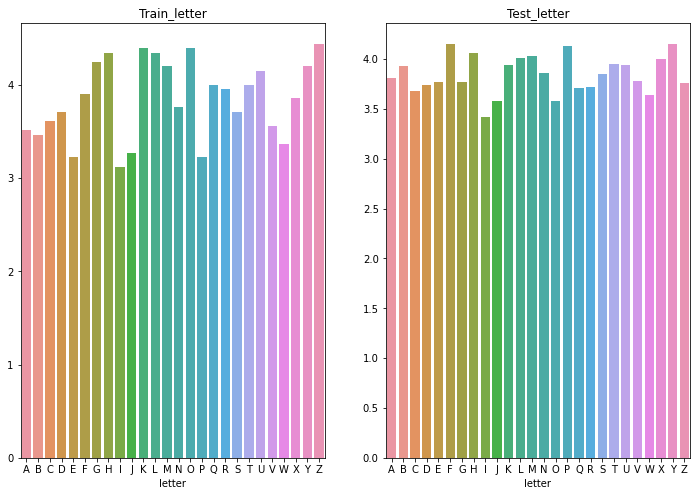

In [5]:
per_train_letter = percentage(train, 'letter')
per_test_letter = percentage(test, 'letter')

fig, ax = plt.subplots(1, 2, figsize = (12, 8))
sns.barplot(x = per_train_letter.index, y = per_train_letter.values, ax = ax[0])
ax[0].set_title('Train_letter')
sns.barplot(x = per_test_letter.index, y= per_test_letter.values, ax = ax[1])
ax[1].set_title('Test_letter')
plt.show()

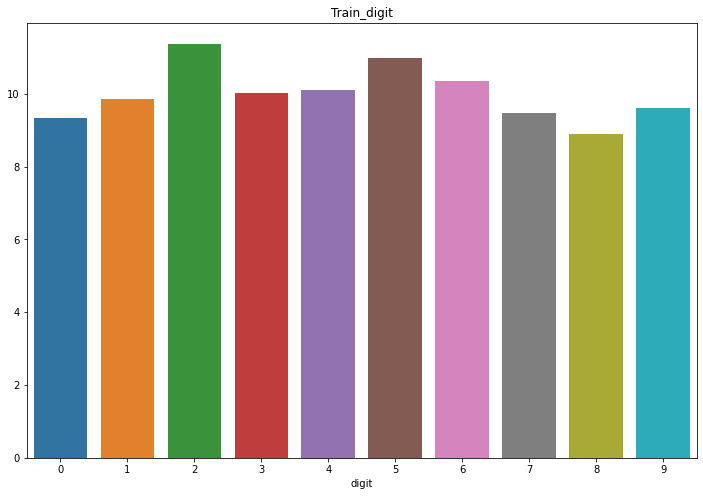

In [9]:
per_train_letter = percentage(train, 'digit')

fig, ax = plt.subplots(1, 1, figsize = (12, 8))
sns.barplot(x = per_train_letter.index, y = per_train_letter.values, ax = ax)
ax.set_title('Train_digit')
plt.show()

# 데이터 확인하기 위한 함수

- plot_number : 숫자에 따른 train_Data를 프린팅하는 함수
- plot_letter : 글자에 따른 train_Data를 프린팅하는 함수
- plot_number_letter : 숫자와 글자에 따른 train_Data를 프린팅하는 함수

In [6]:
def plot_number(number):
    import math
    
    mask = train['digit'] == number
    train_num = train.loc[mask].reset_index(drop = True)
    train_img_num = train_num.iloc[:,3:].to_numpy().reshape(-1,28,28)   # .values 보다 .array 또는 .to_numpy()등을 사용하는 것이 좋다.
    train_letter_num = train_num['letter']
    
    i = 0
    
    for k in range(int(math.ceil(len(train_num) / 4))):
        fig, ax = plt.subplots(1, 4 , figsize = (20, 20))
        axes = ax.flatten()
        
        for ax in axes:
            try:
                num = train_img_num[i]
                ax.imshow(num, cmap = 'viridis')
                ax.set_title('digit: {}, letter : {}'.format(number, train_letter_num[i]))
                i = i + 1
            except IndexError:
                break
        plt.show()
        
def plot_letter(letter):
    import math
    
    
    mask = train['letter'] == letter
    train_num = train.loc[mask].reset_index(drop = True)
    train_img_num = train_num.iloc[:,3:].to_numpy().reshape(-1,28,28)   # .values 보다 .array 또는 .to_numpy()등을 사용하는 것이 좋다.
    train_digit_num = train_num['digit']
    
    i = 0
    
    for k in range(int(math.ceil(len(train_num) / 4))):
        fig, ax = plt.subplots(1, 4 , figsize = (20, 20))
        axes = ax.flatten()
        
        for ax in axes:
            try:
                num = train_img_num[i]
                ax.imshow(num, cmap = 'viridis')
                ax.set_title('digit: {}, letter : {}'.format(train_digit_num[i], letter))
                i = i + 1
            except IndexError:
                break
        plt.show()

def plot_number_letter(number, letter):
    import math
    
    mask = (train['digit'] == number) & (train['letter'] == letter)
    train_num = train.loc[mask].reset_index(drop = True)
    train_img_num = train_num.iloc[:,3:].to_numpy().reshape(-1,28,28)   # .values 보다 .array 또는 .to_numpy()등을 사용하는 것이 좋다.
    train_letter_num = train_num['letter']
    
    i = 0
    
    for k in range(int(math.ceil(len(train_num) / 4))):
        fig, ax = plt.subplots(1, 4 , figsize = (20, 20))
        axes = ax.flatten()
        
        for ax in axes:
            try:
                num = train_img_num[i]
                ax.imshow(num, cmap = 'viridis')
                ax.set_title('digit: {}, letter : {}'.format(number, train_letter_num[i]))
                i = i + 1
            except IndexError:
                break
        plt.show()

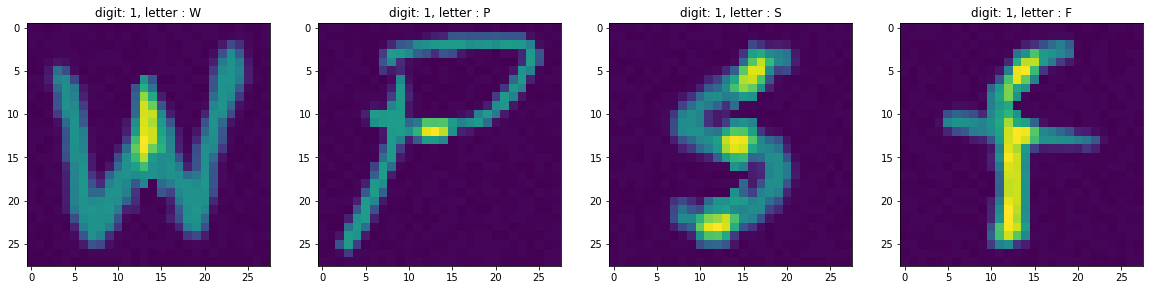

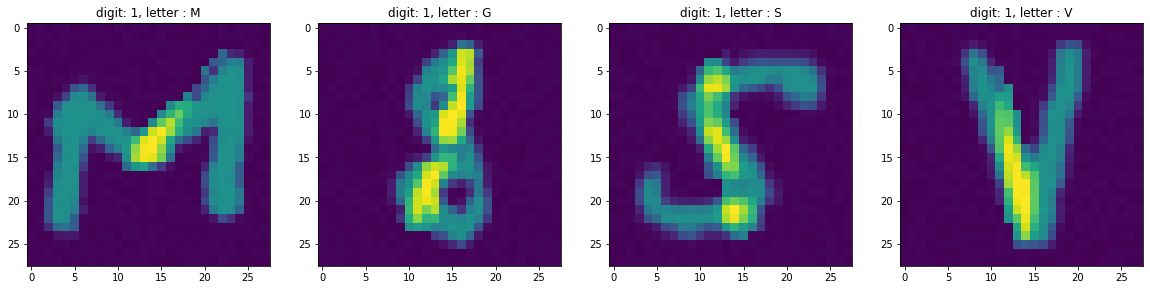

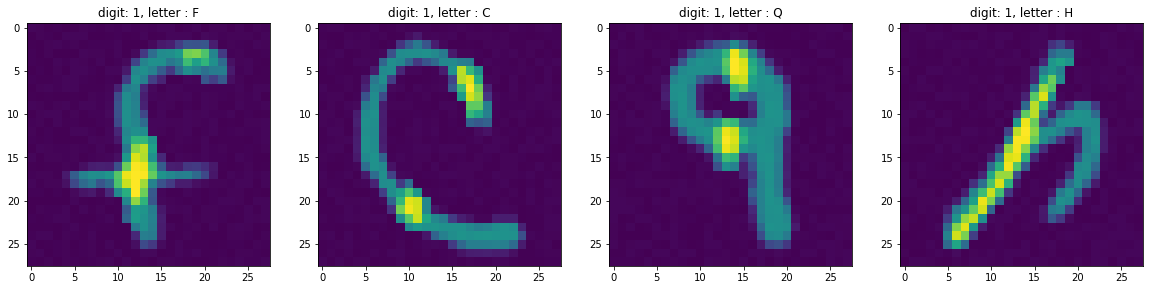

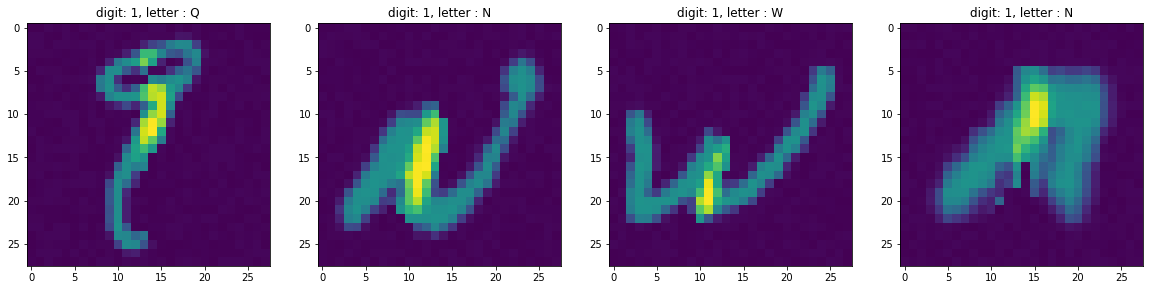

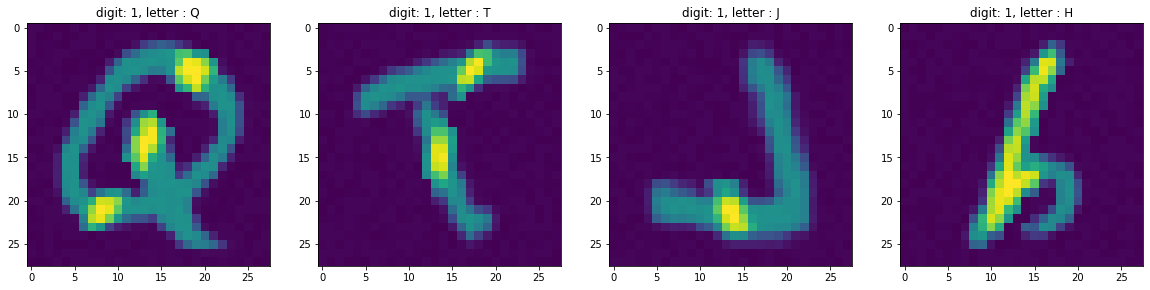

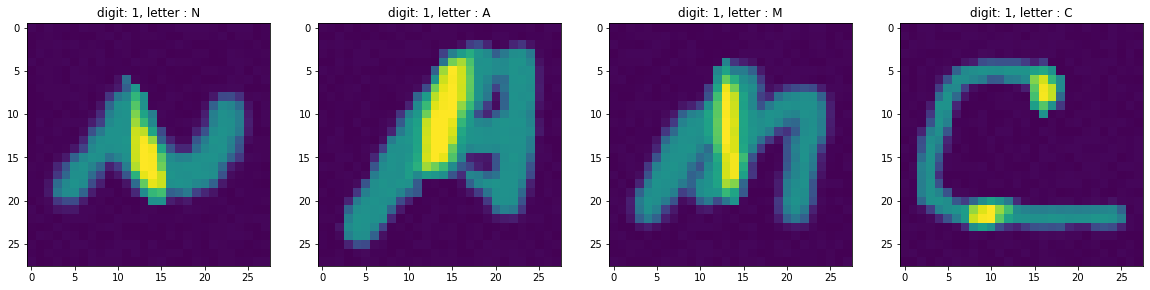

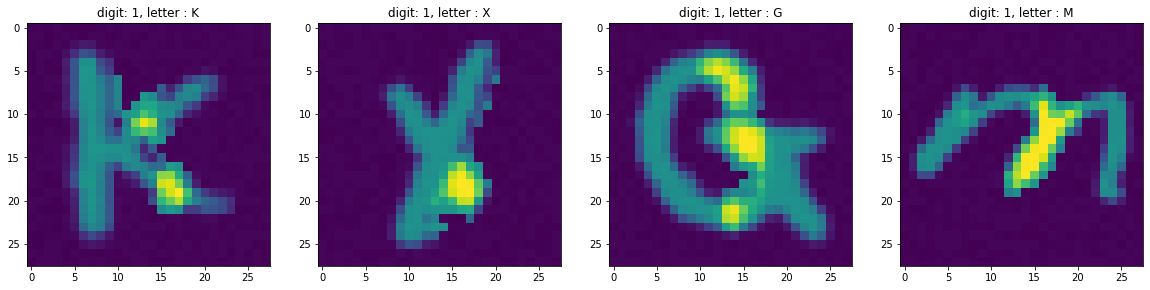

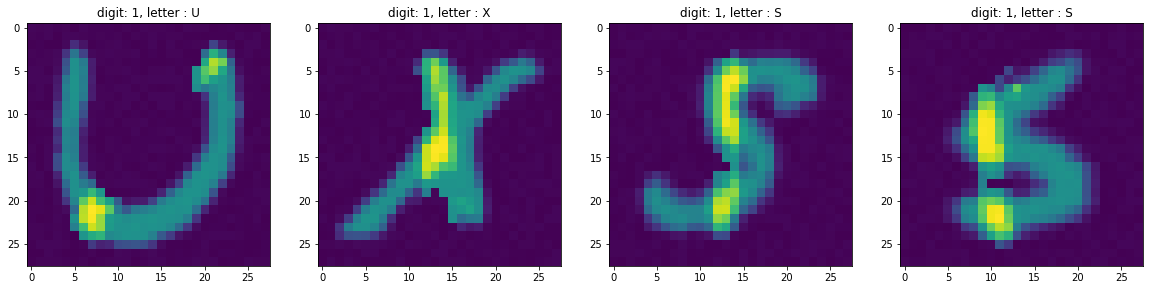

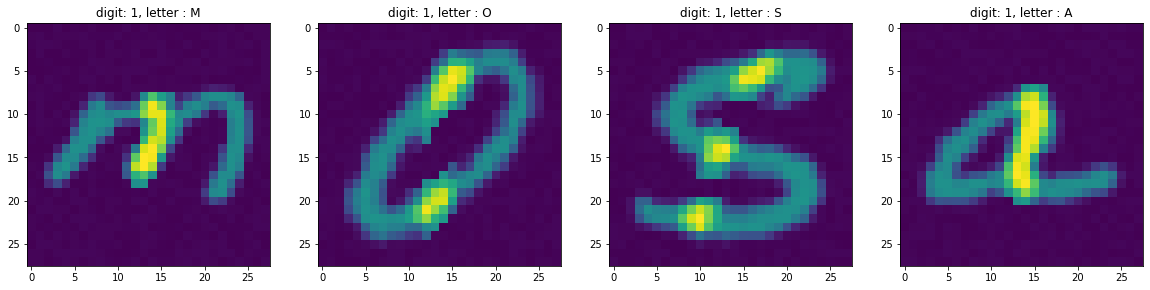

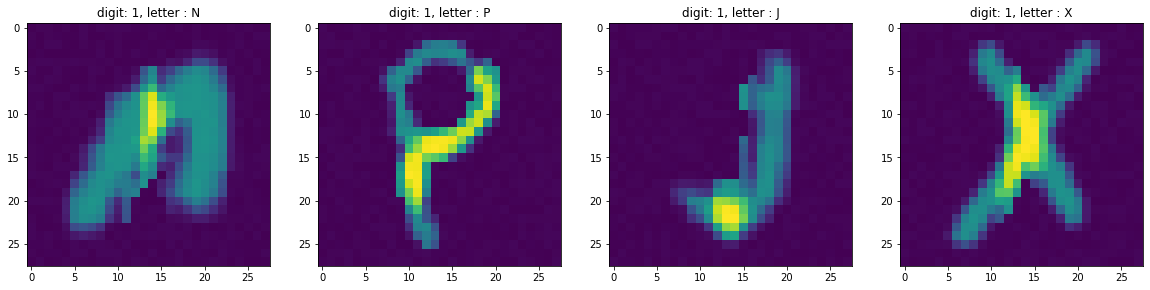

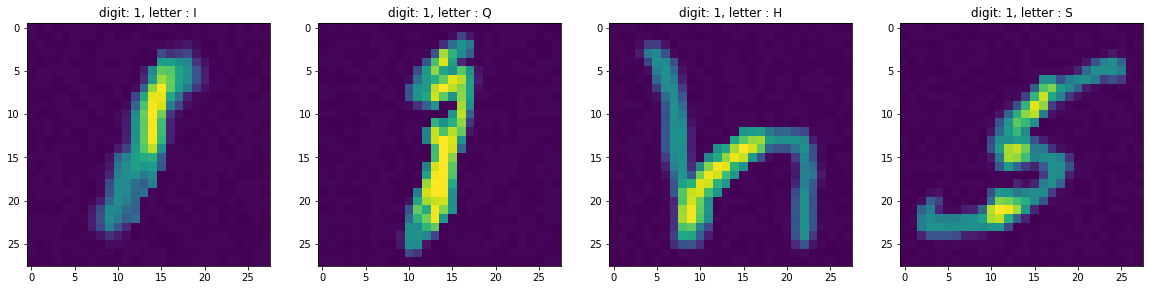

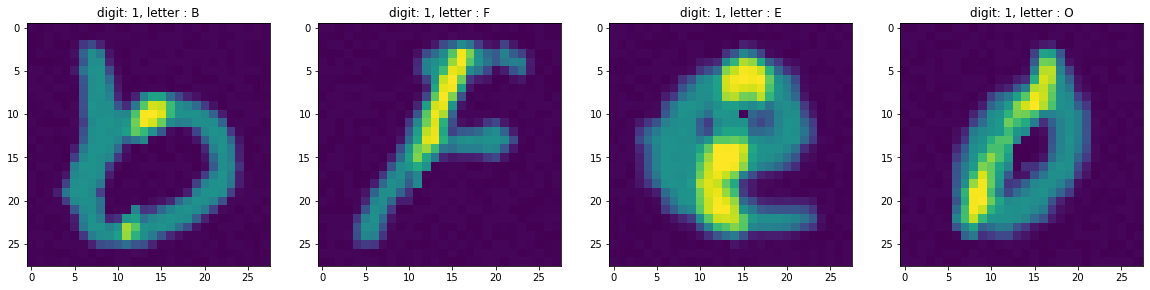

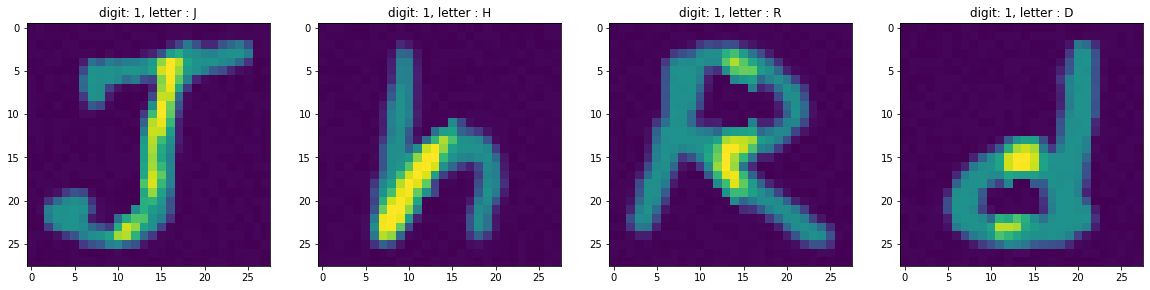

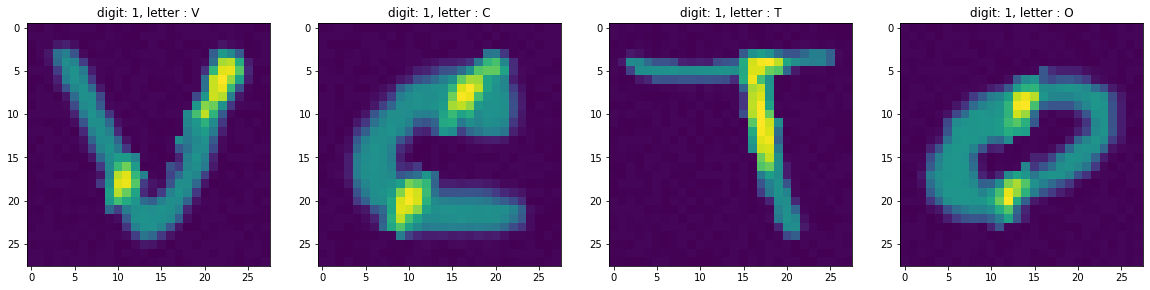

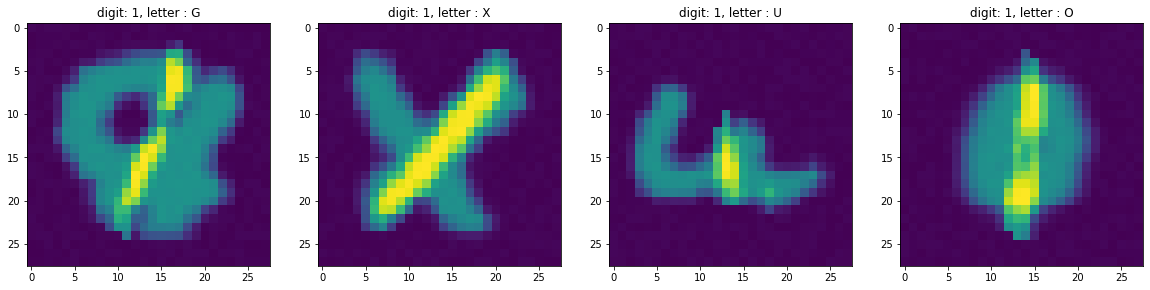

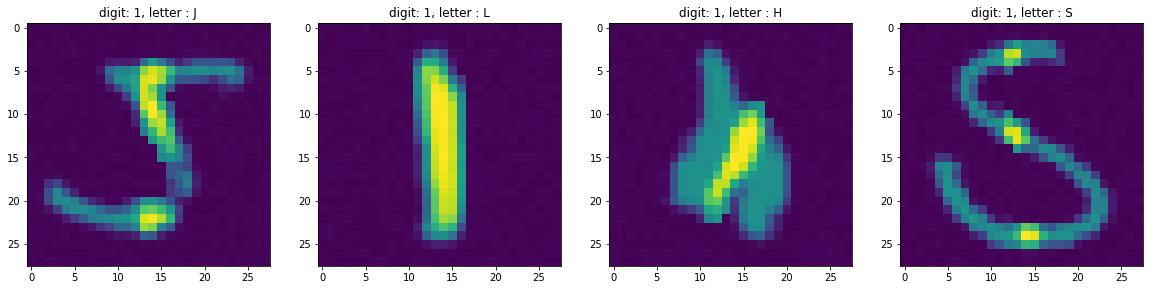

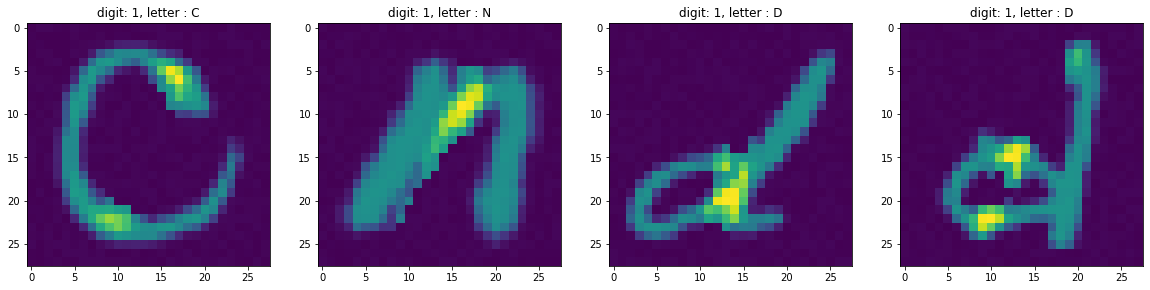

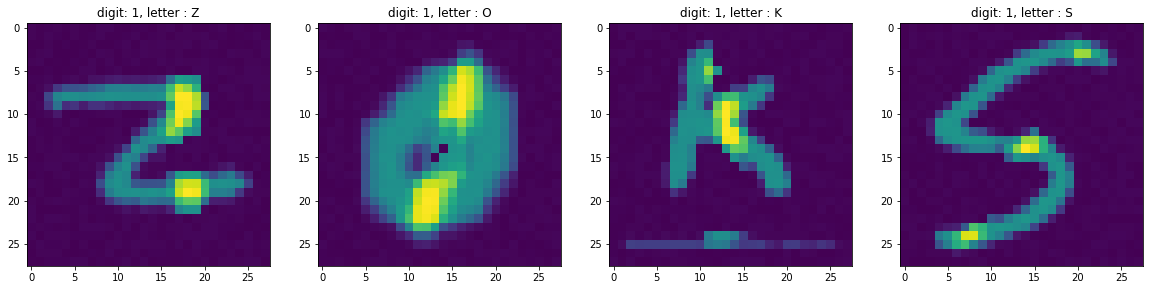

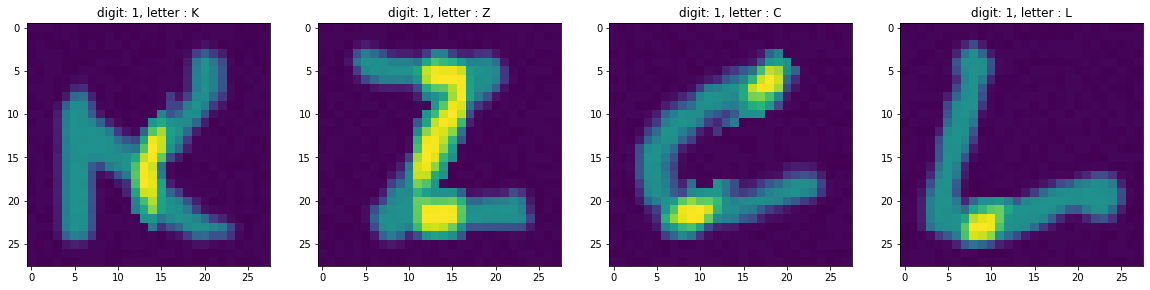

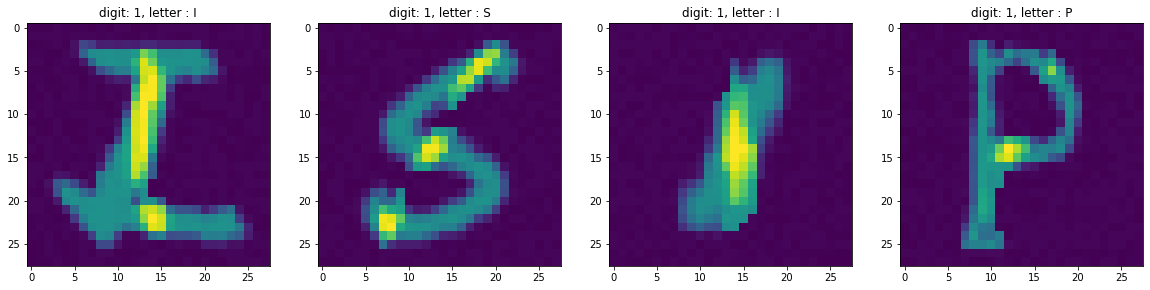

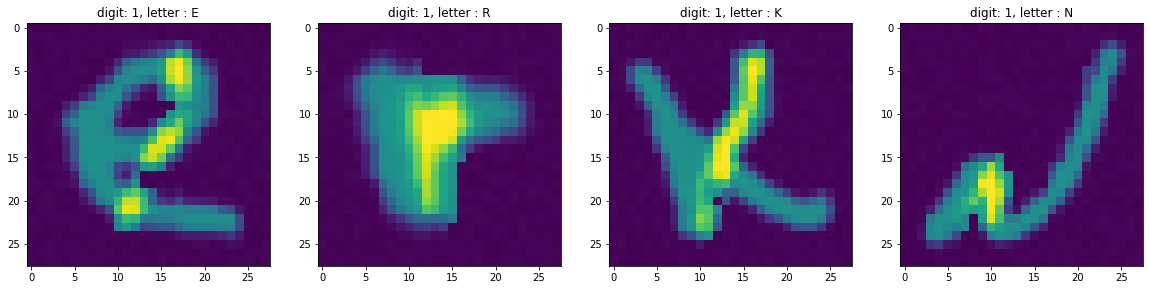

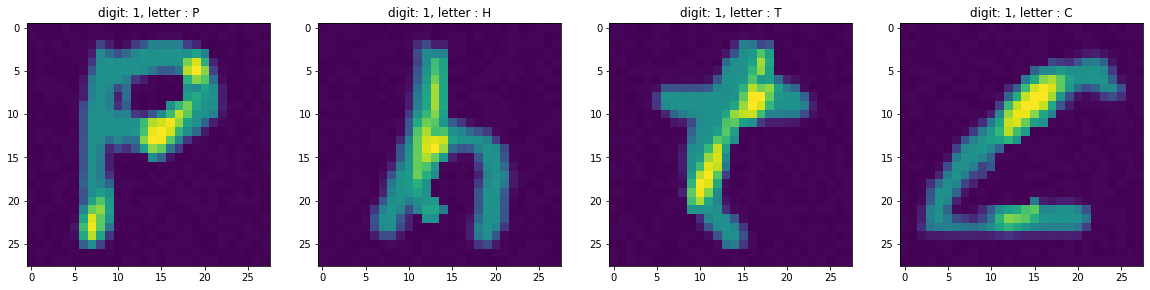

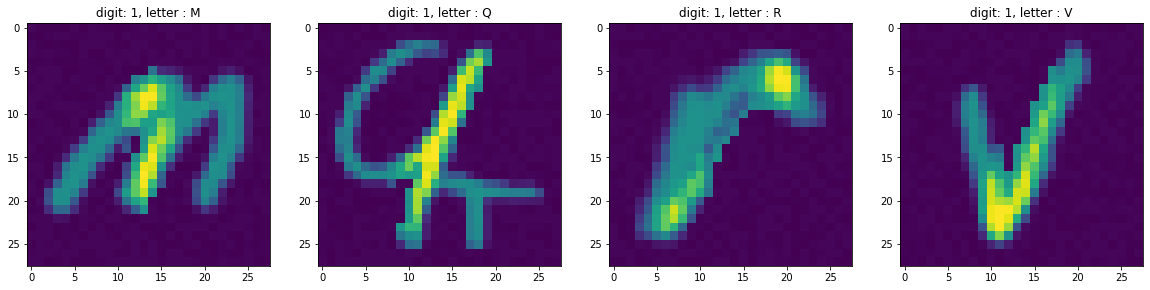

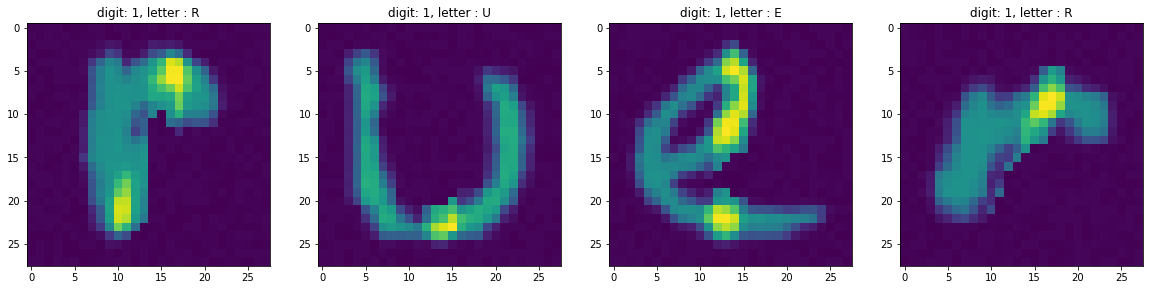

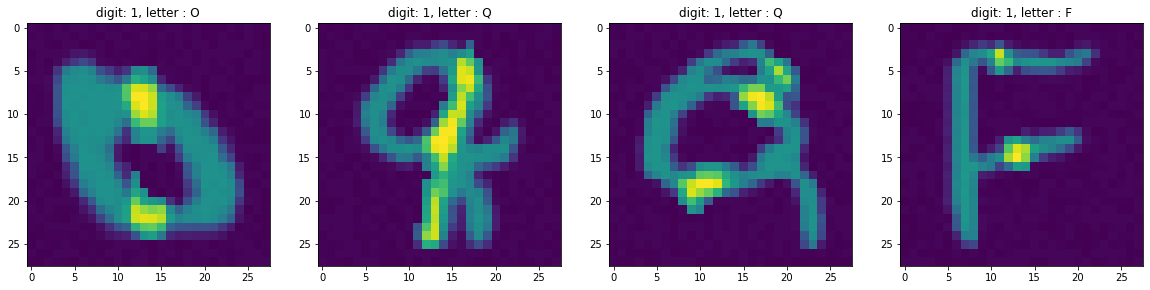

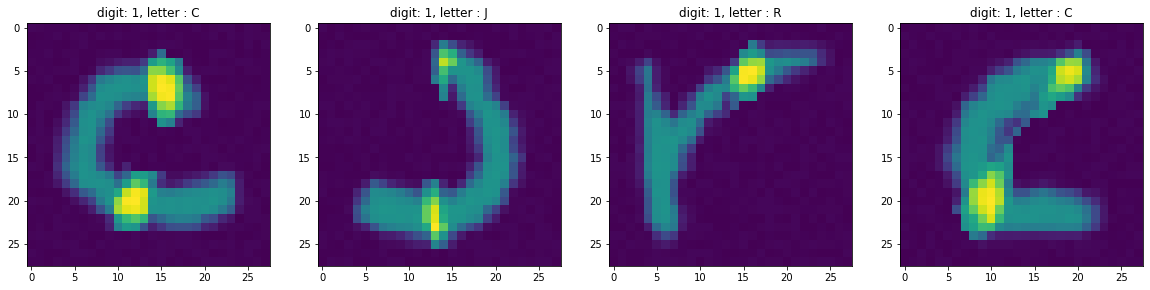

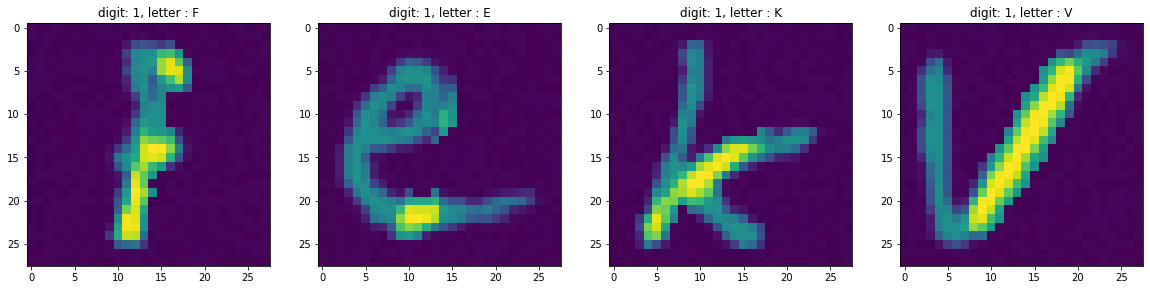

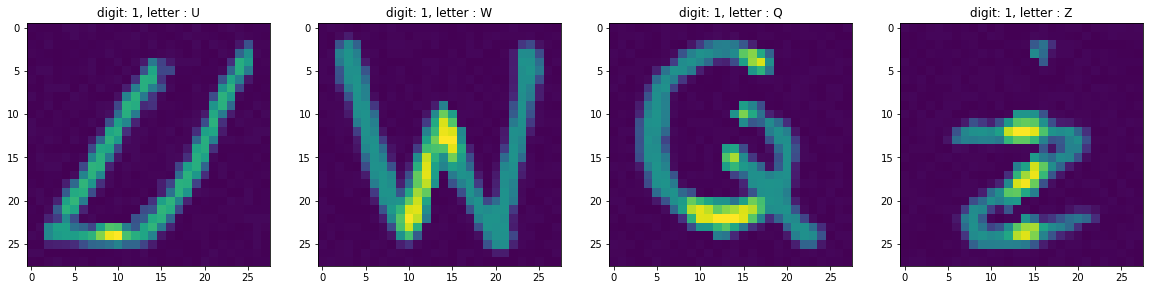

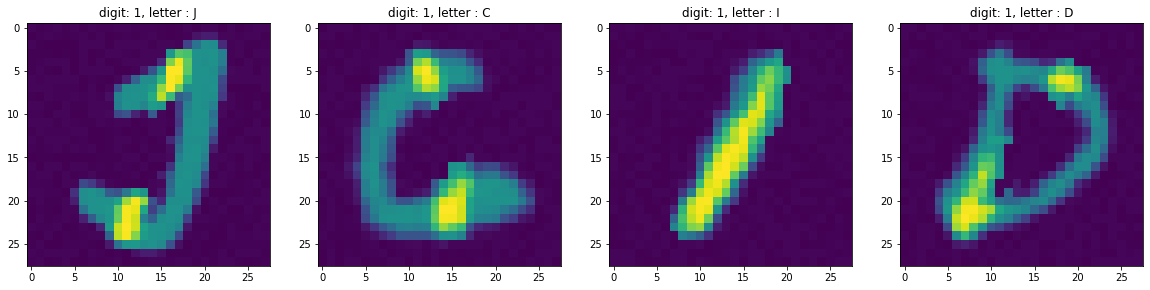

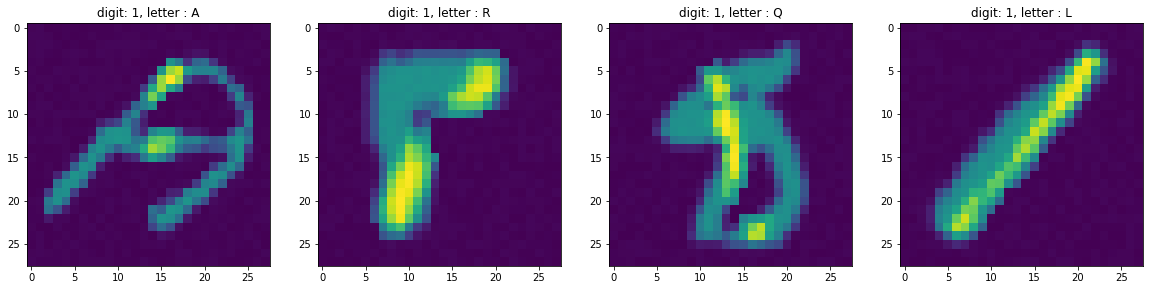

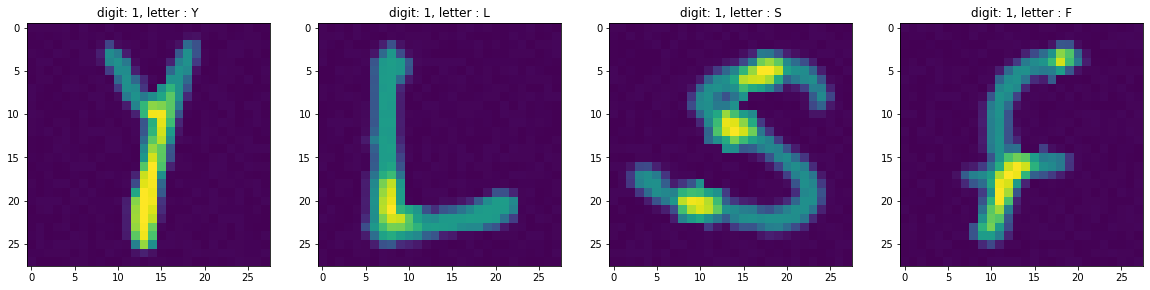

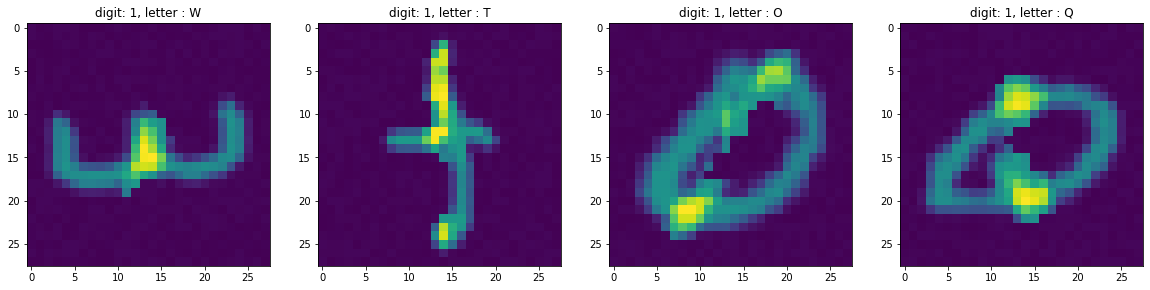

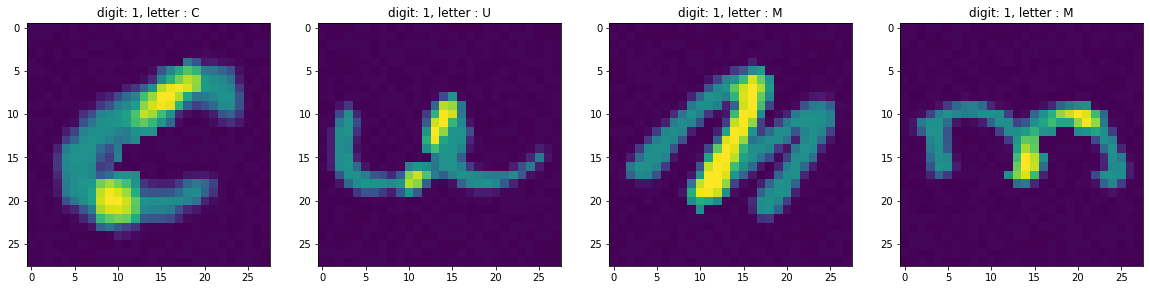

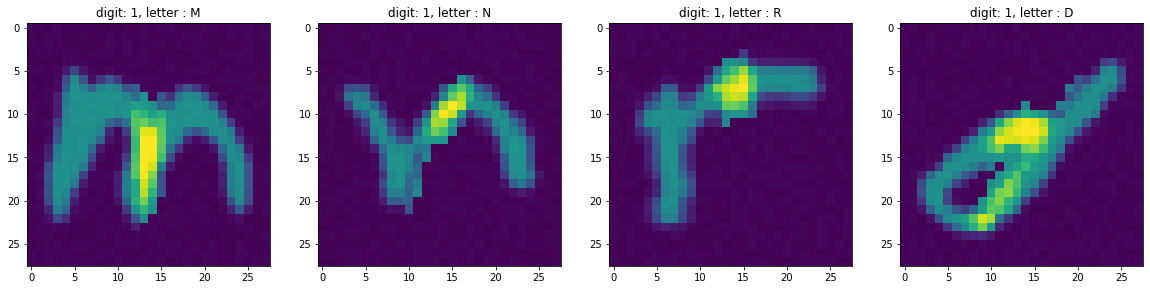

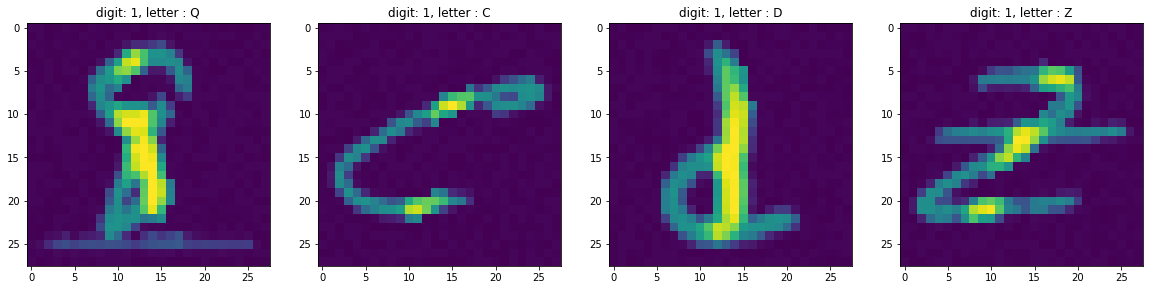

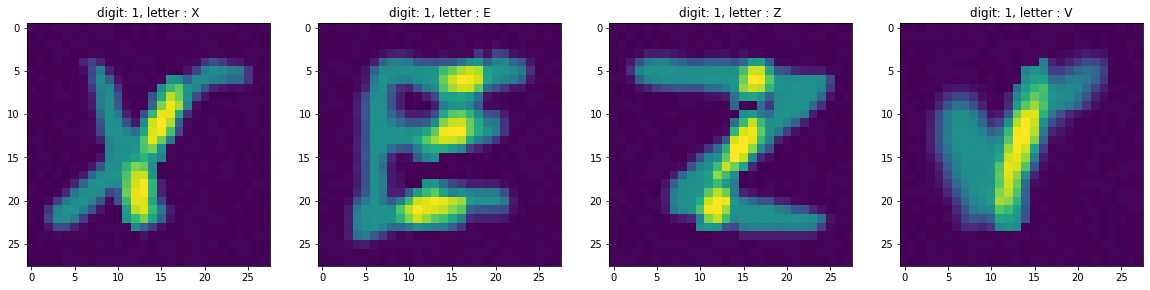

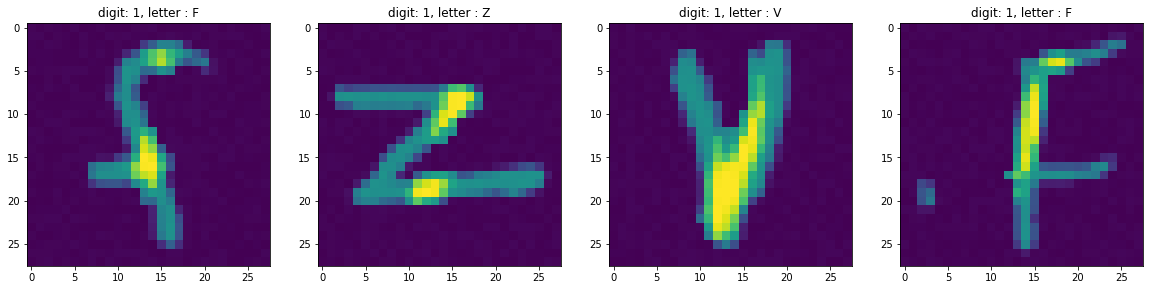

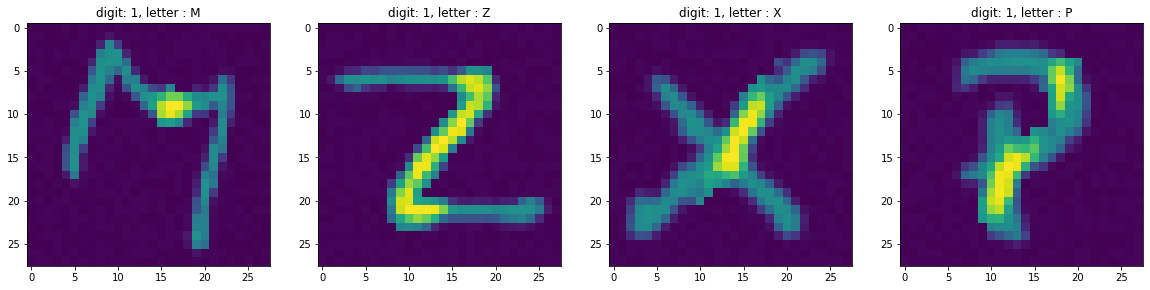

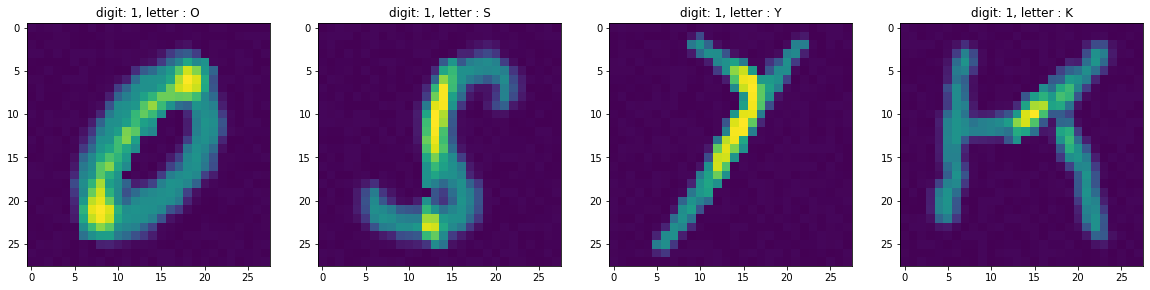

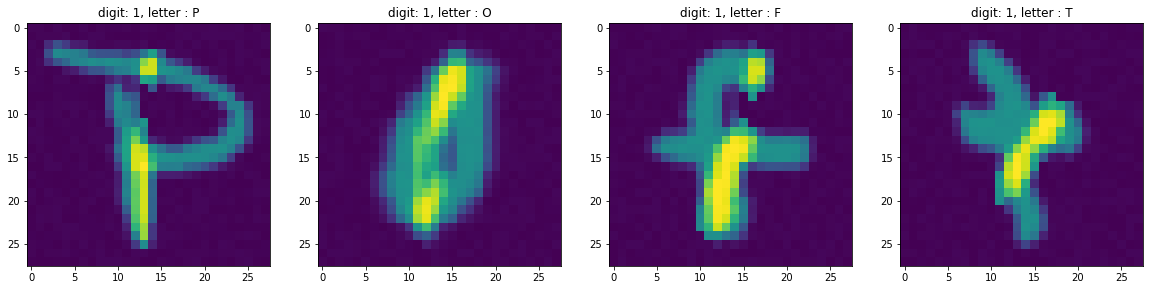

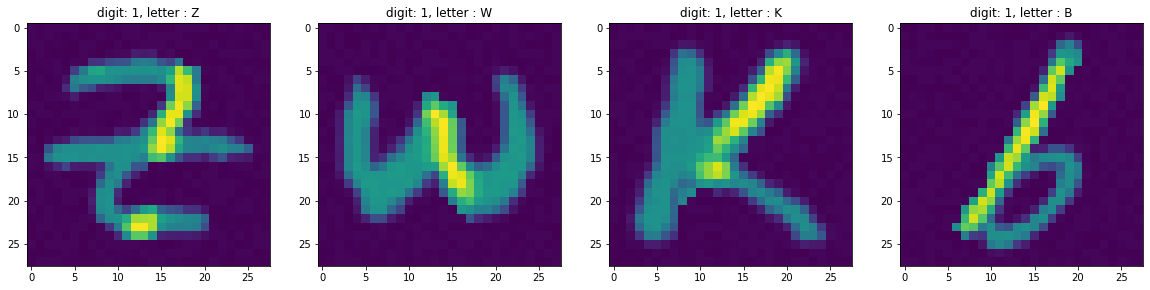

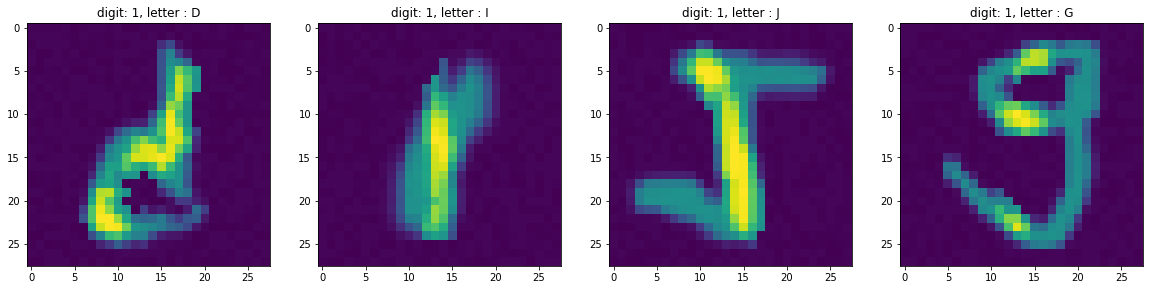

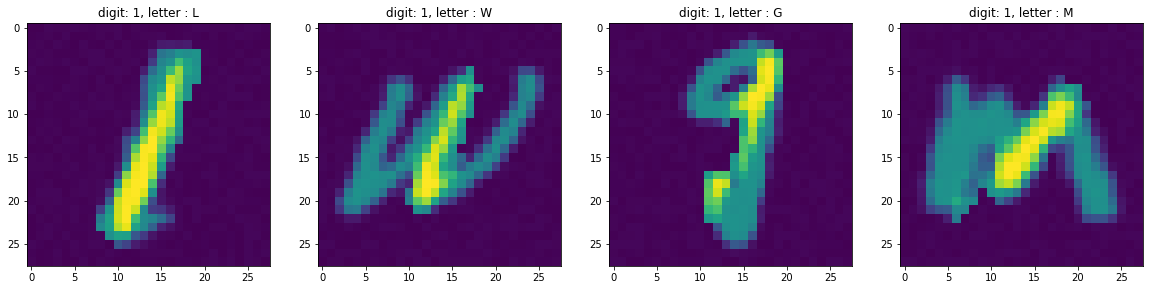

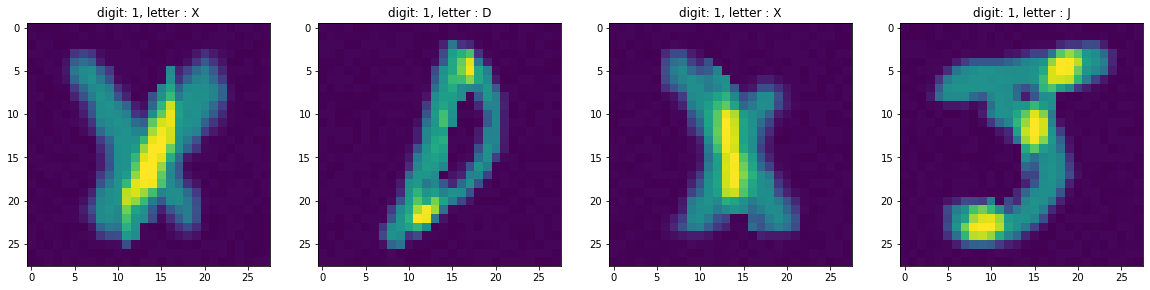

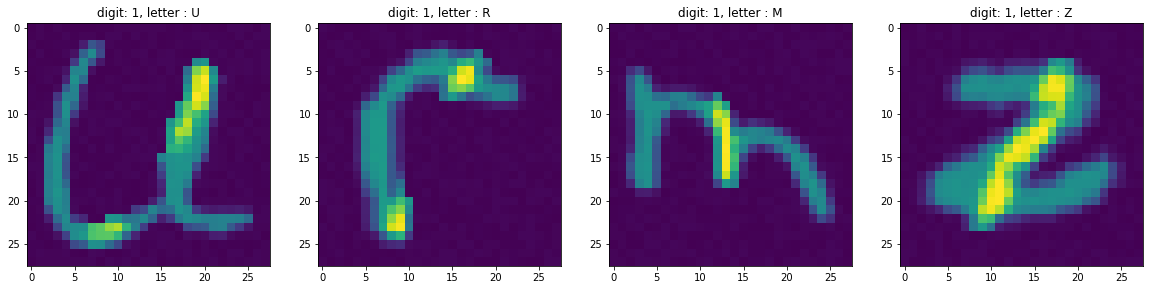

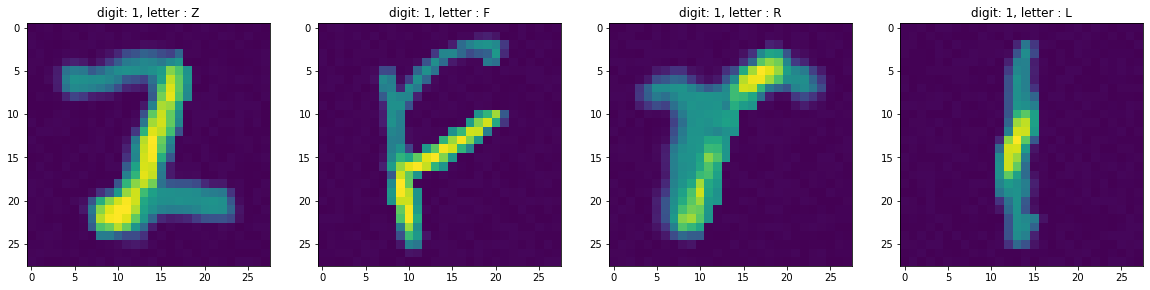

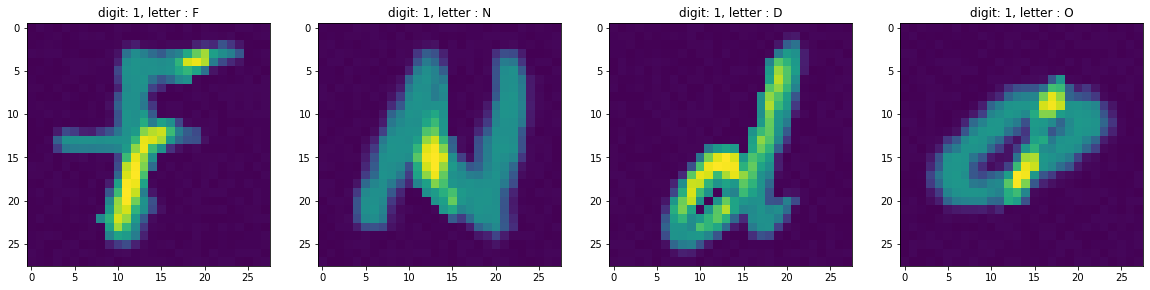

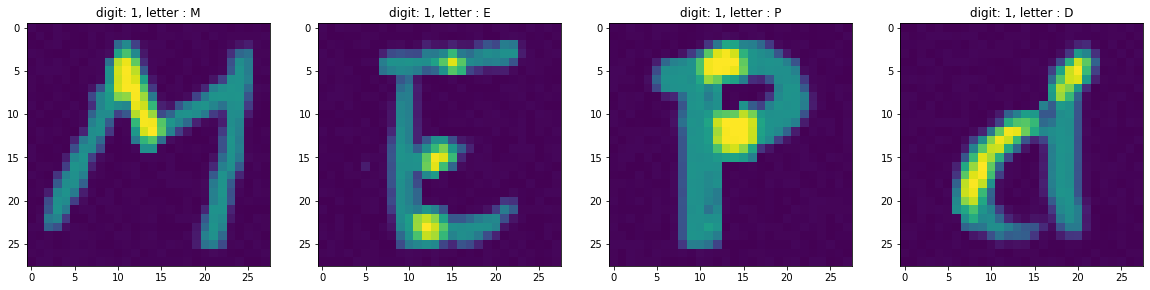

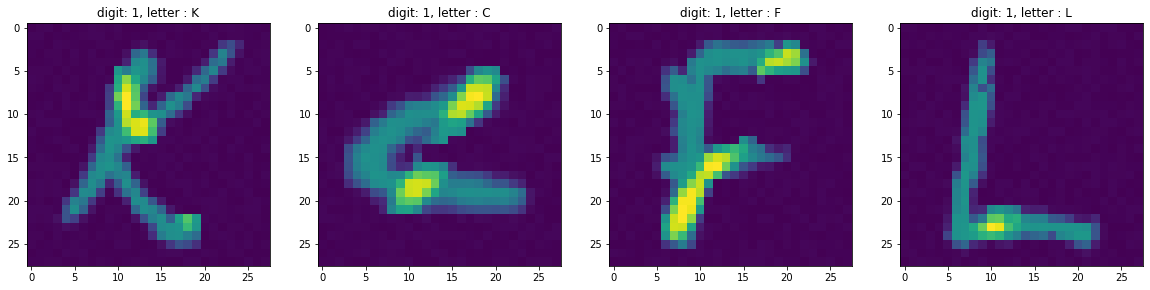

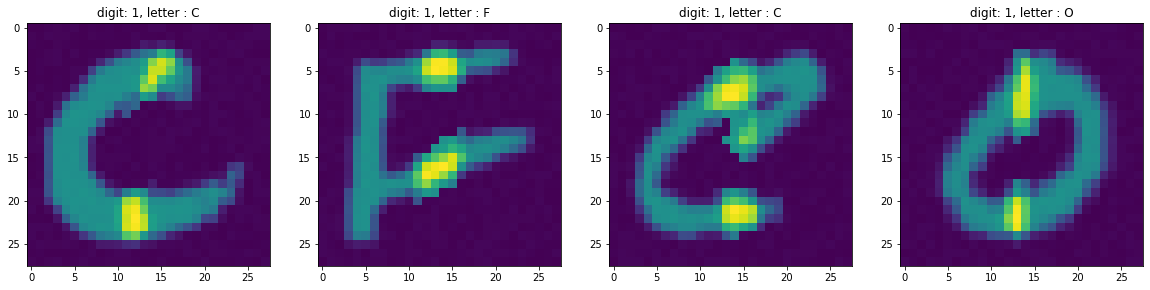

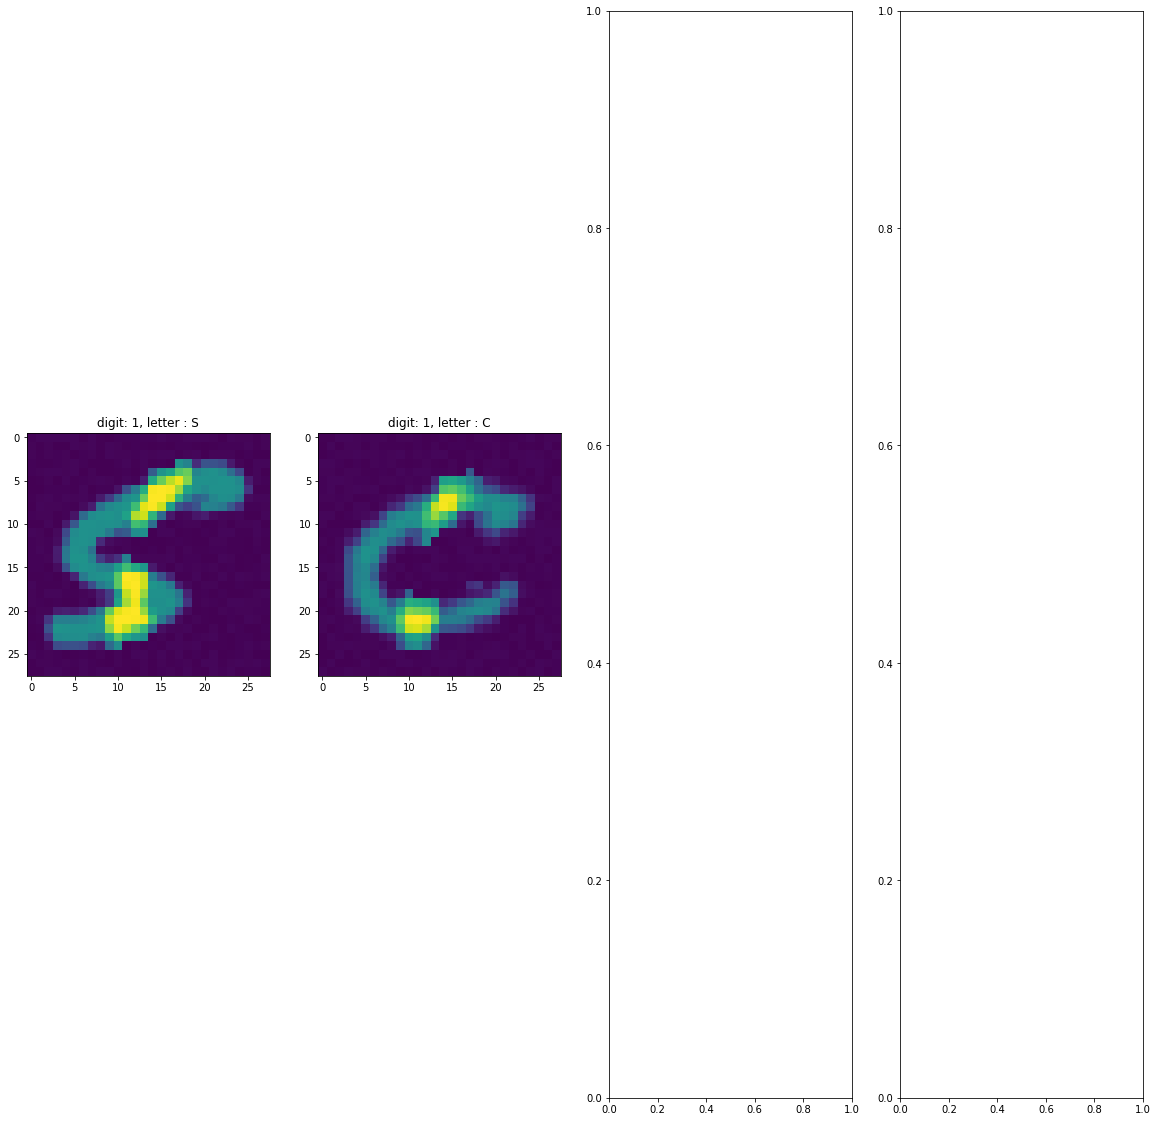

In [28]:
# digit == 1

plot_number(1)

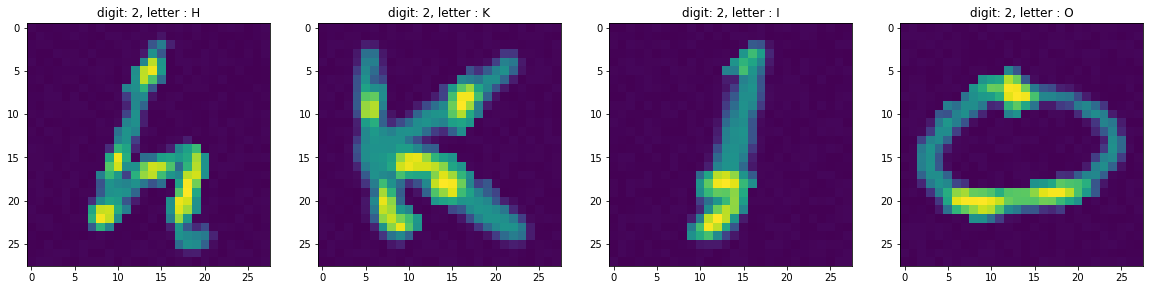

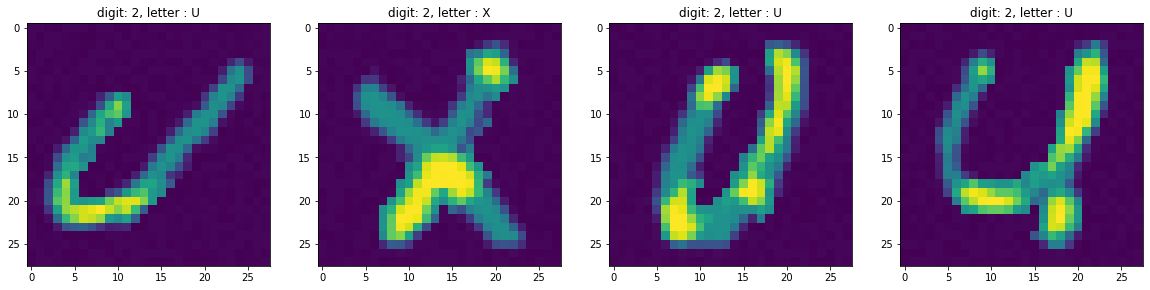

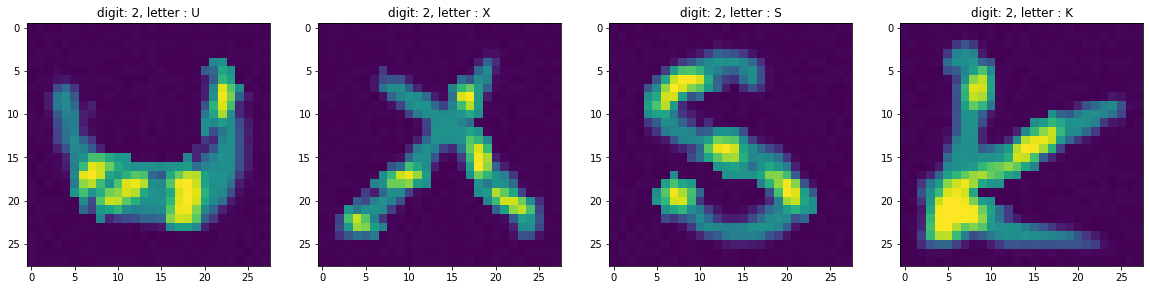

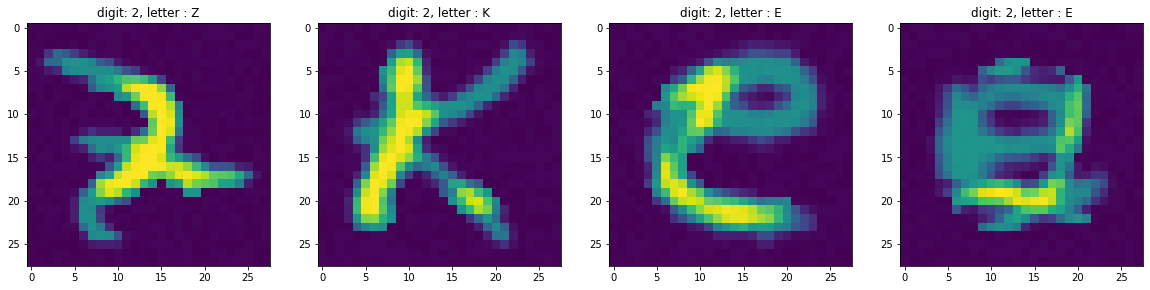

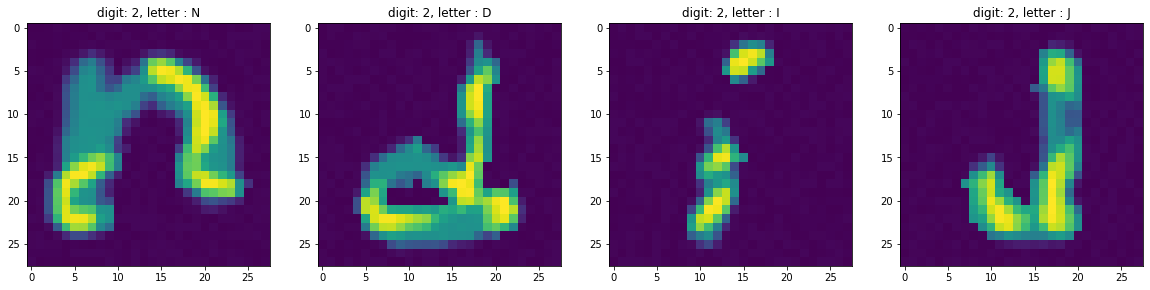

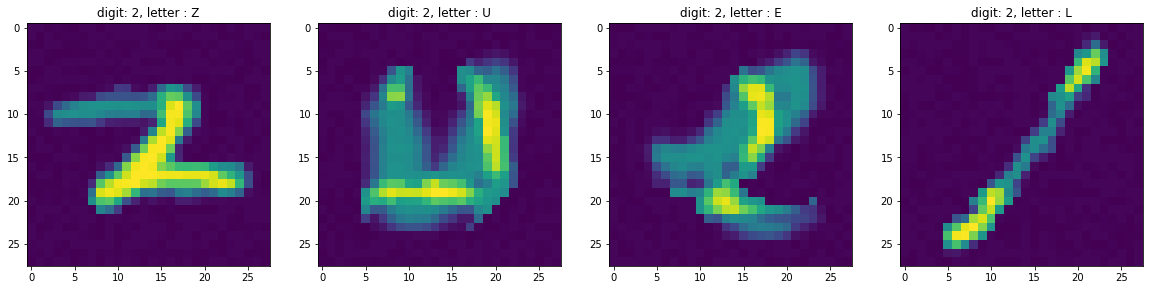

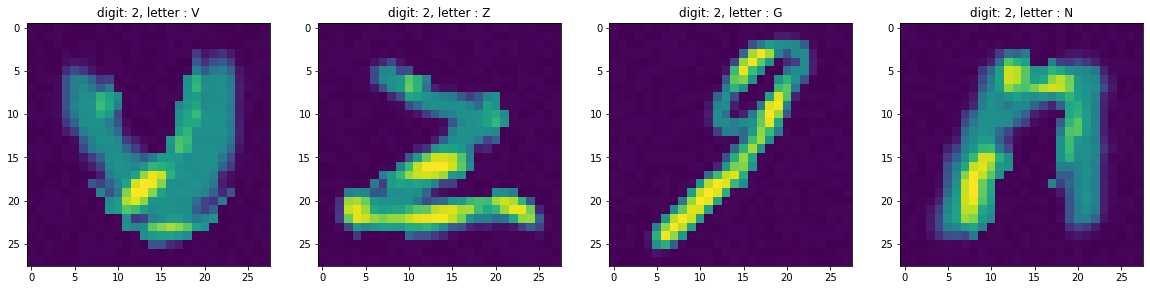

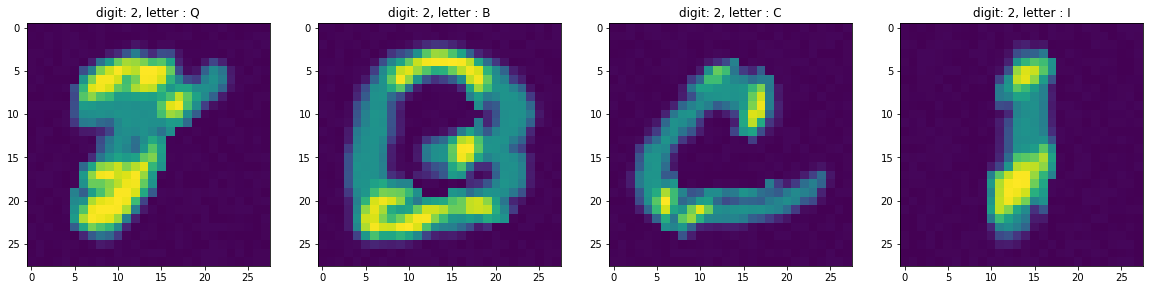

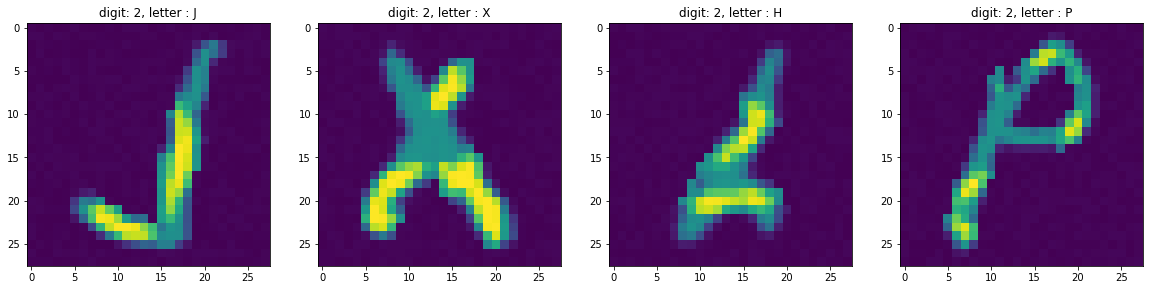

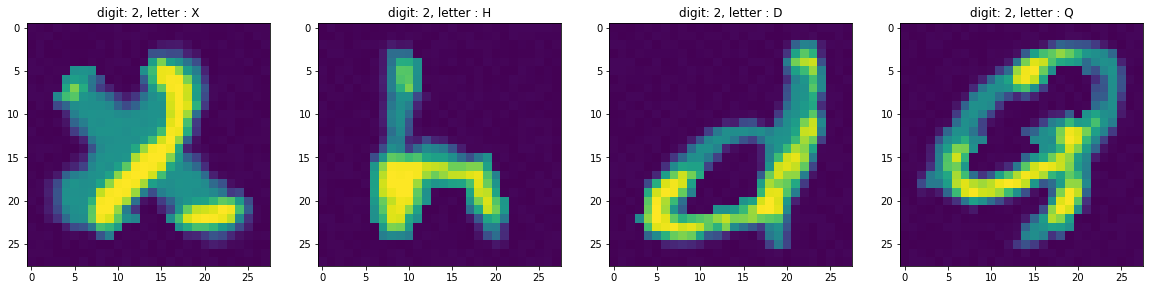

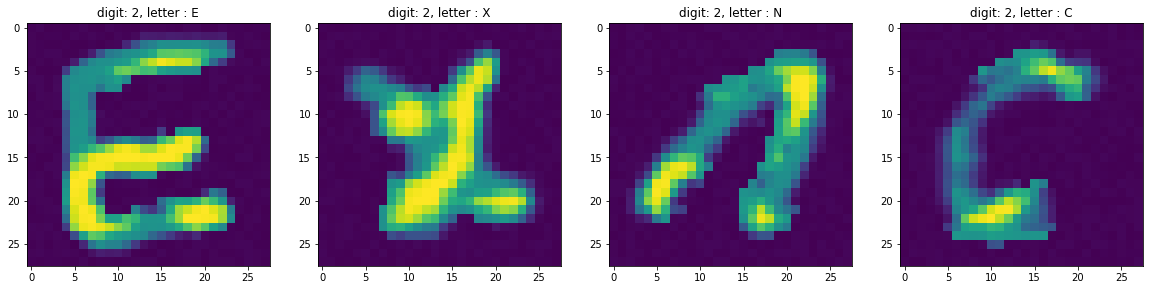

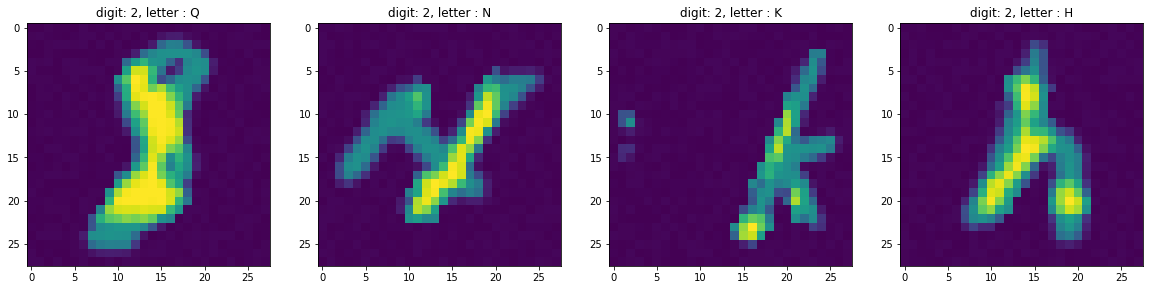

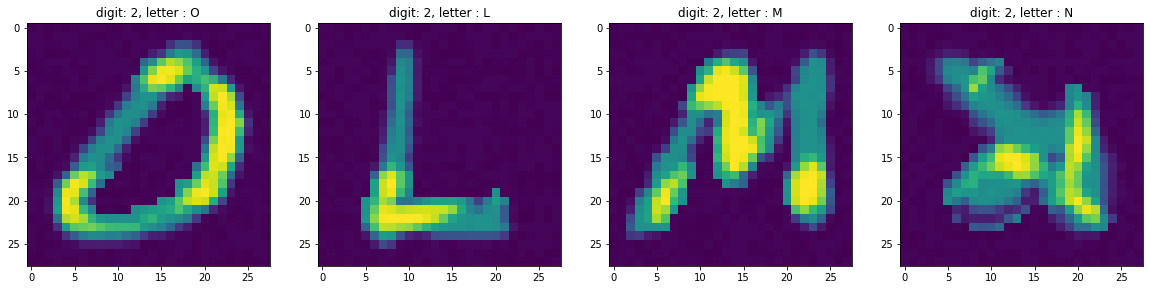

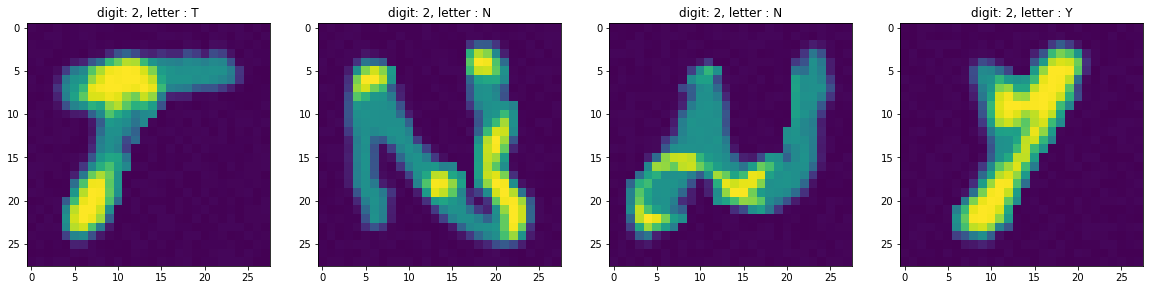

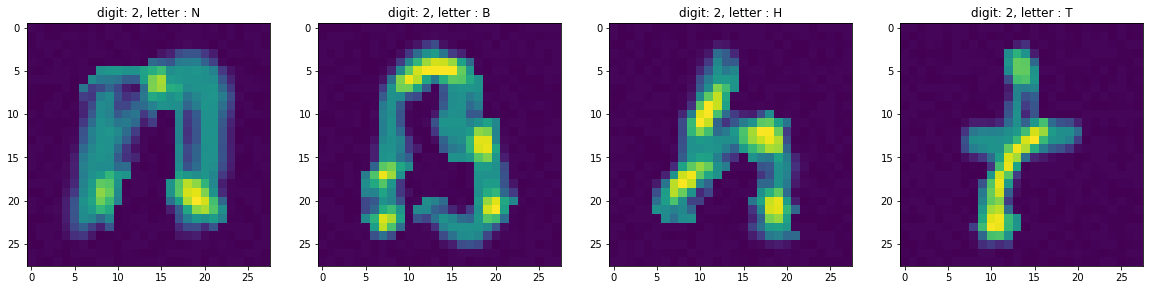

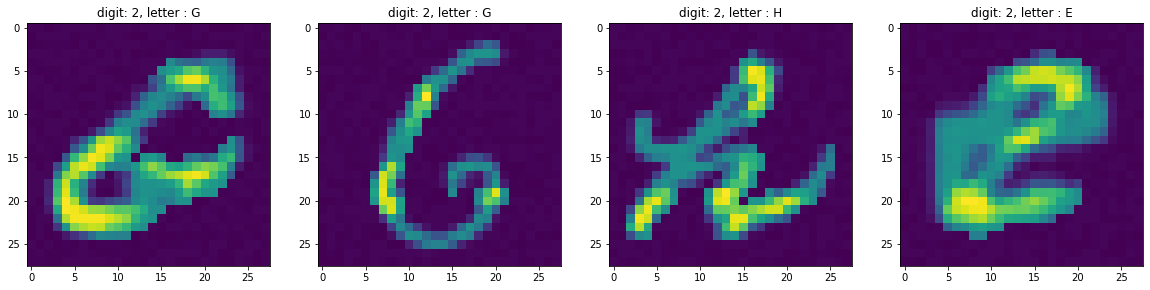

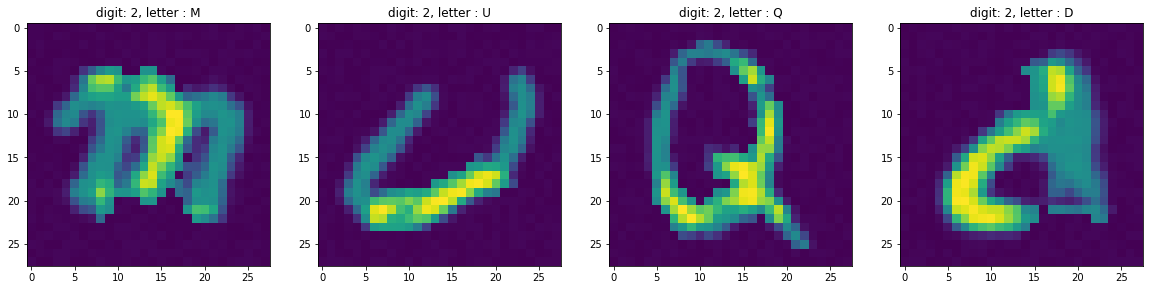

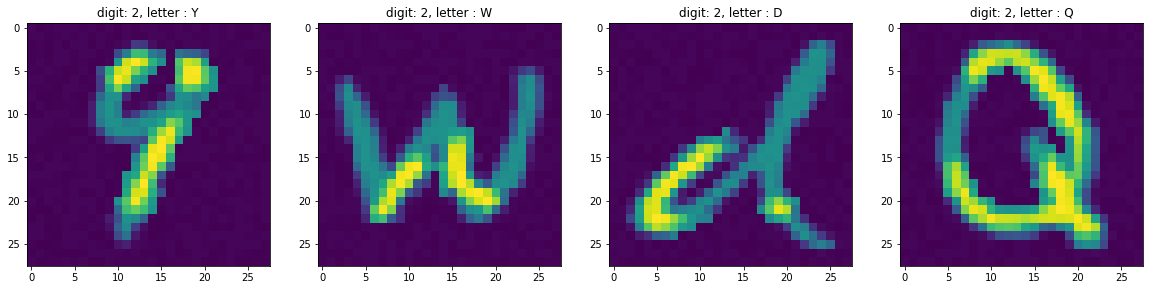

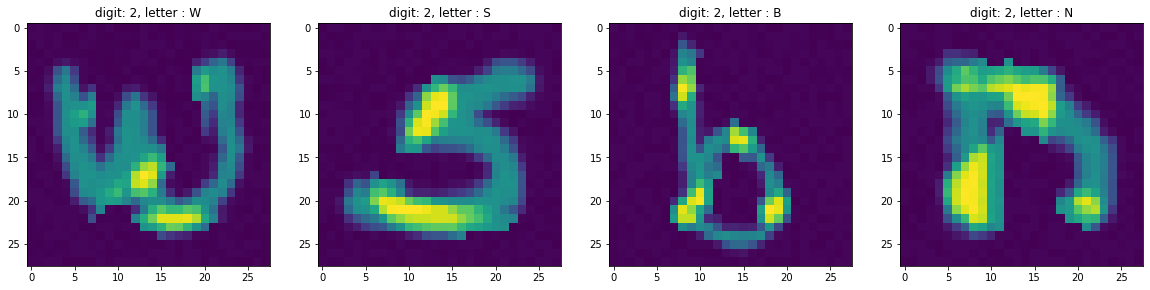

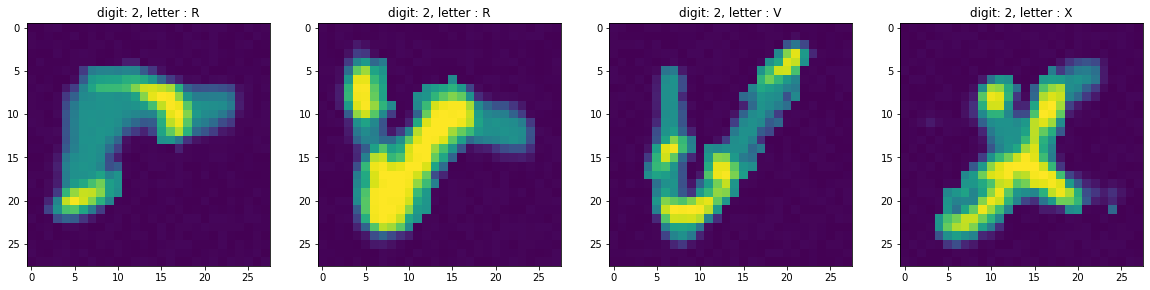

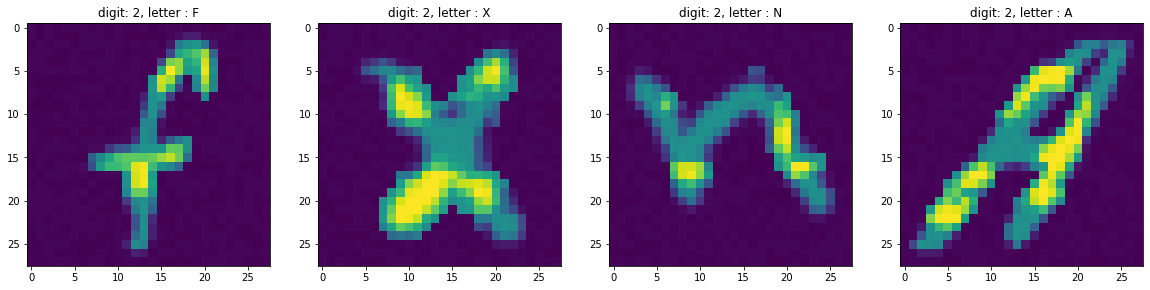

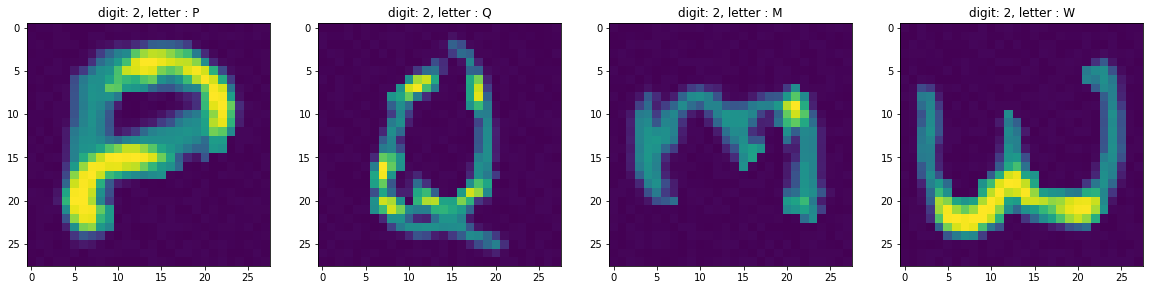

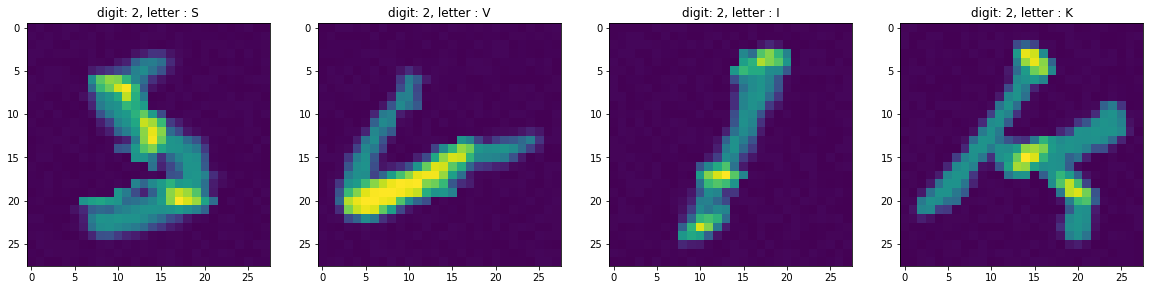

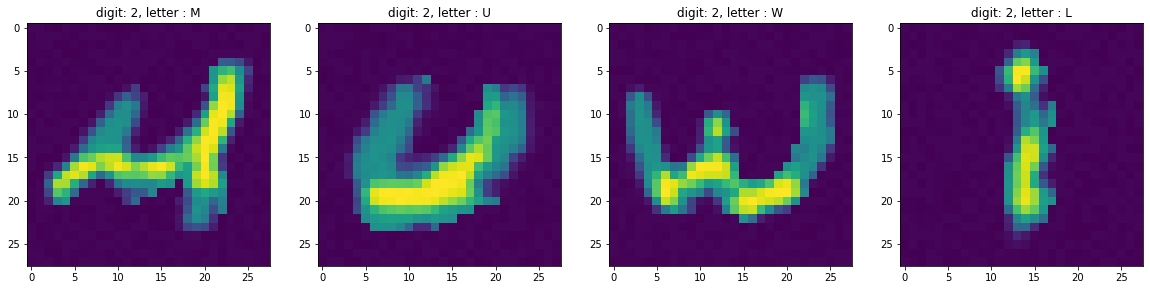

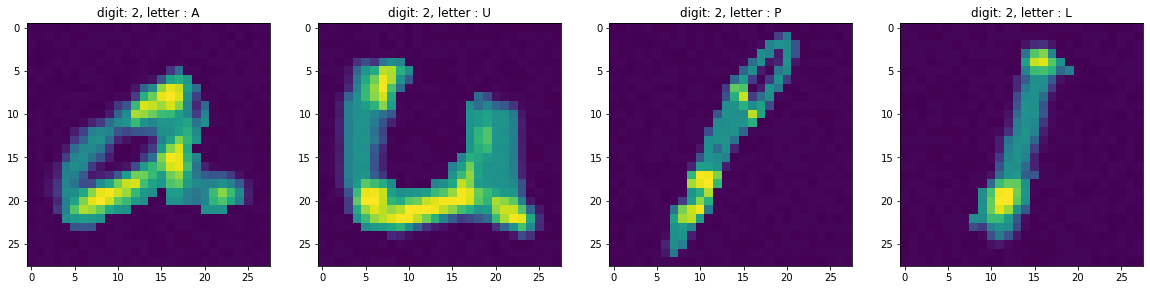

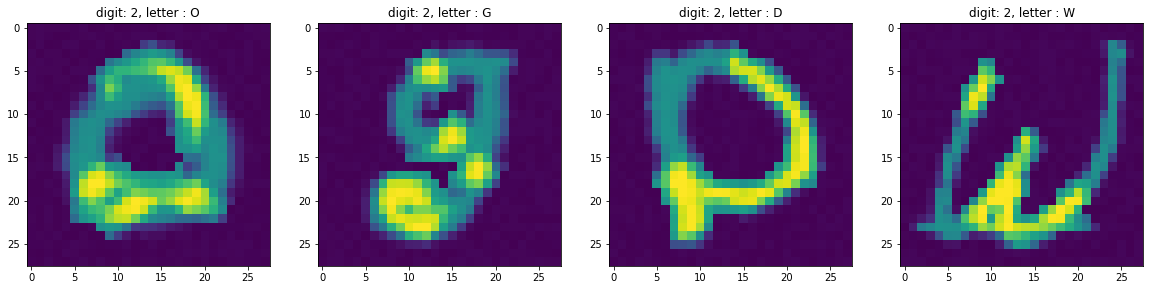

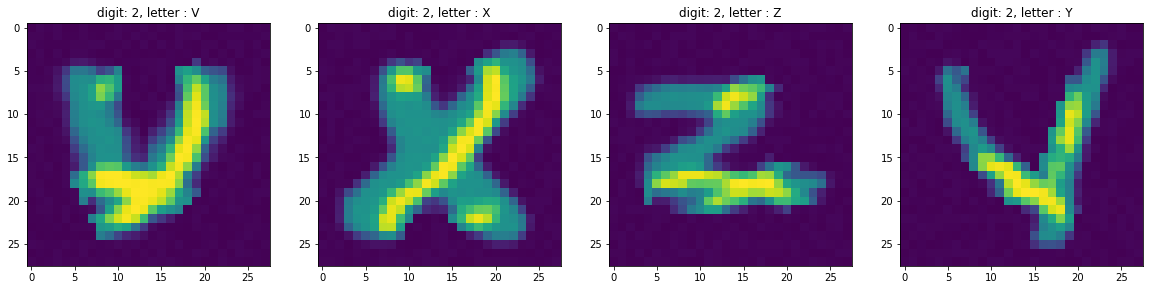

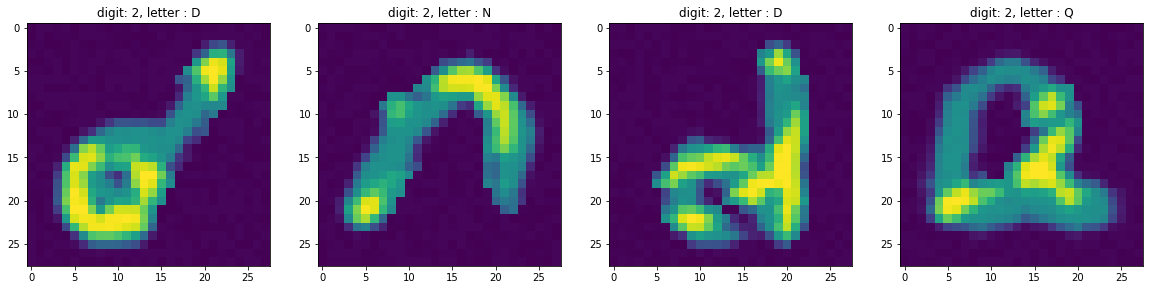

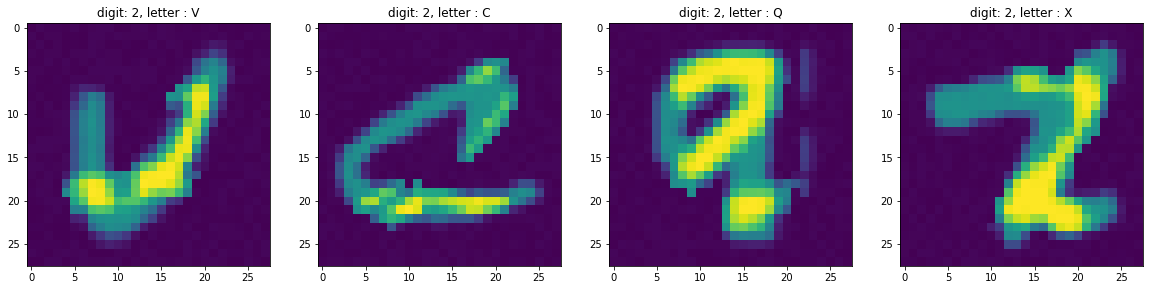

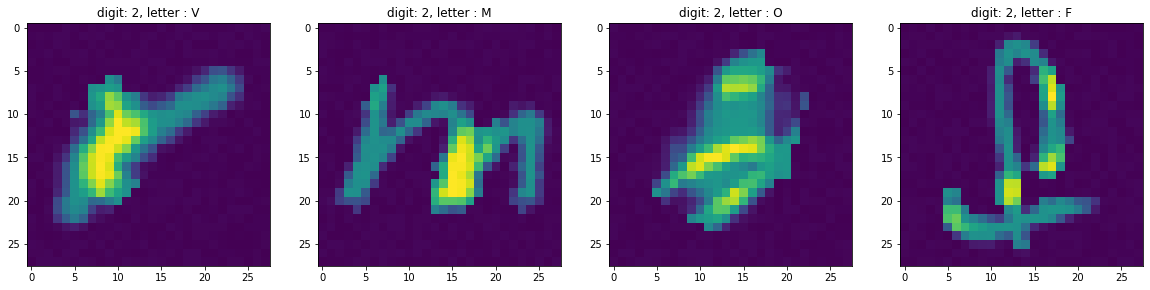

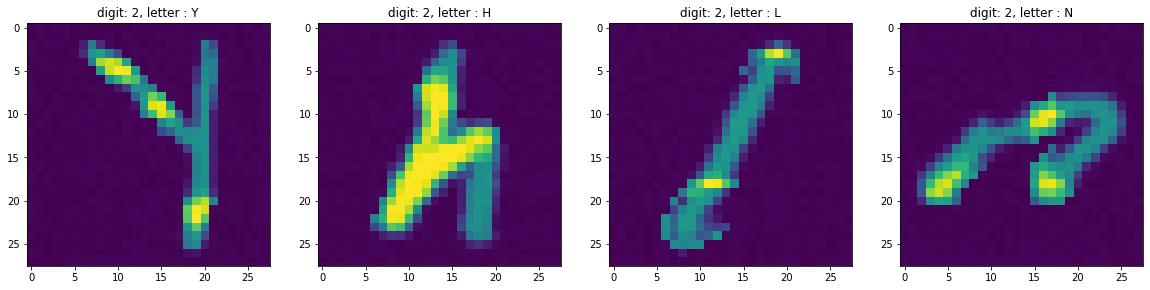

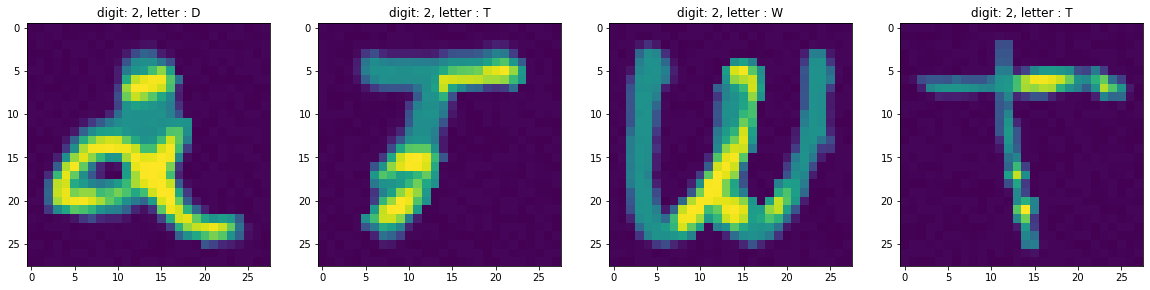

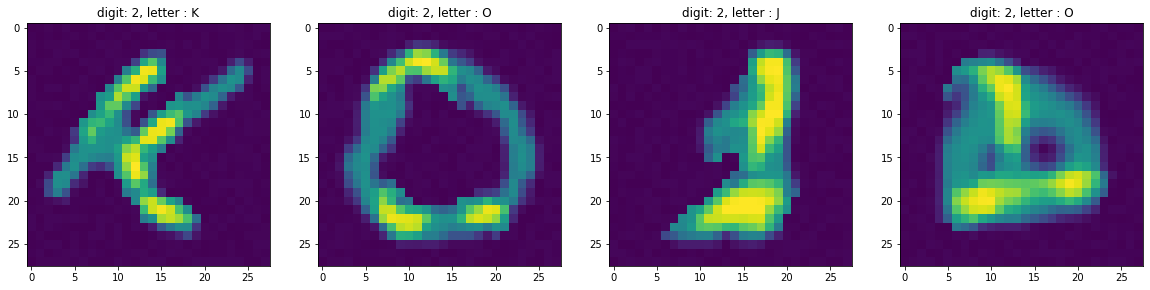

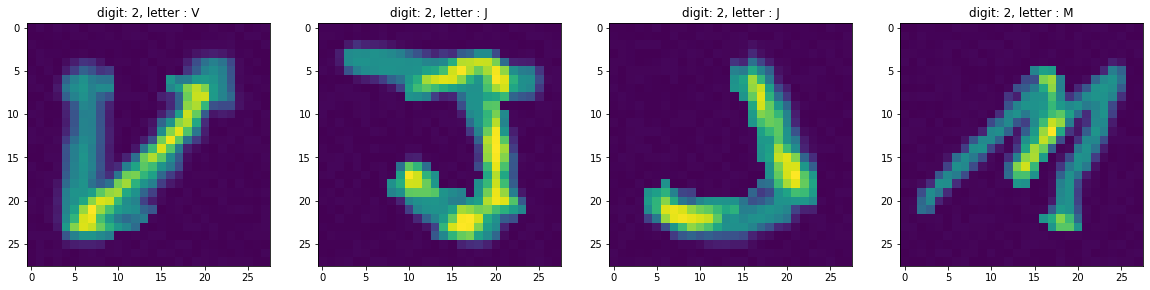

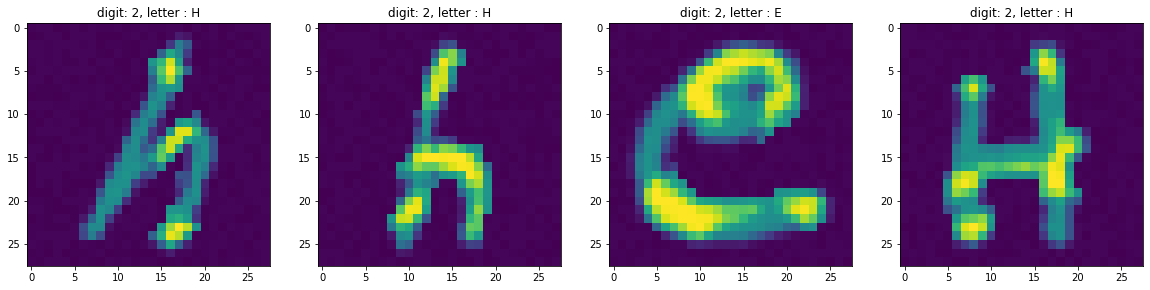

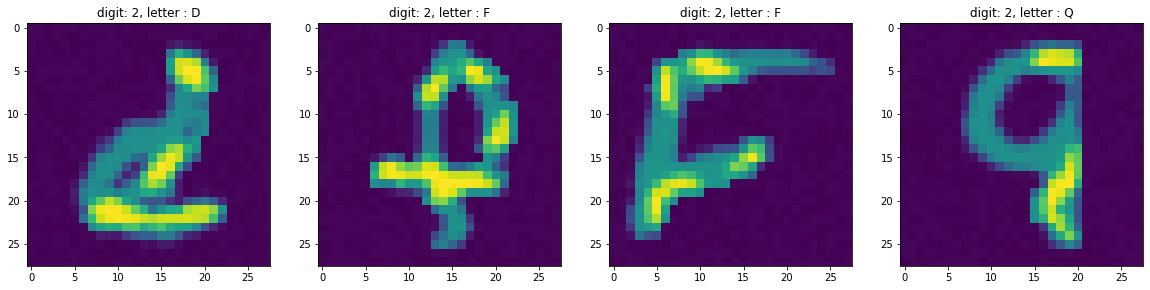

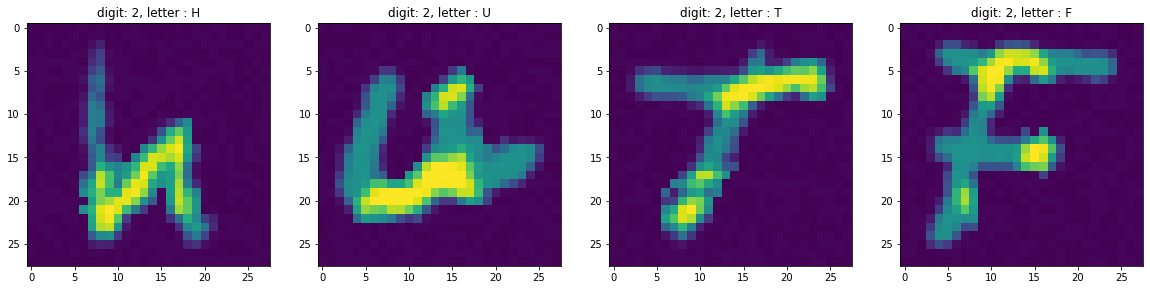

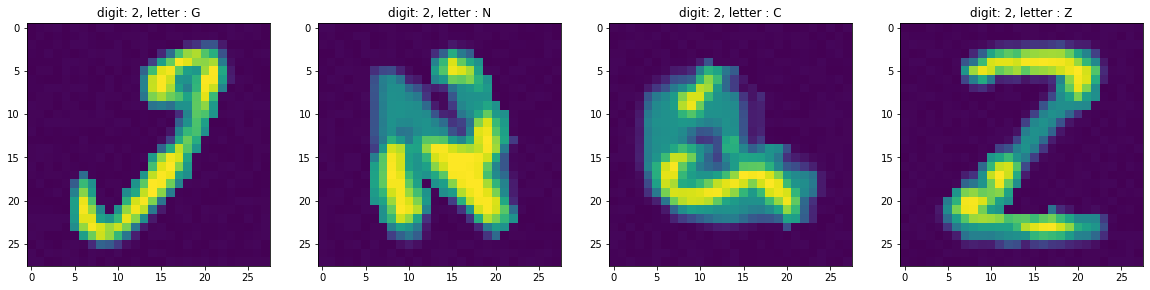

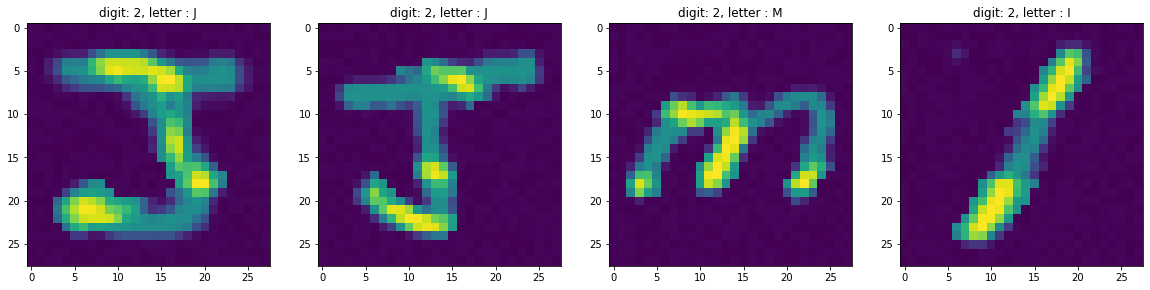

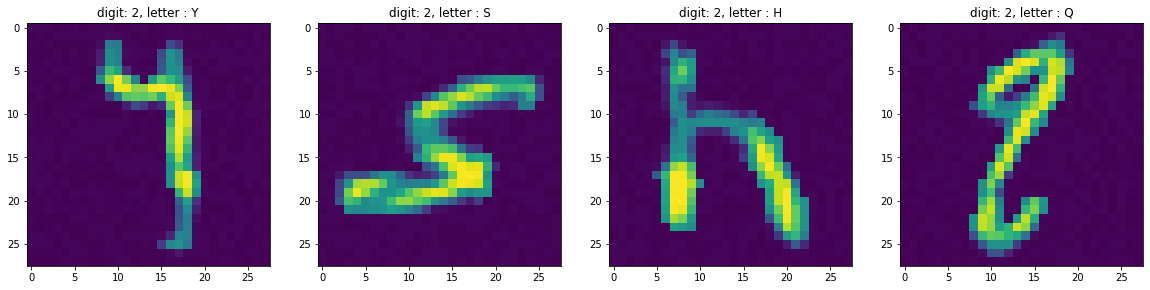

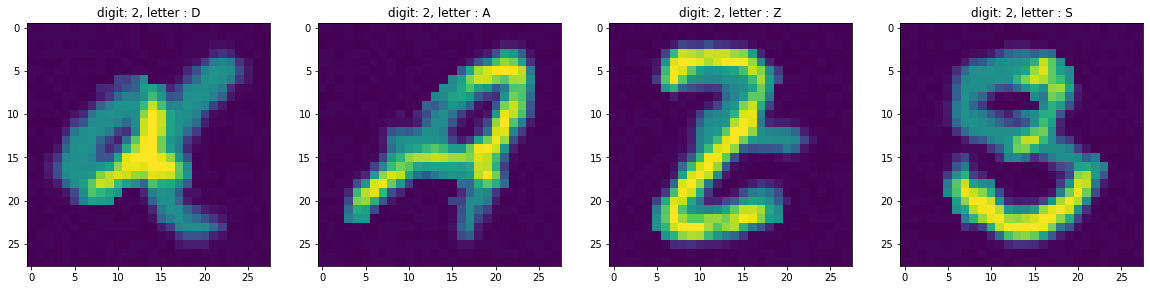

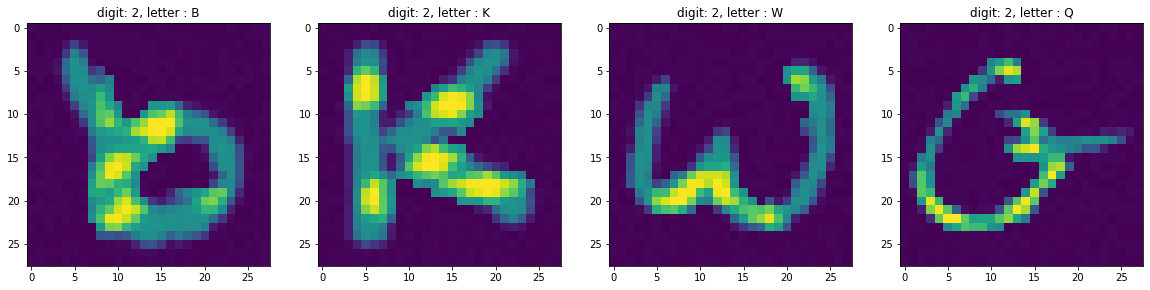

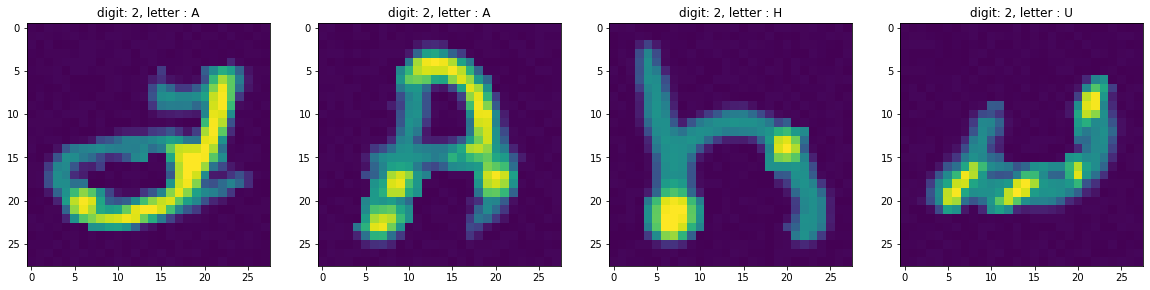

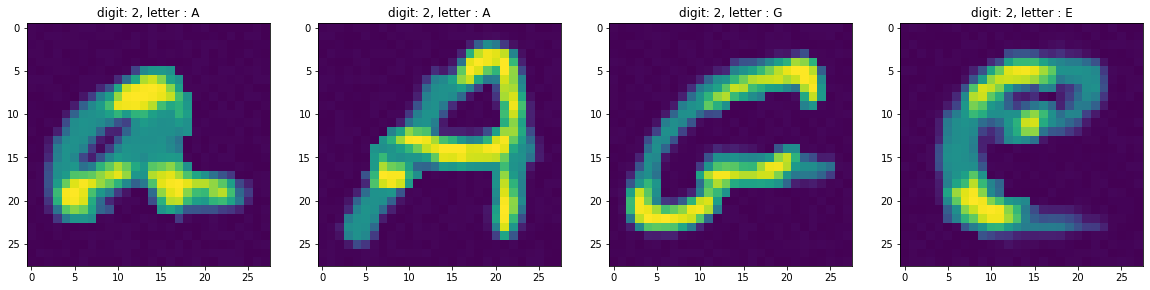

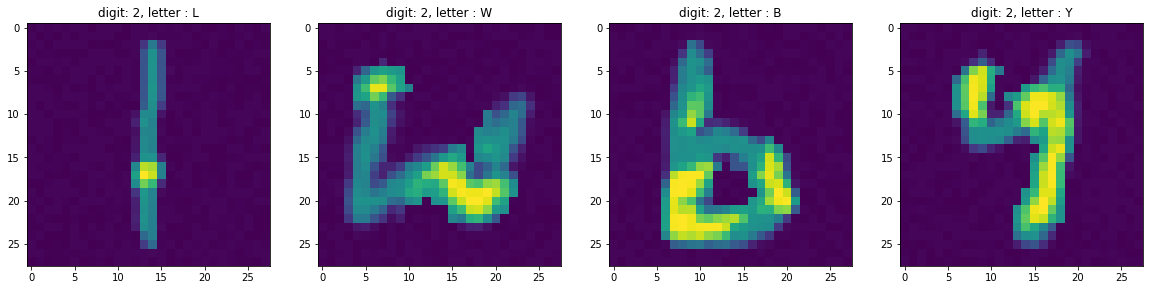

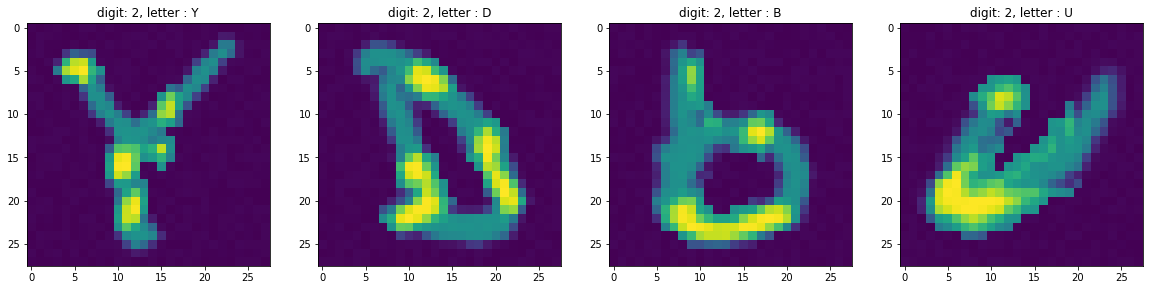

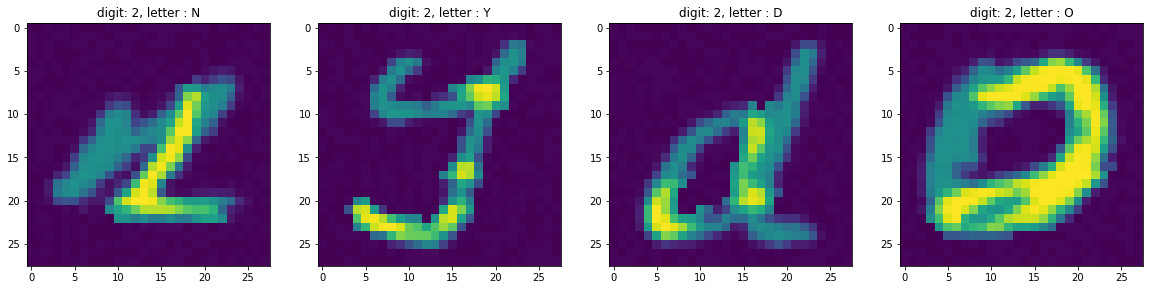

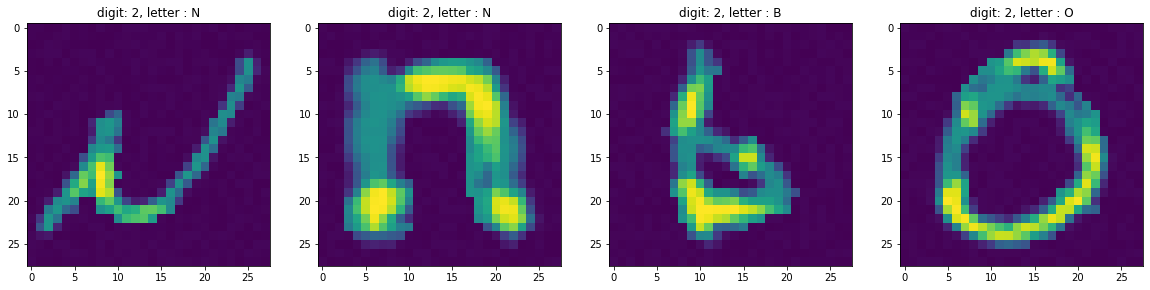

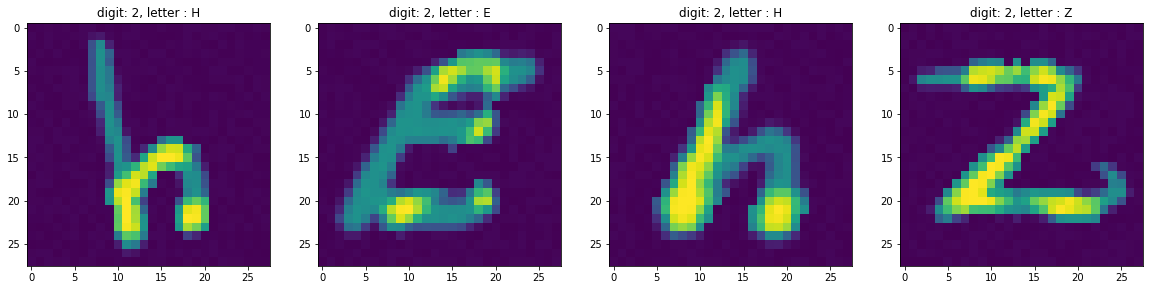

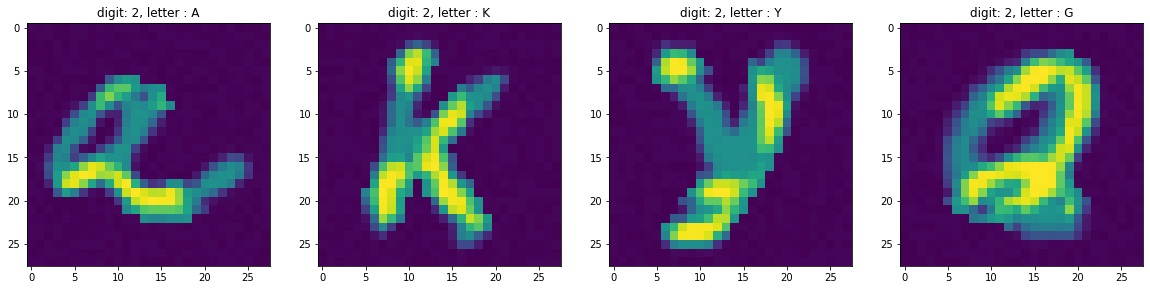

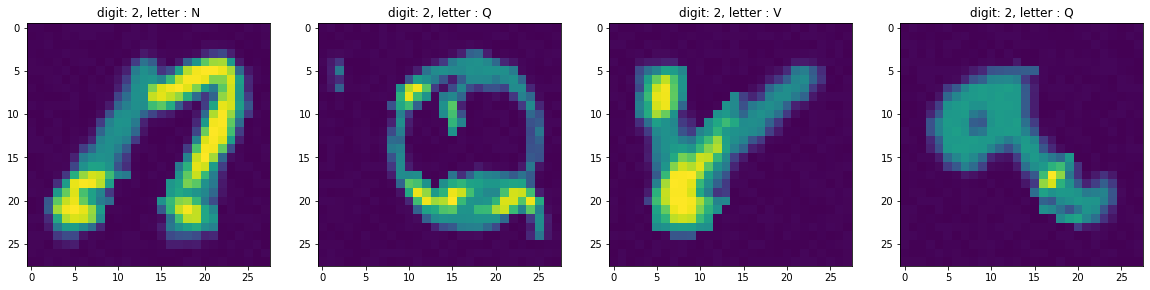

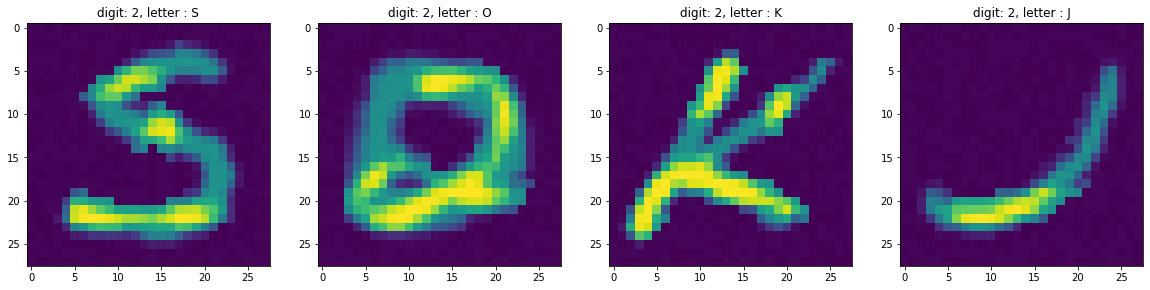

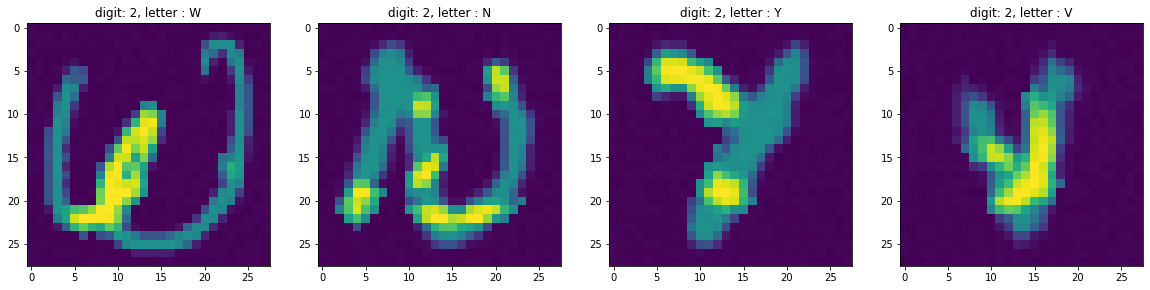

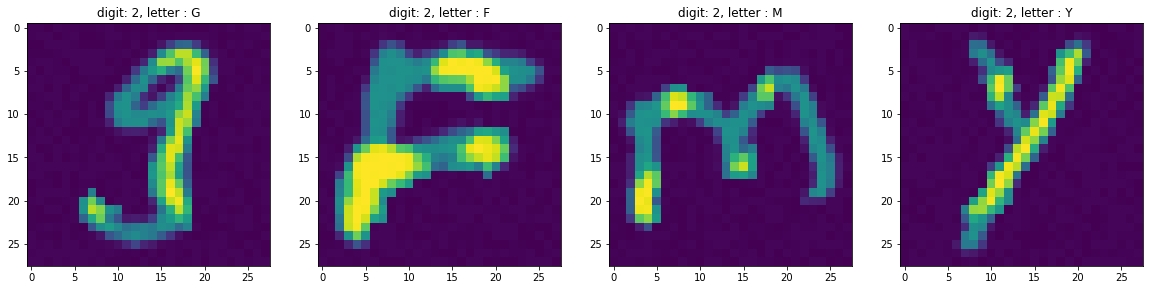

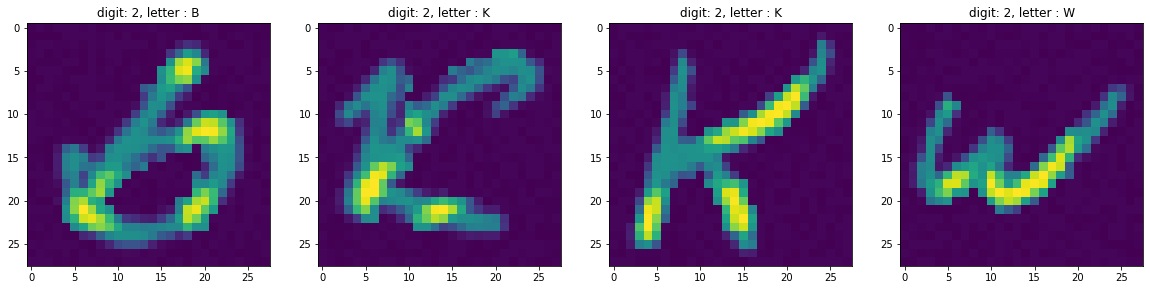

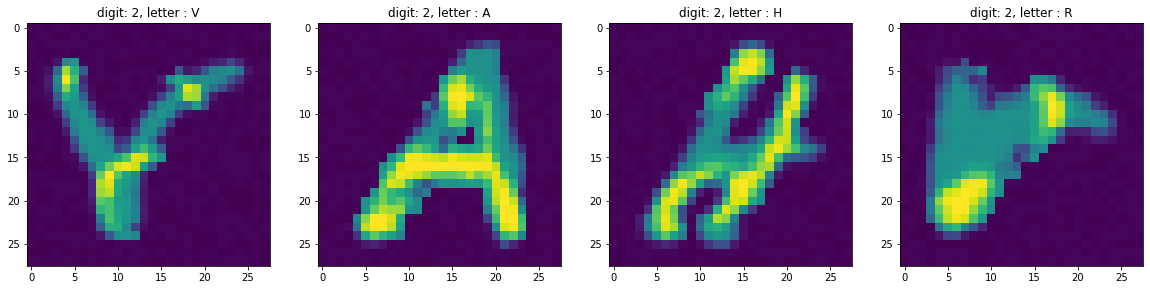

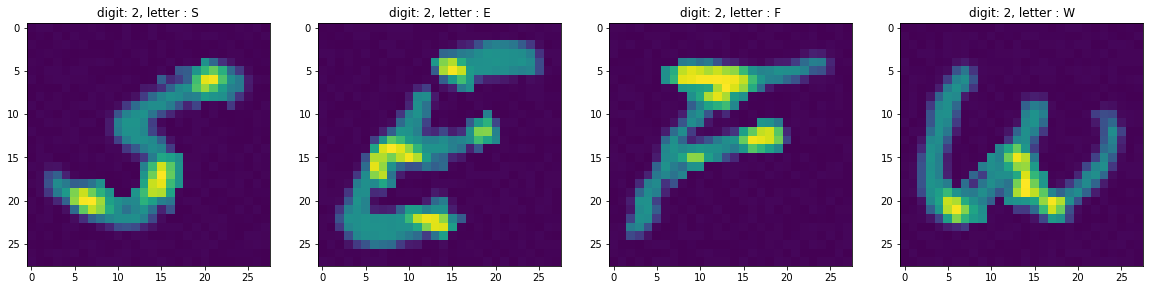

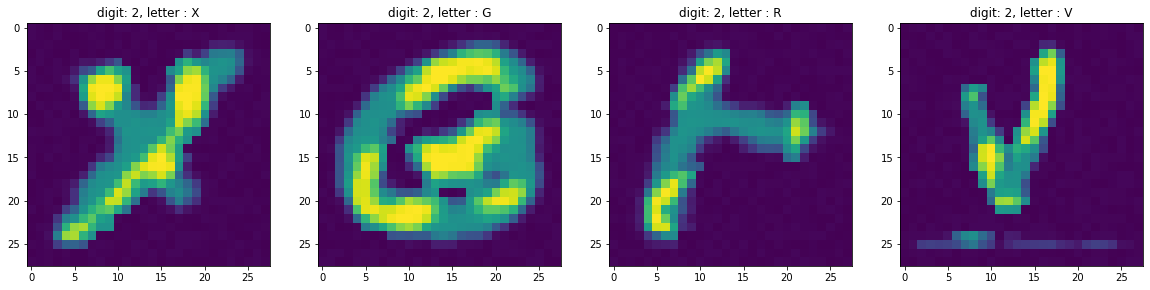

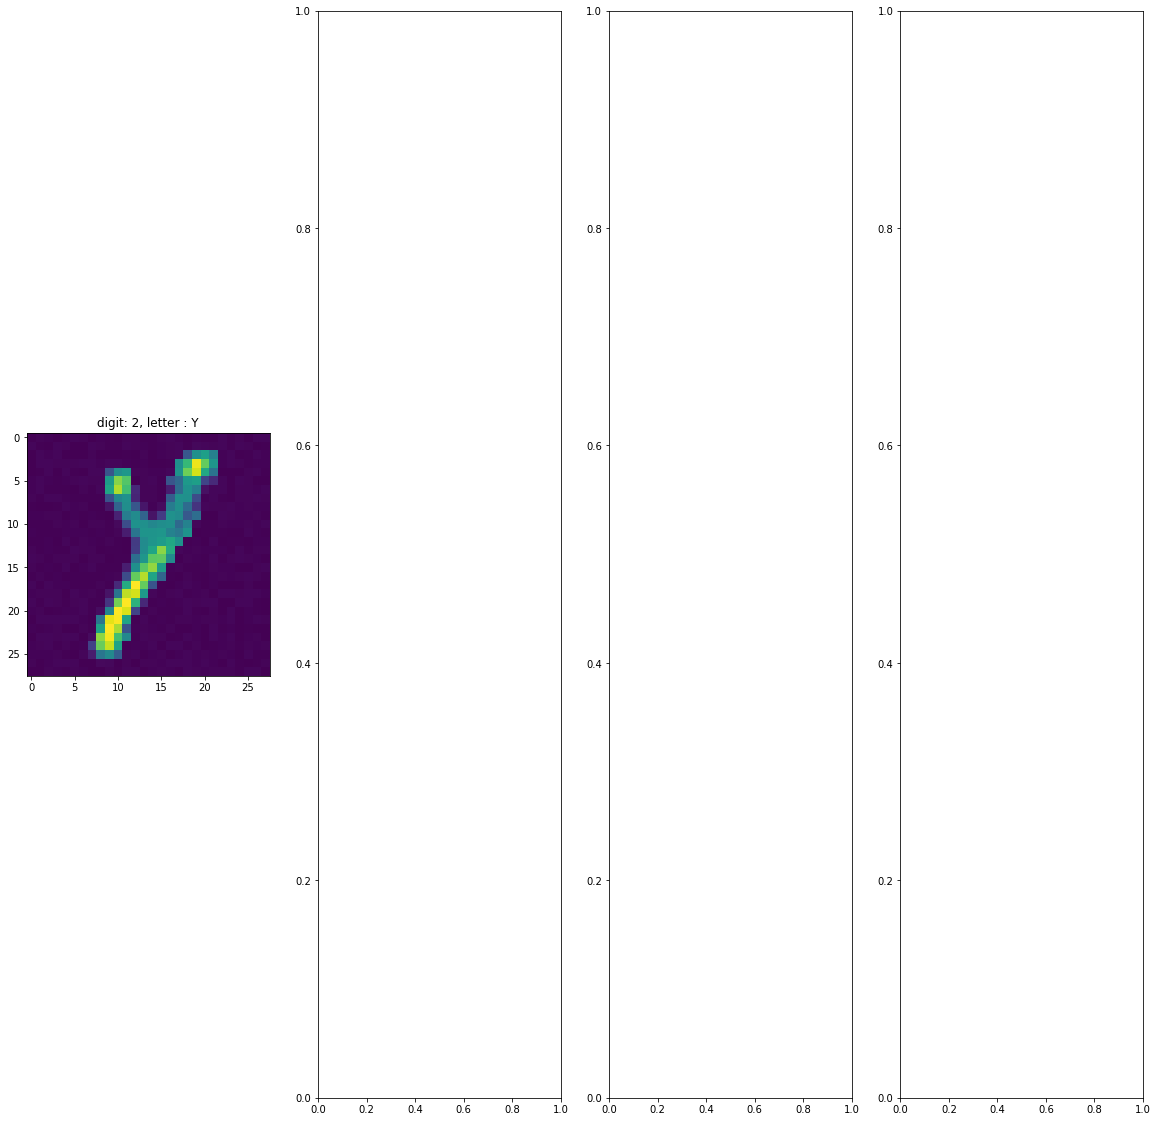

In [31]:
# digit == 2

plot_number(2)

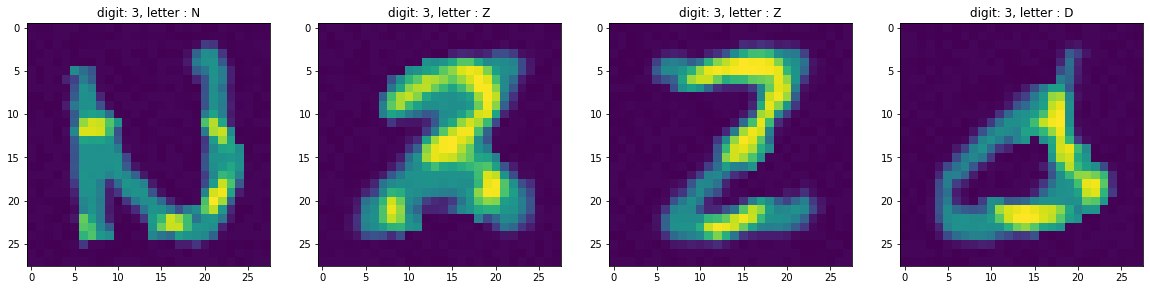

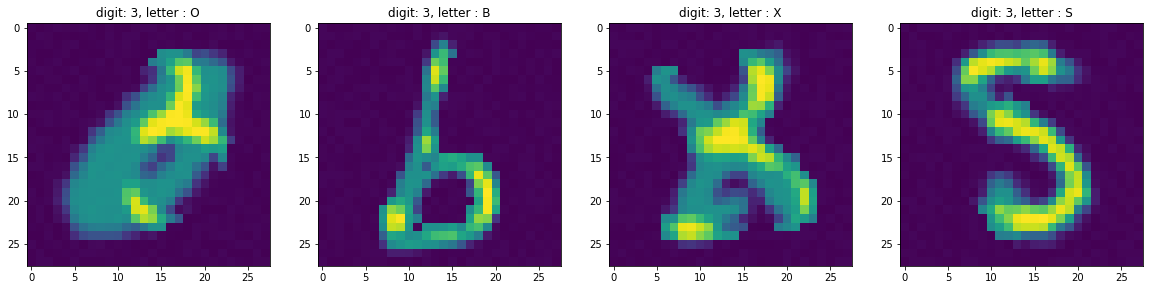

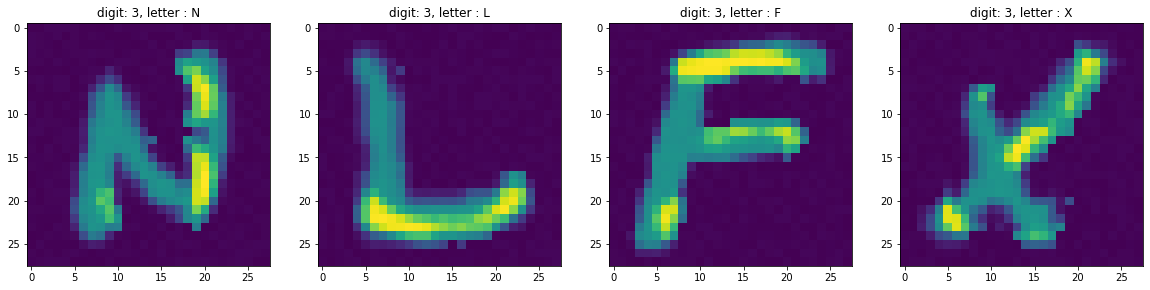

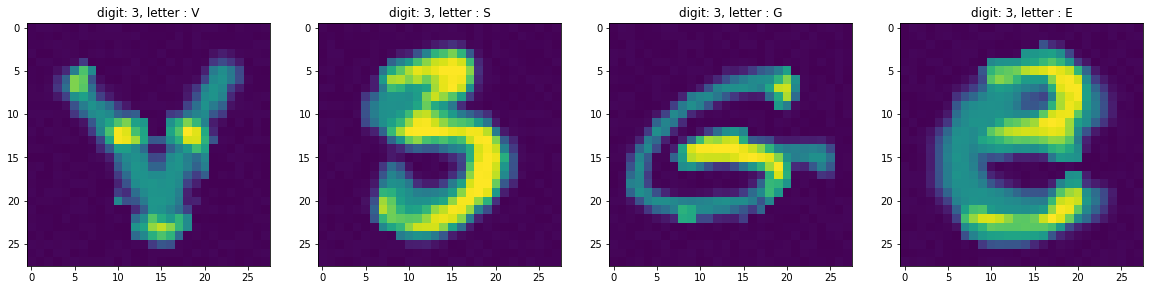

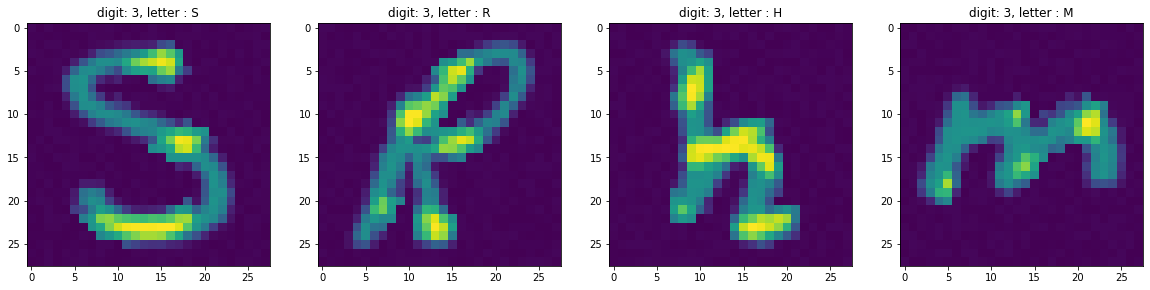

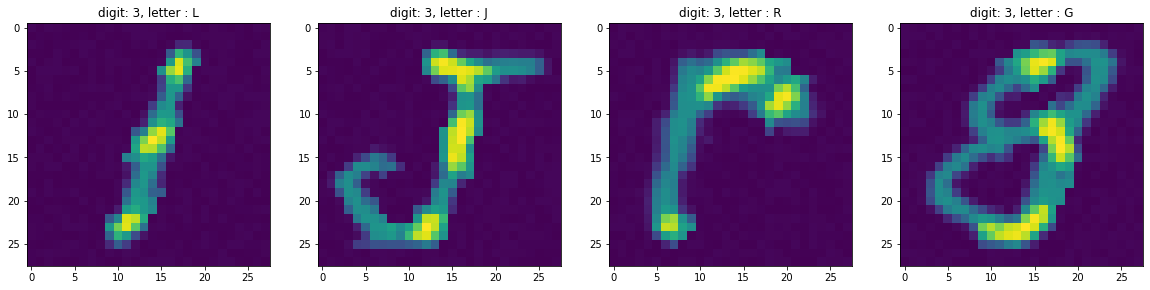

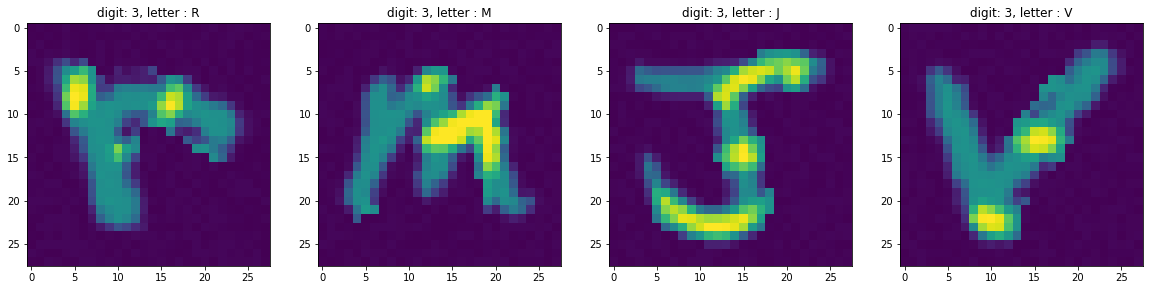

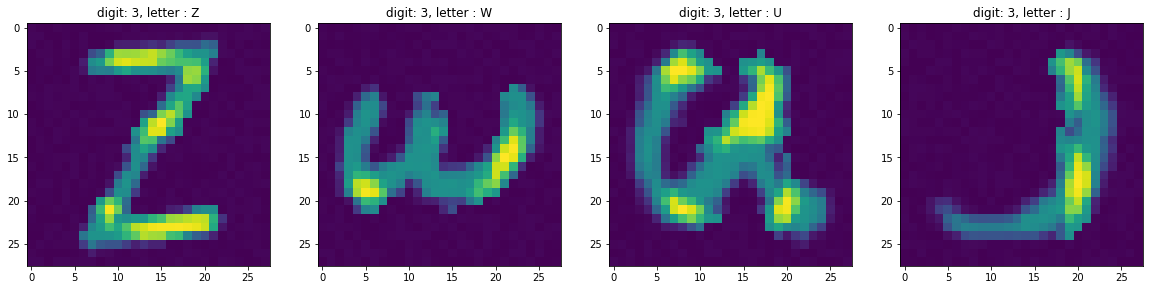

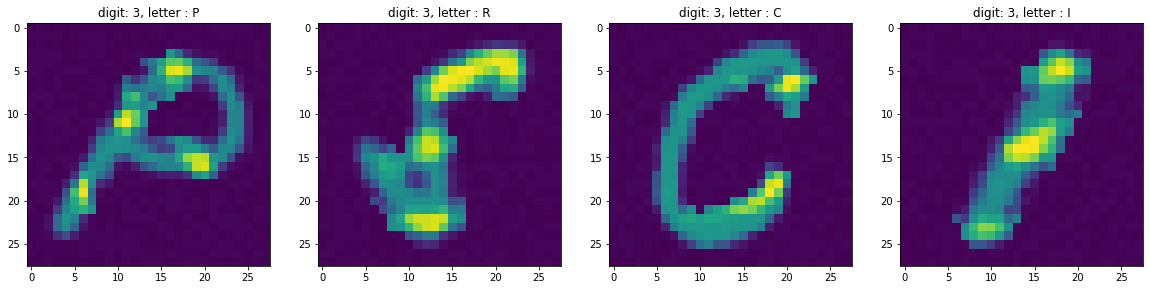

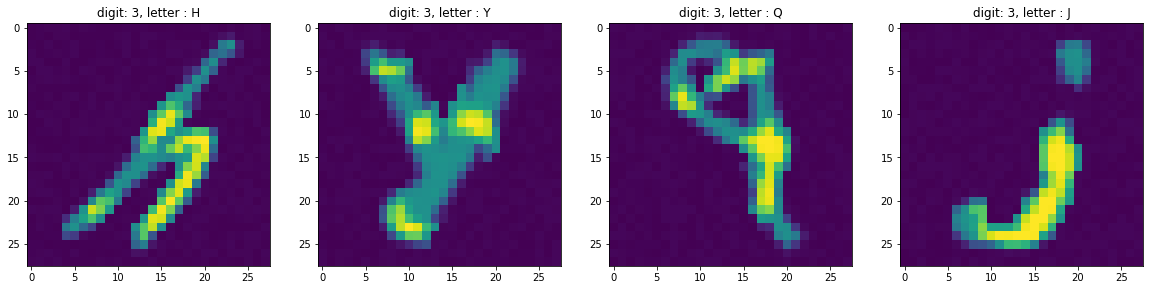

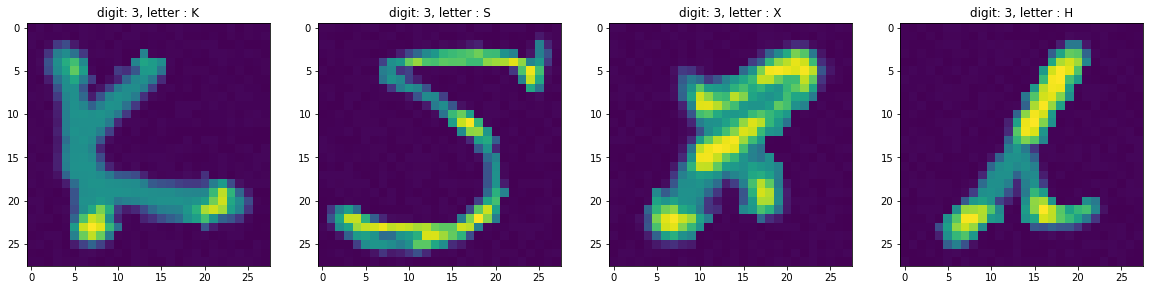

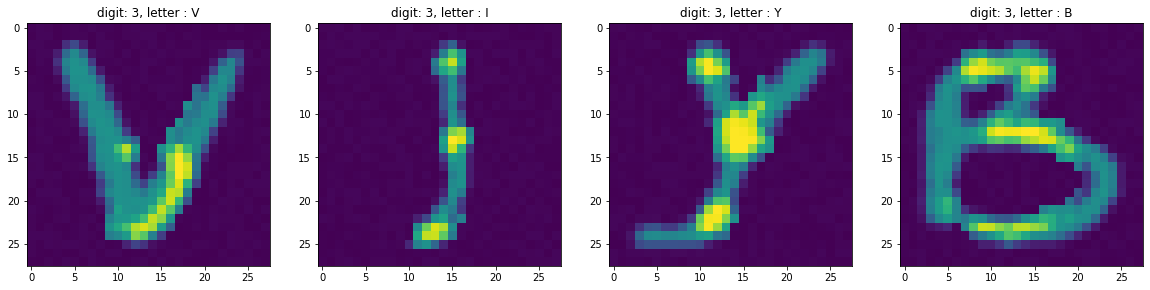

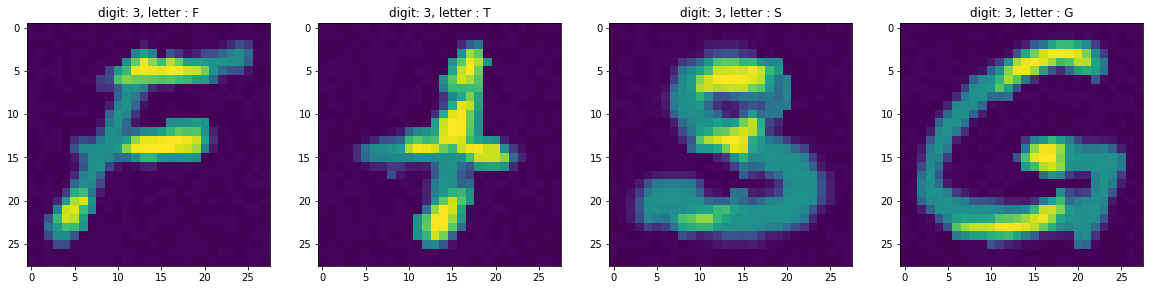

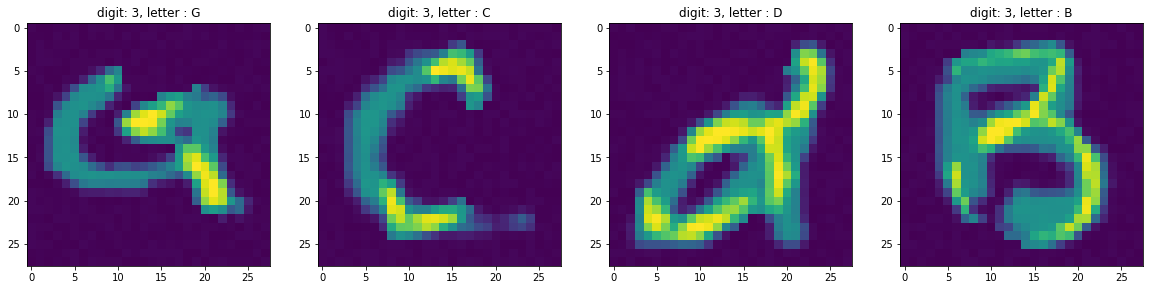

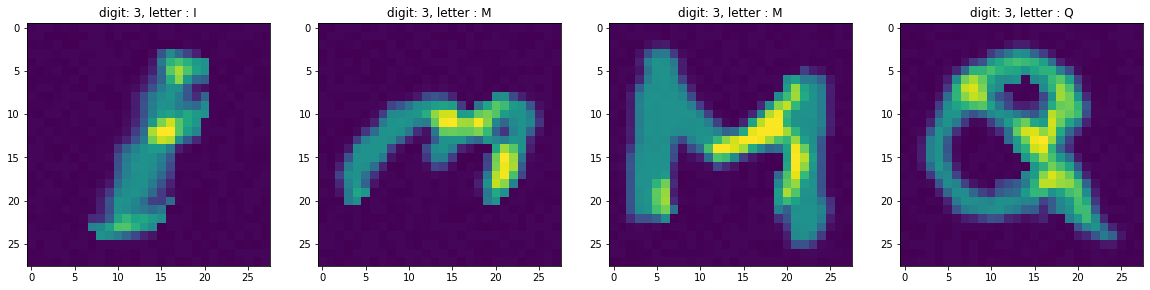

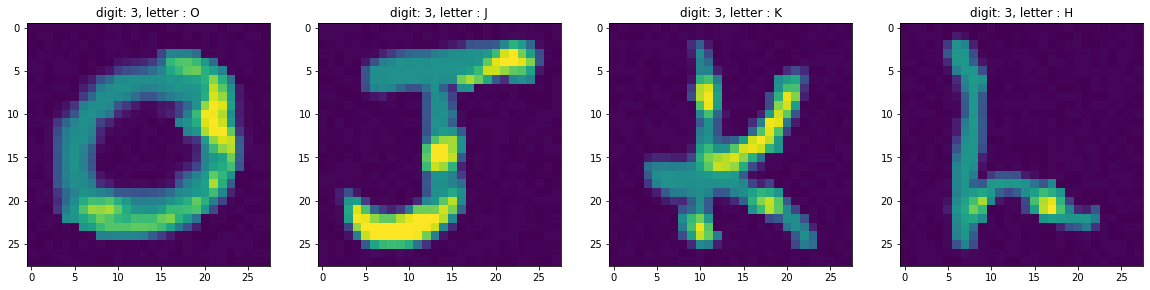

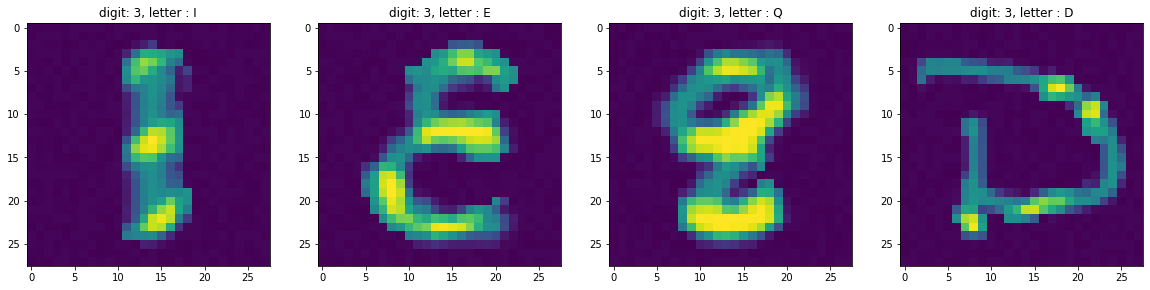

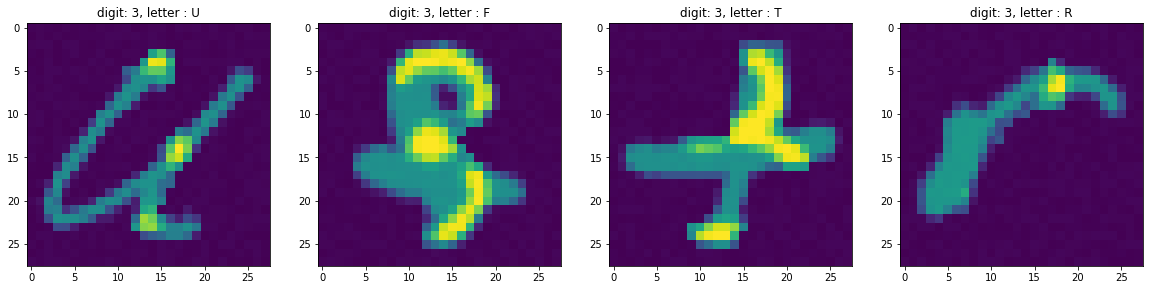

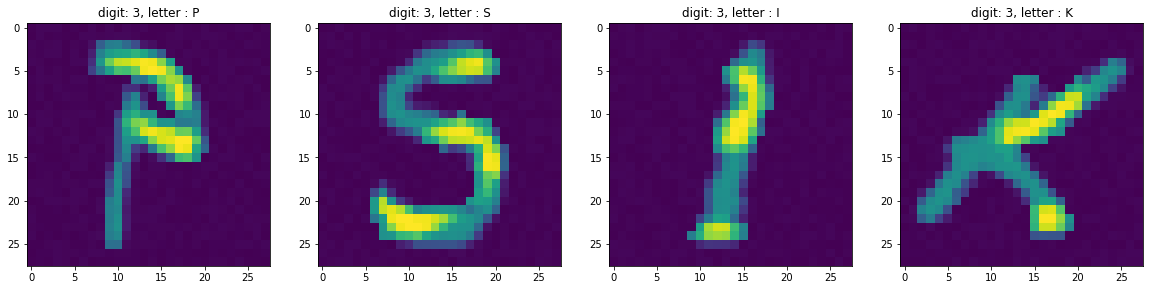

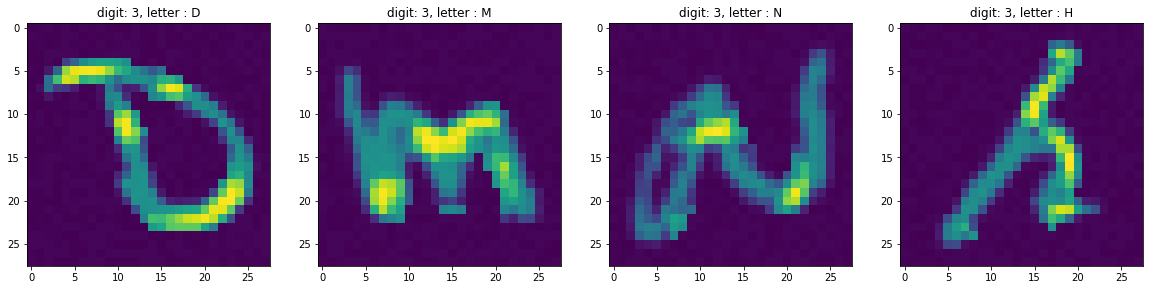

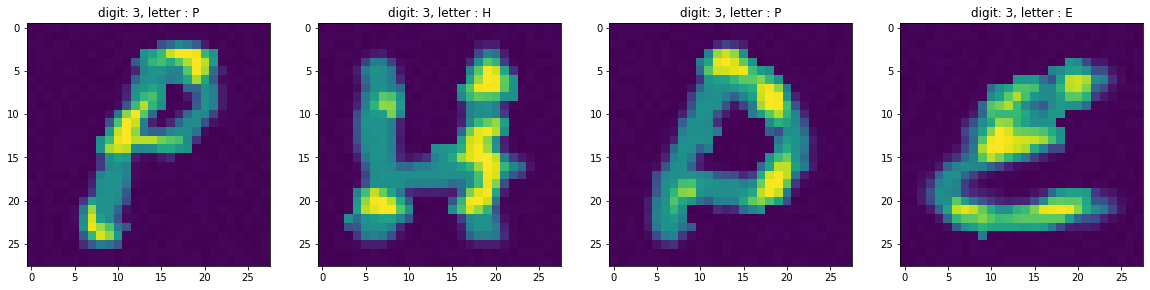

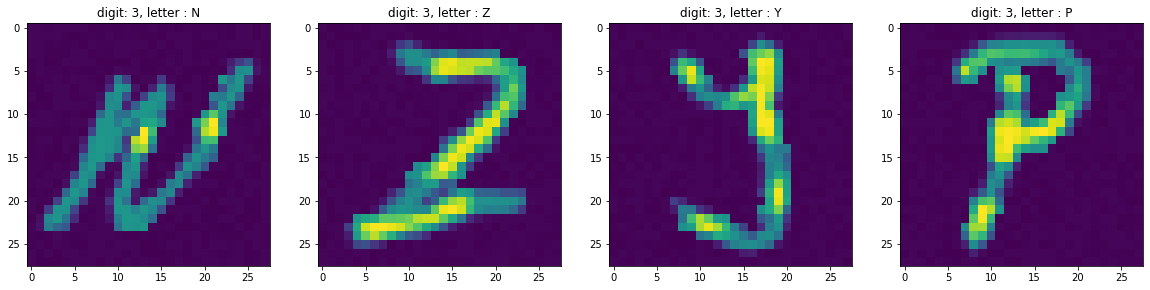

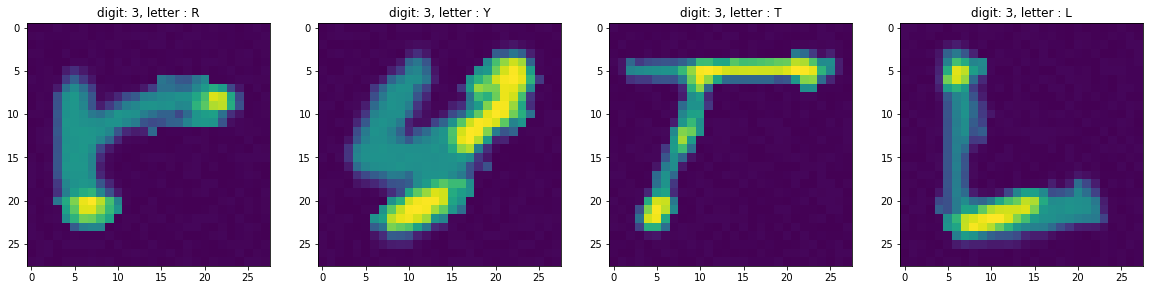

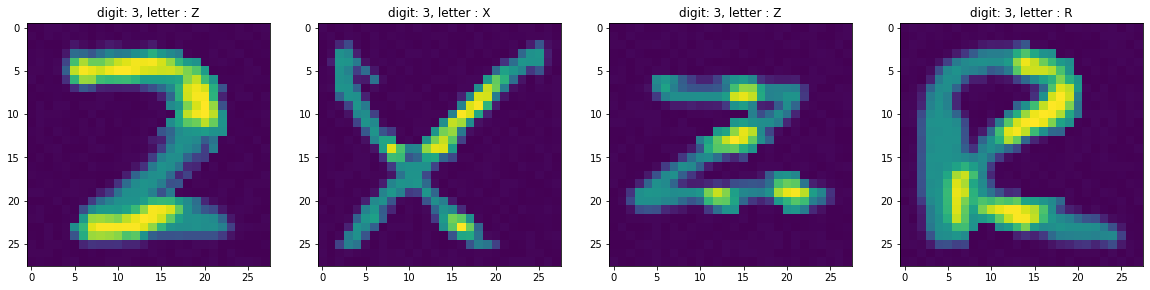

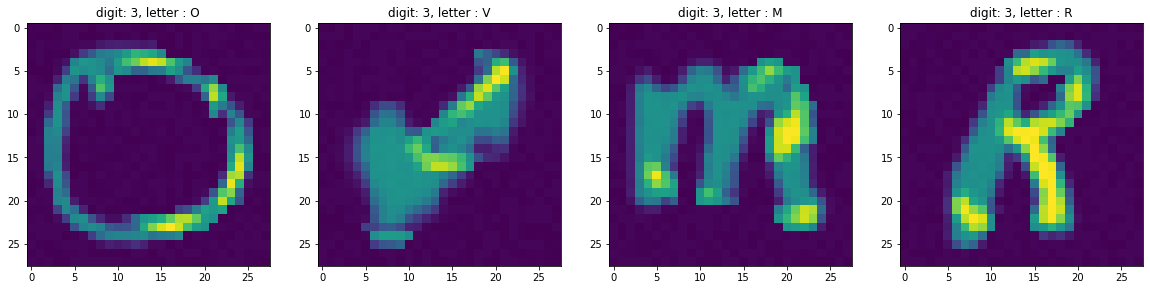

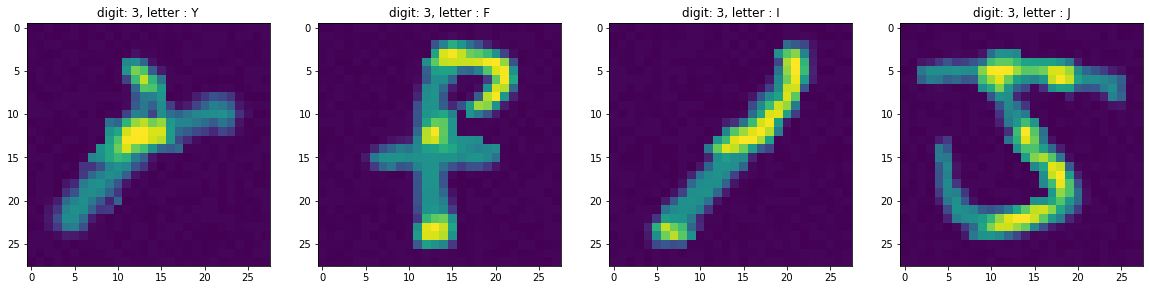

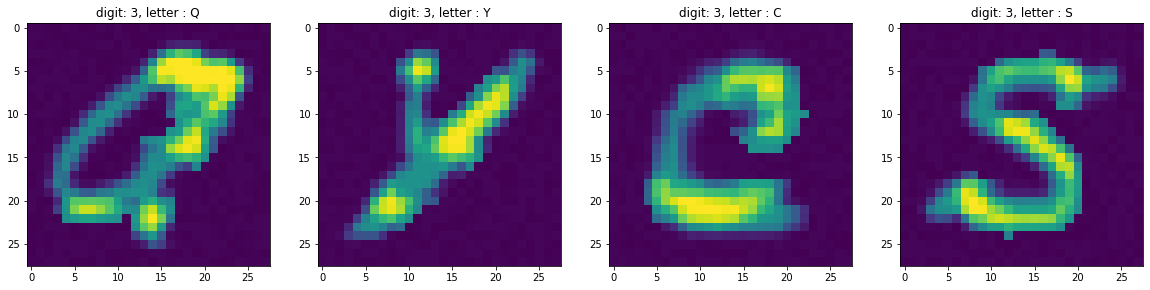

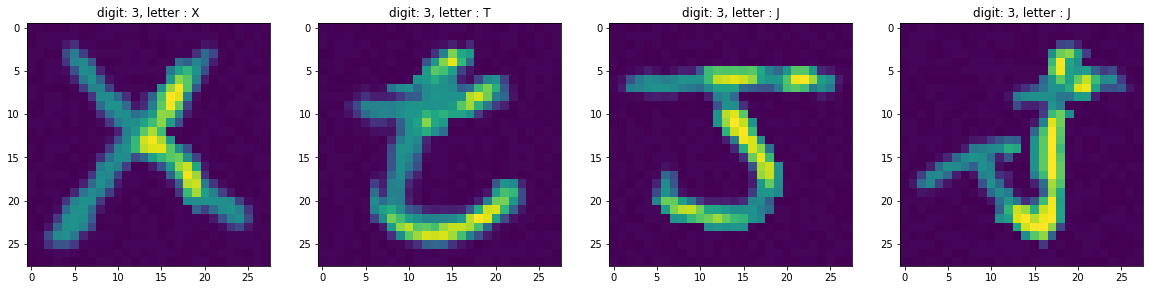

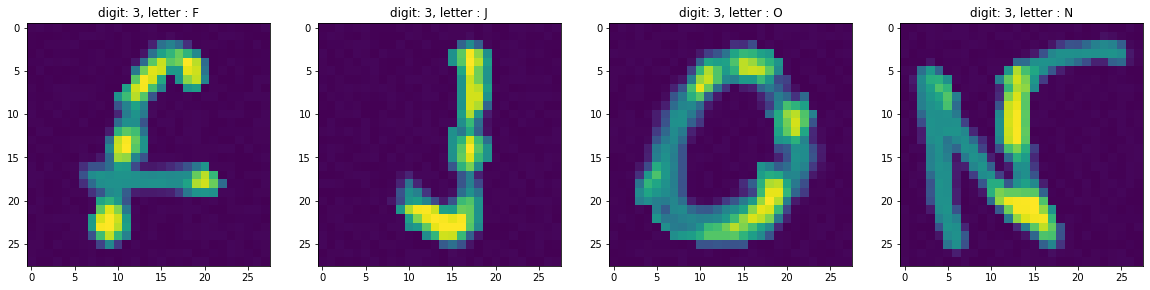

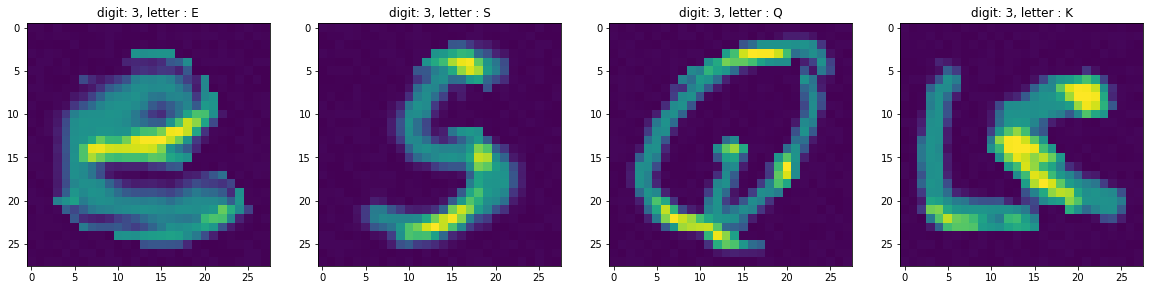

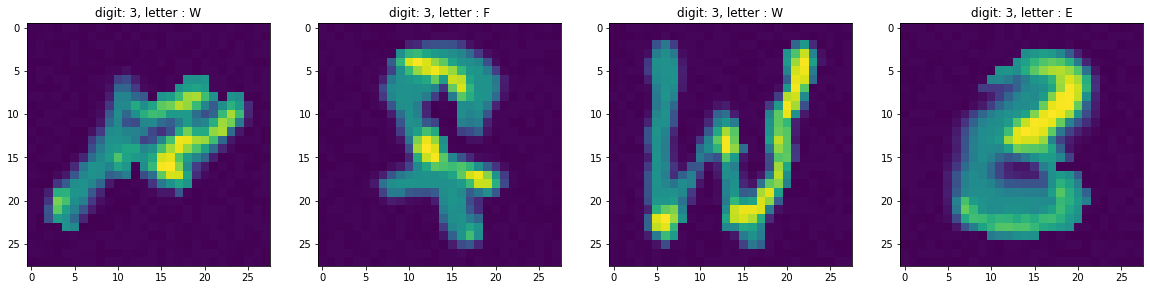

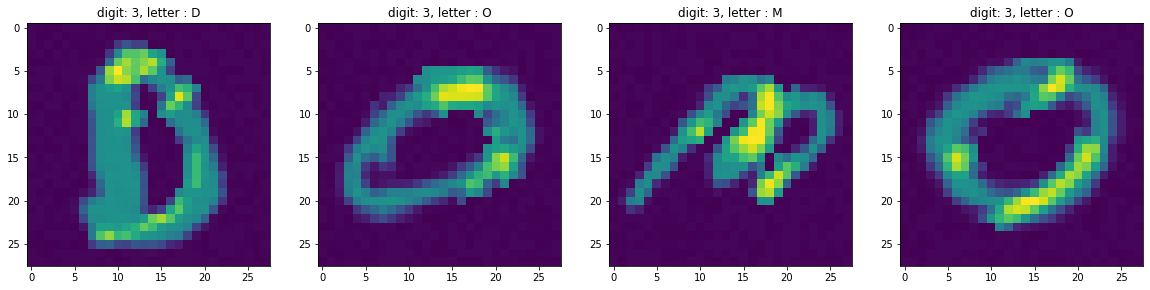

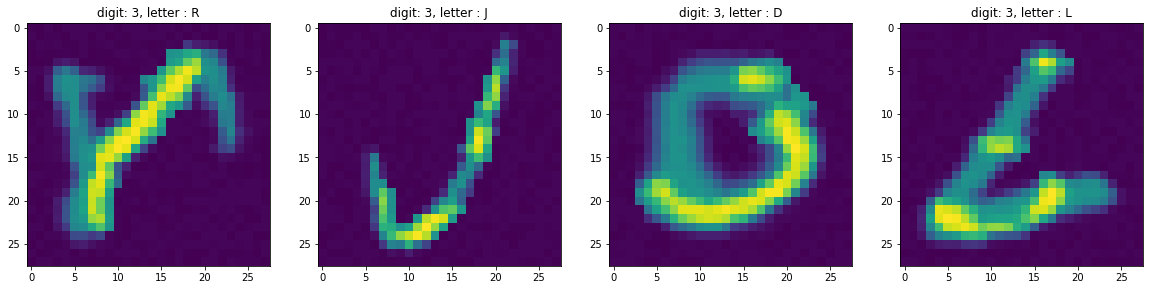

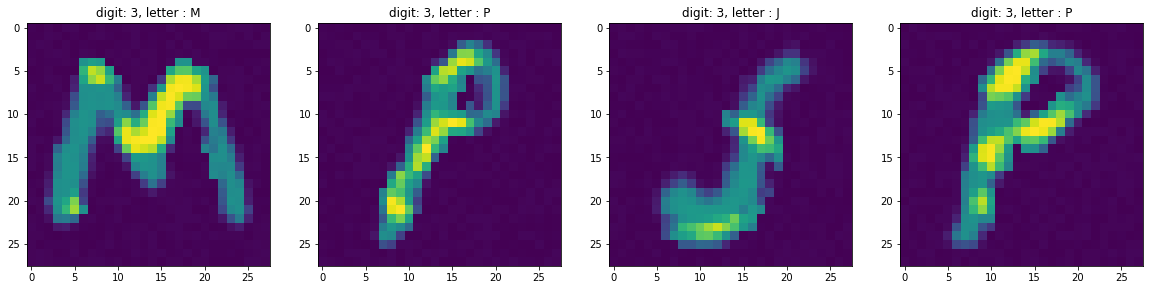

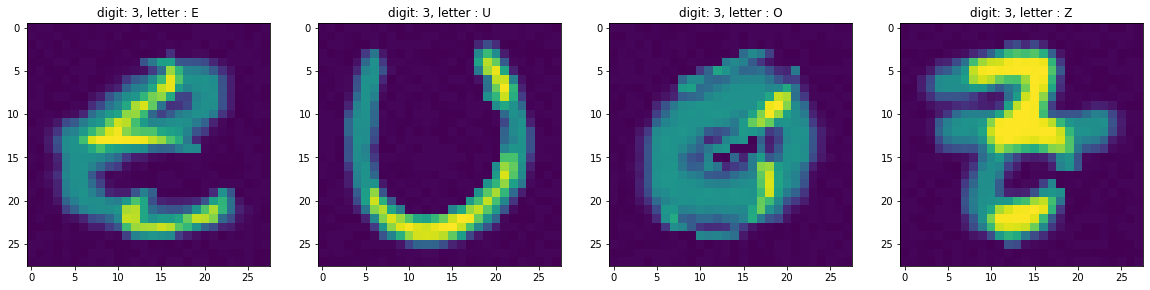

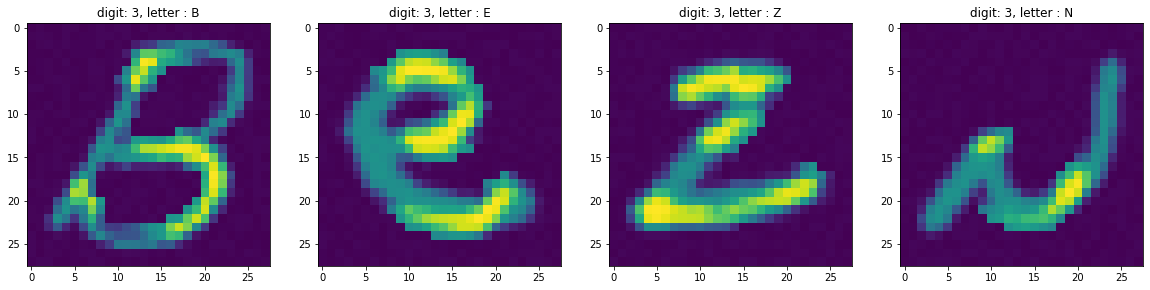

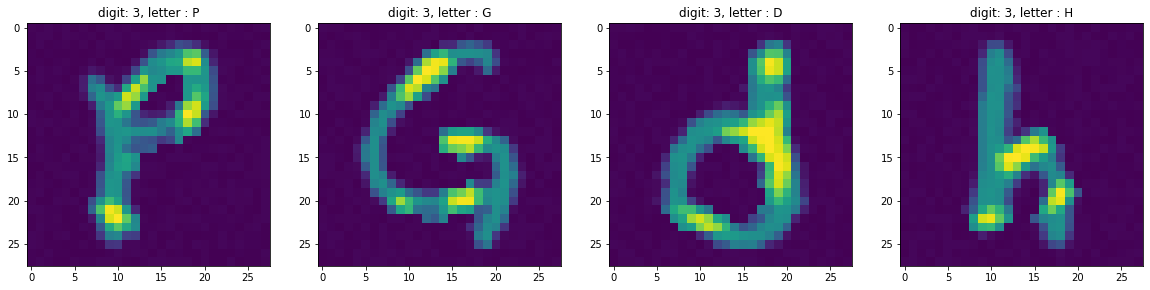

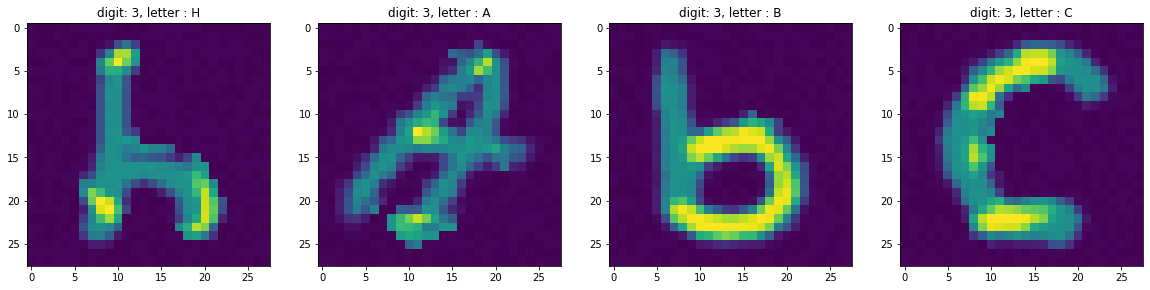

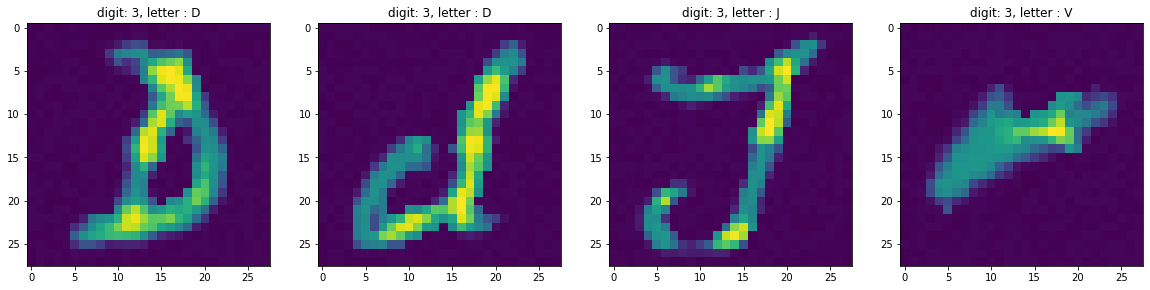

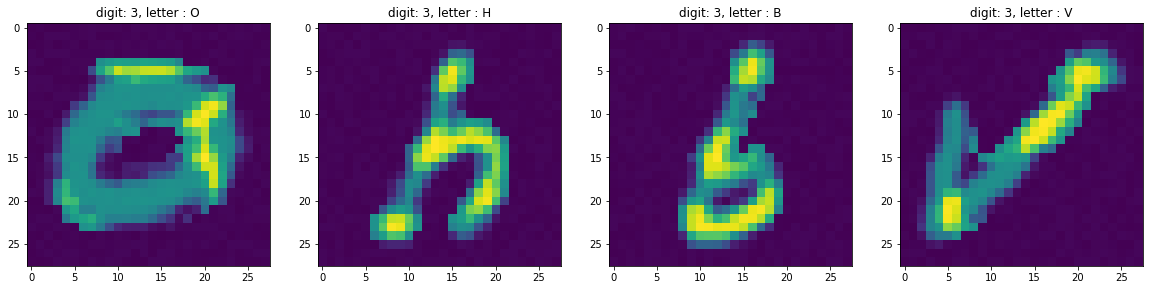

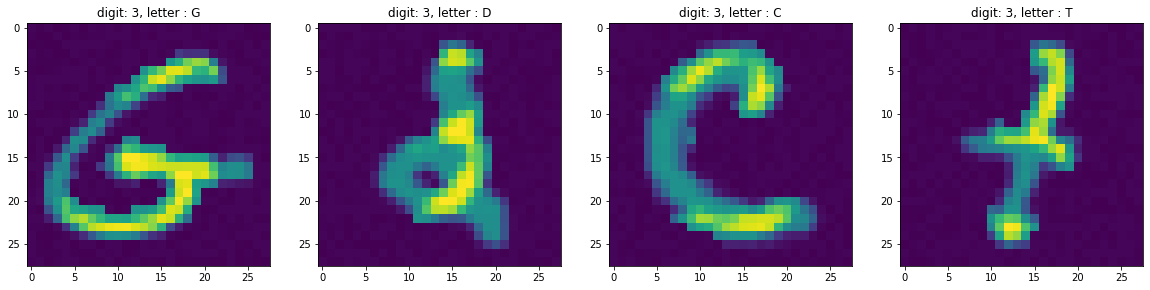

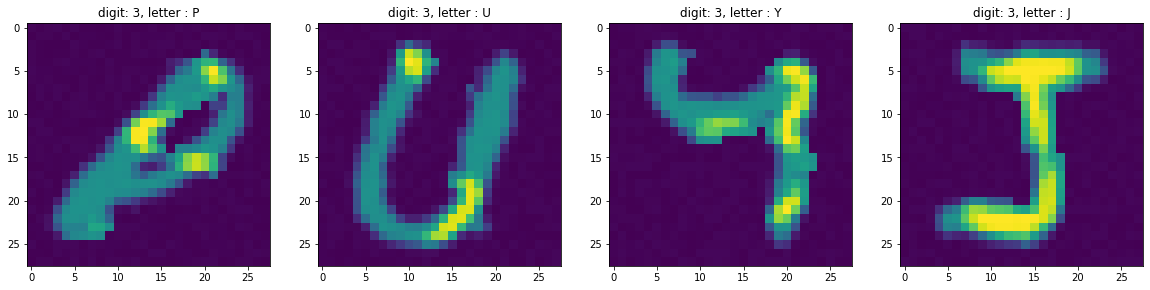

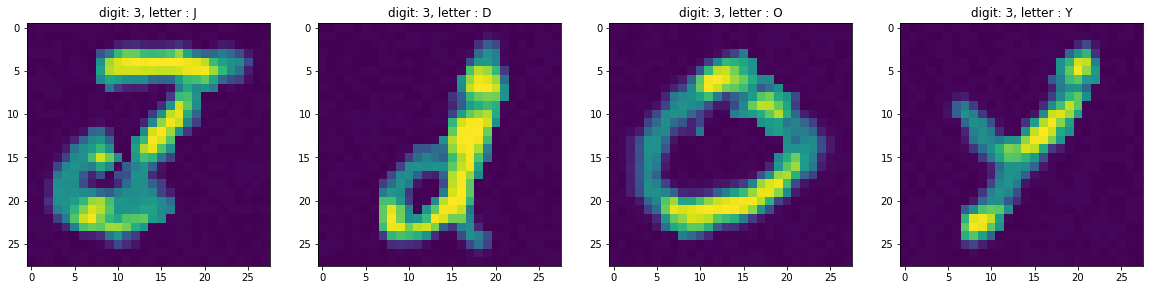

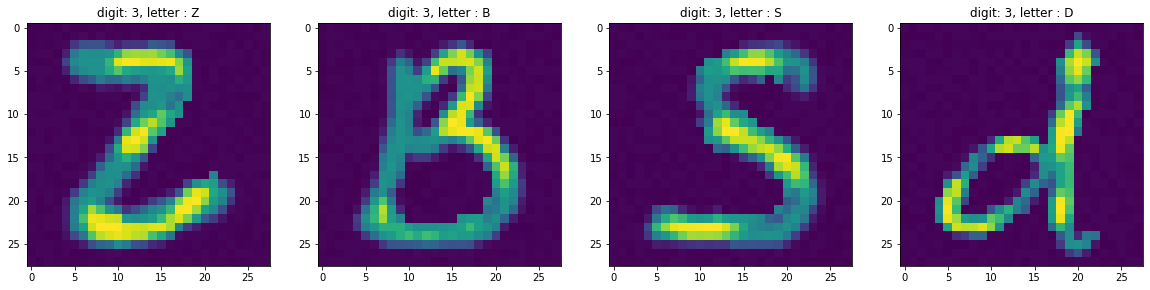

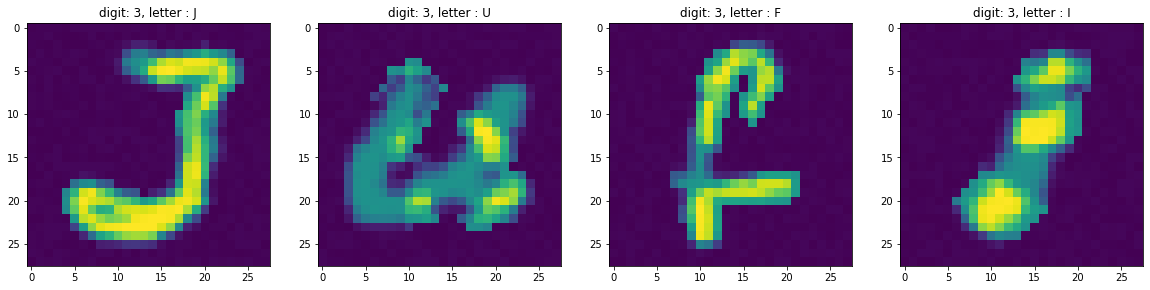

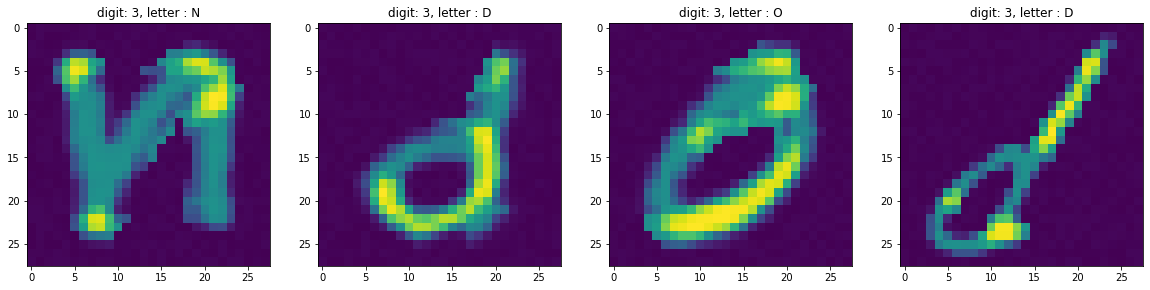

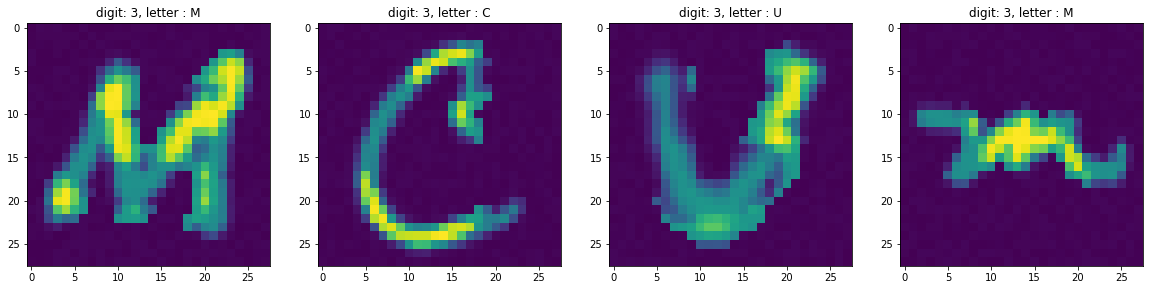

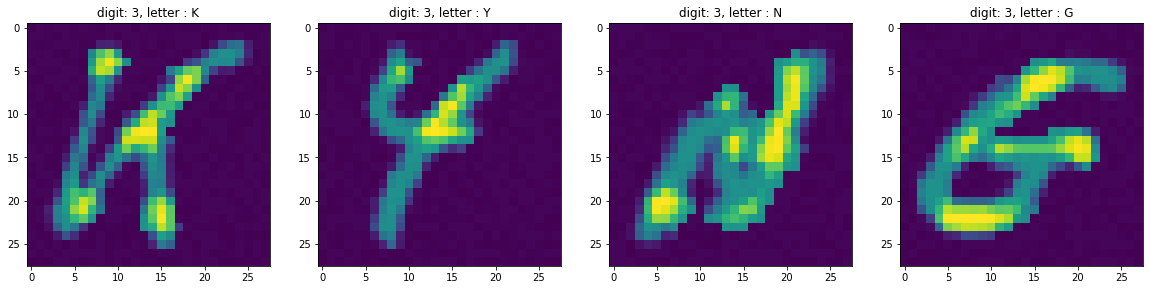

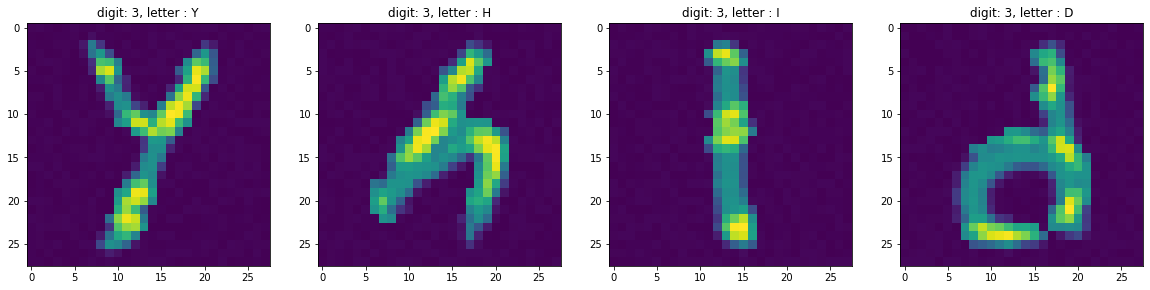

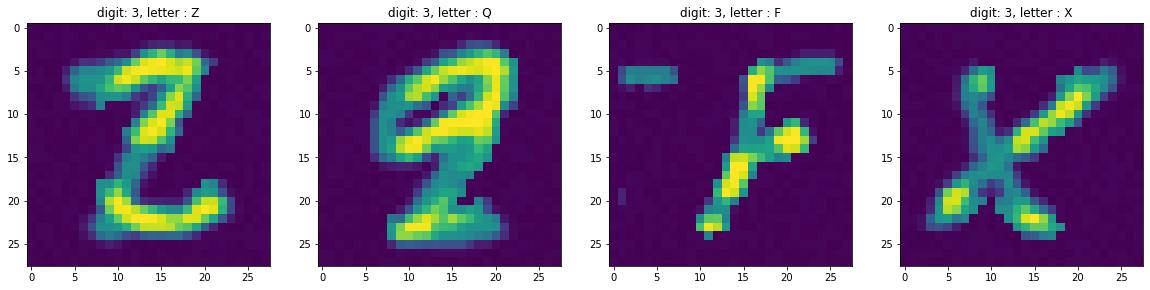

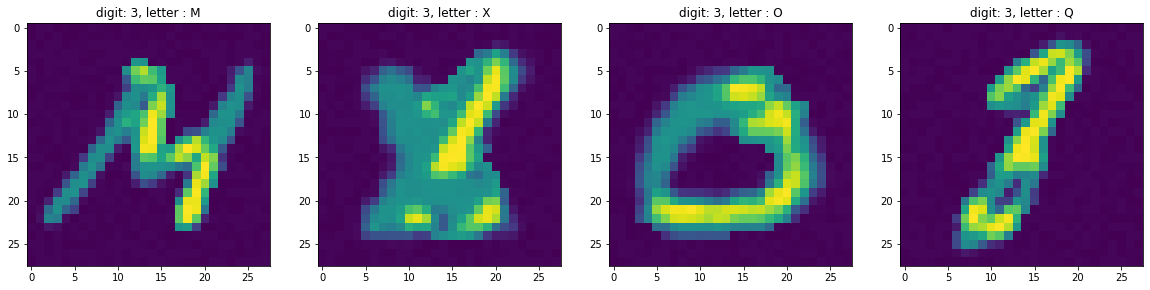

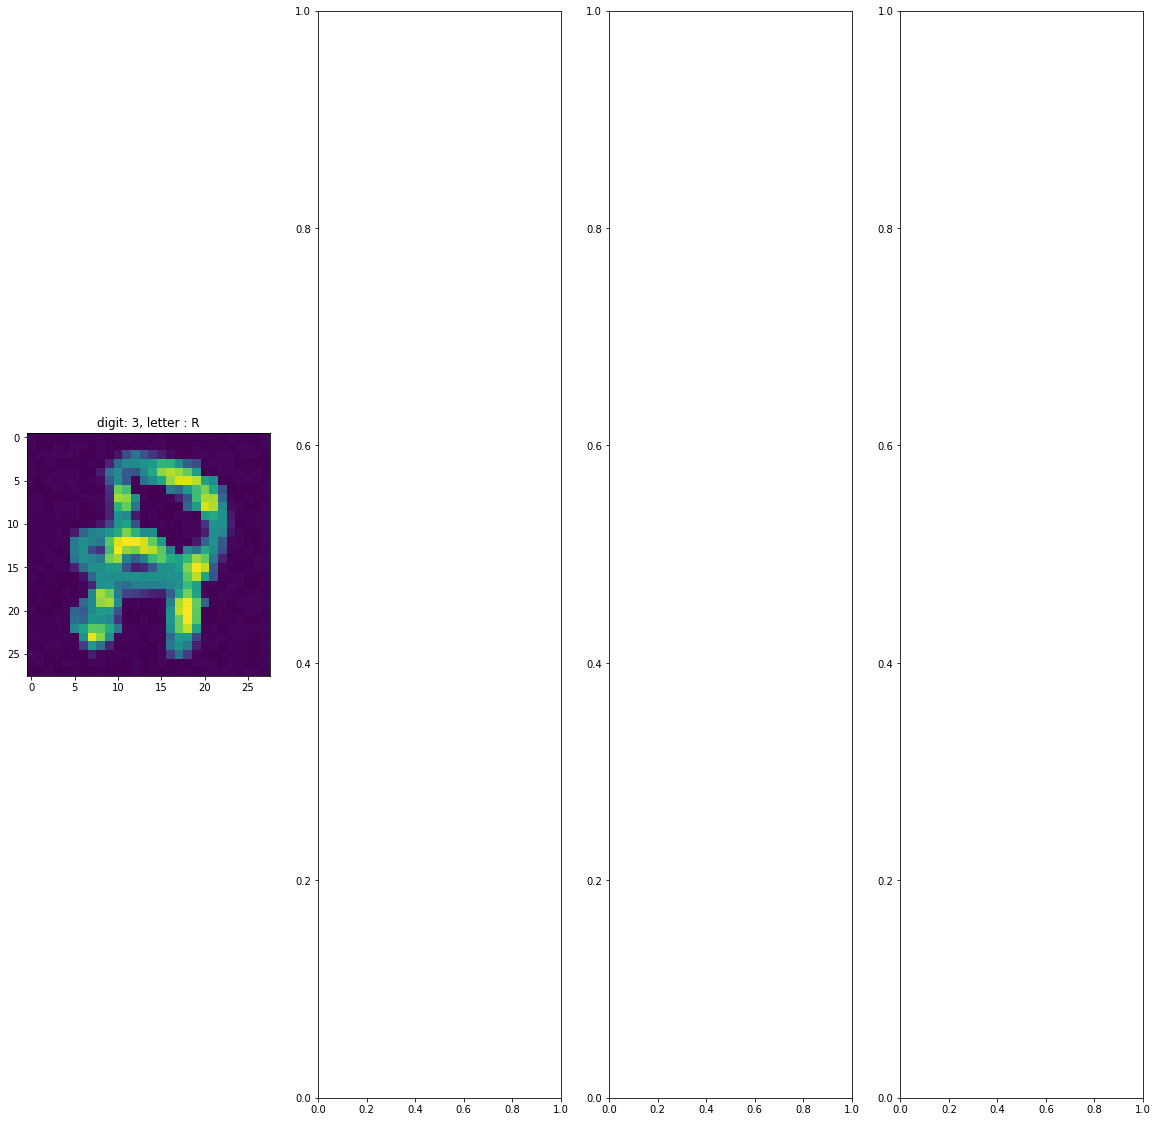

In [41]:
# digit == 3

plot_number(3)

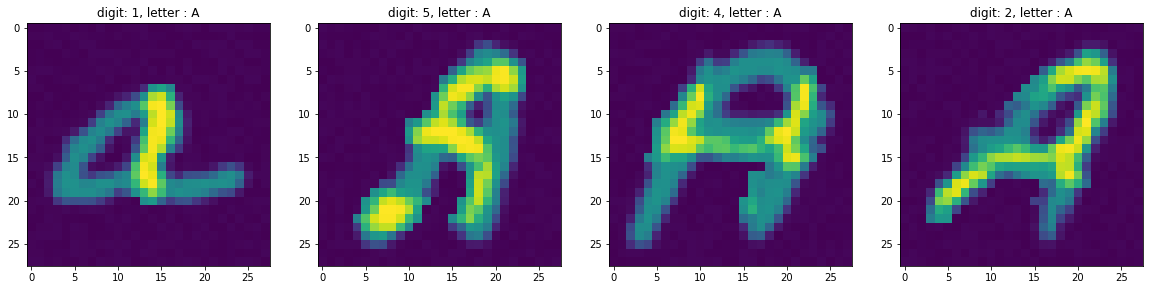

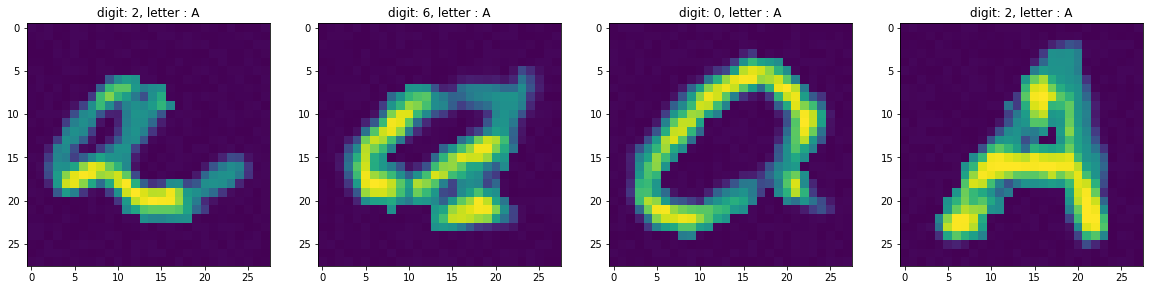

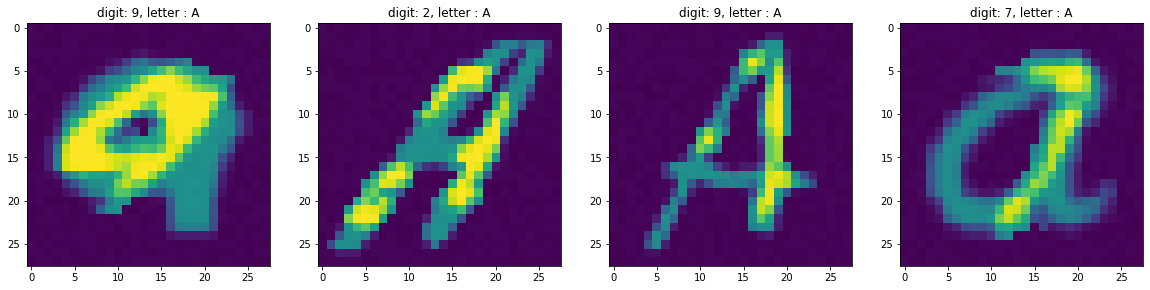

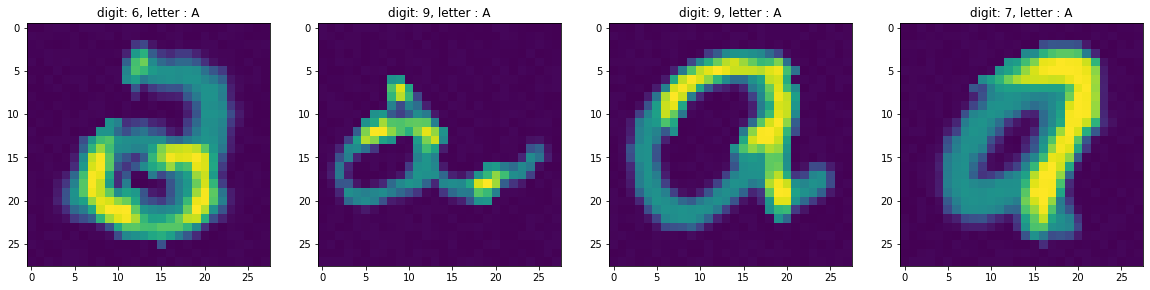

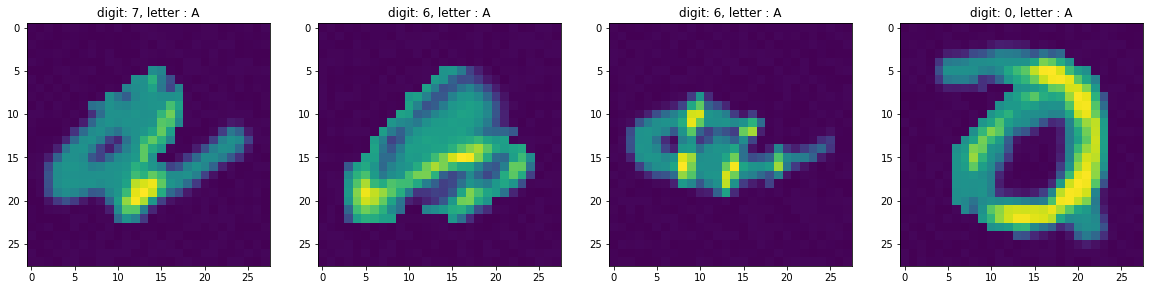

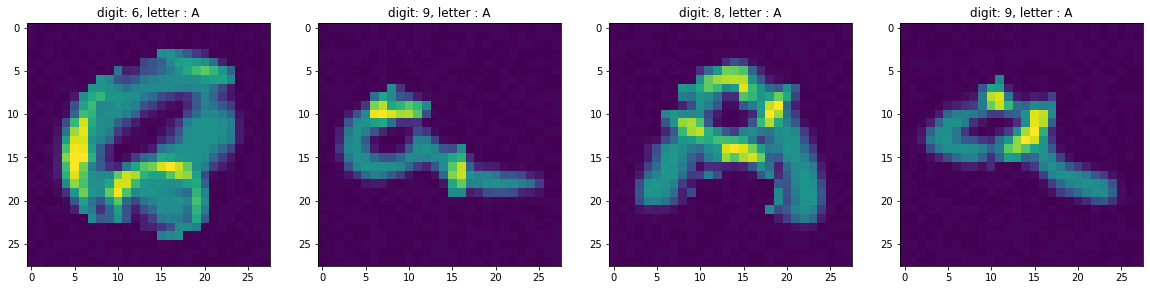

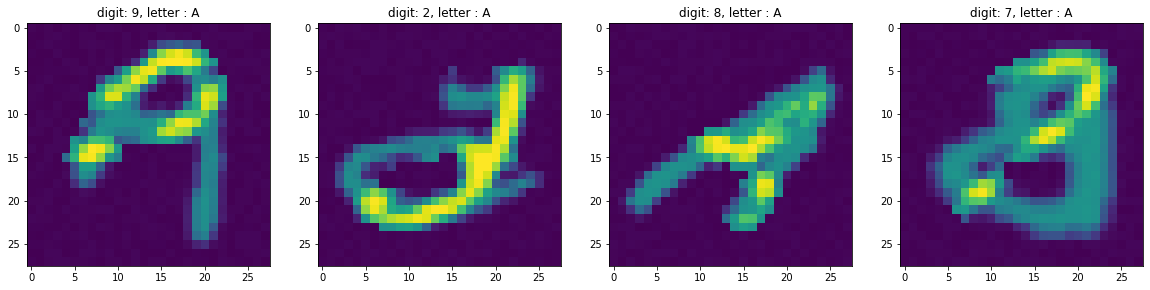

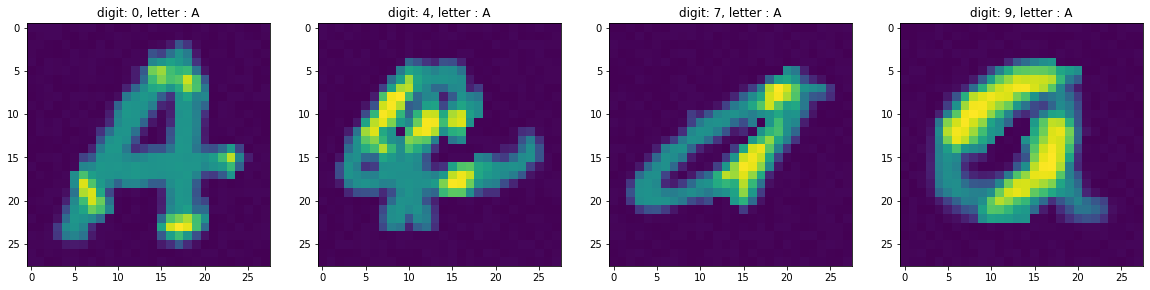

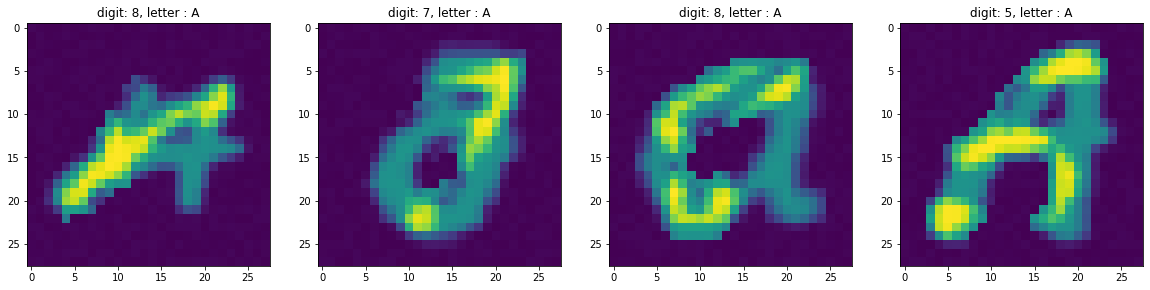

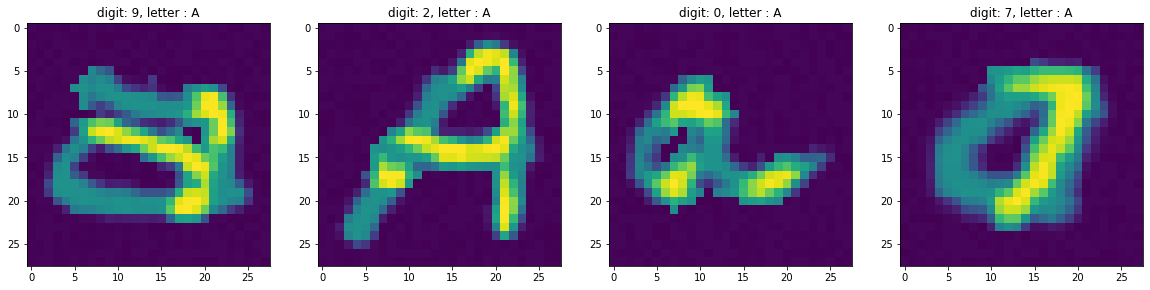

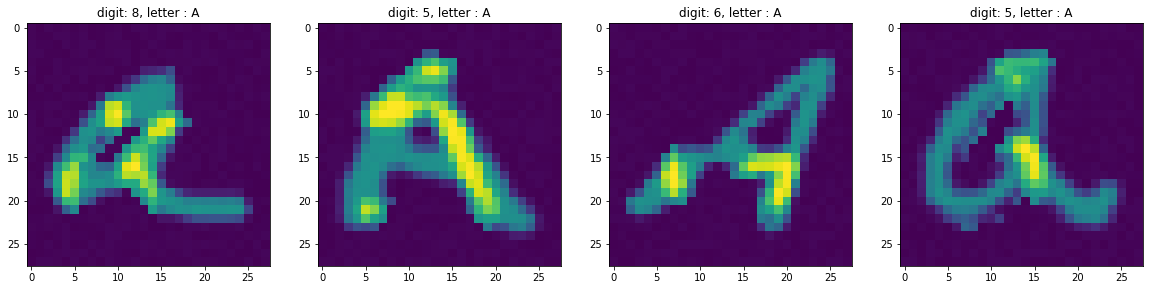

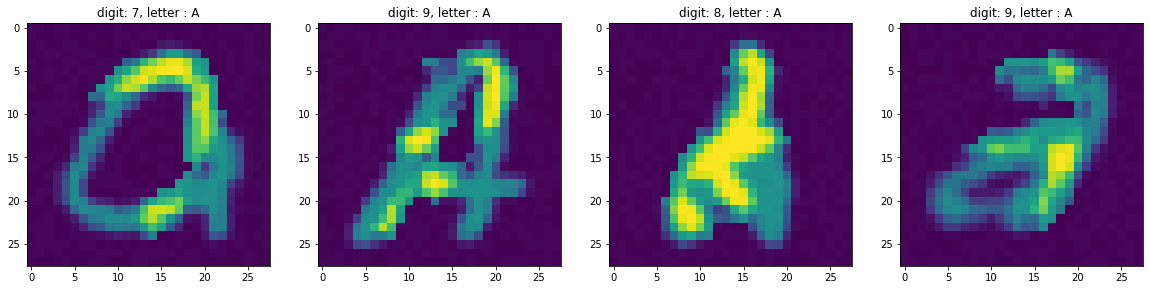

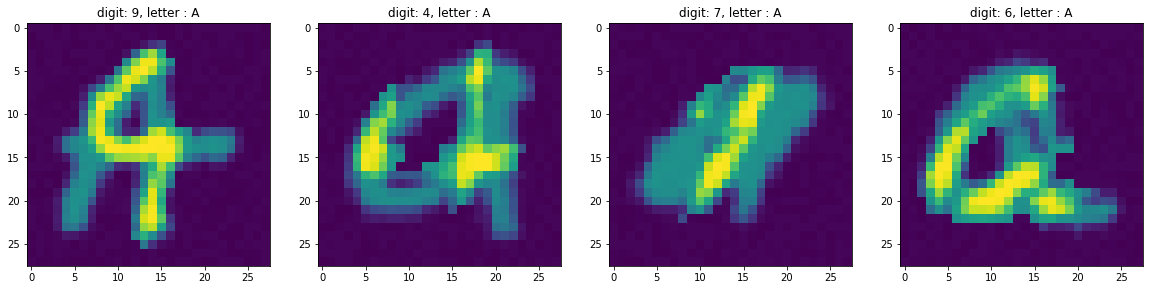

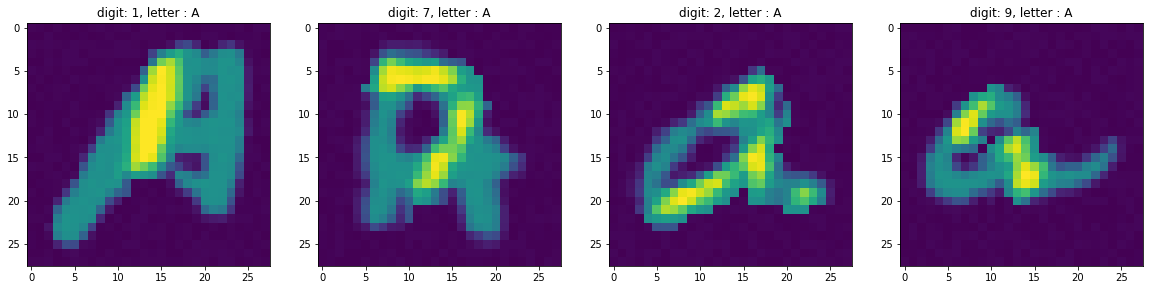

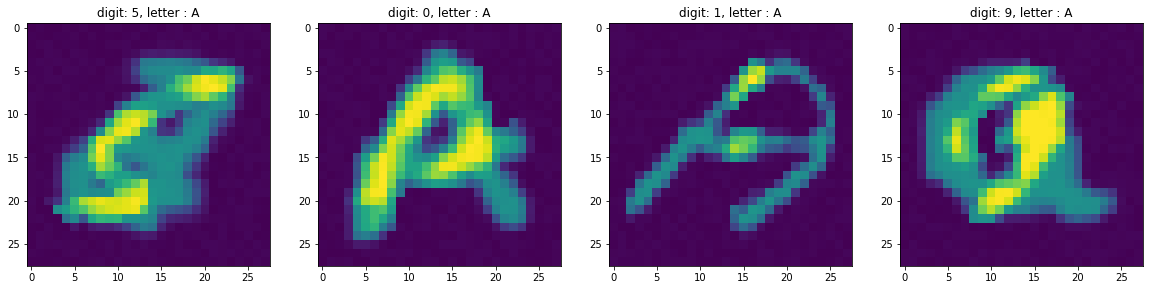

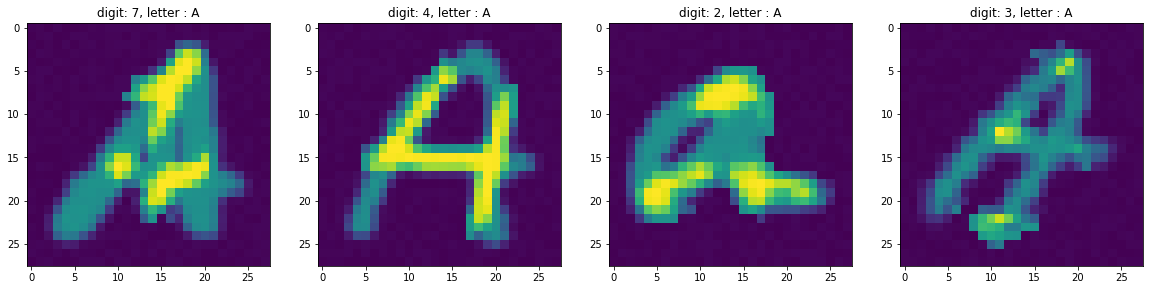

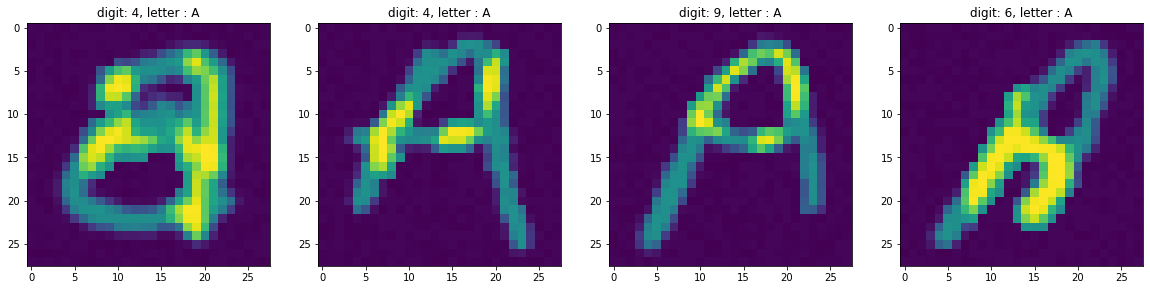

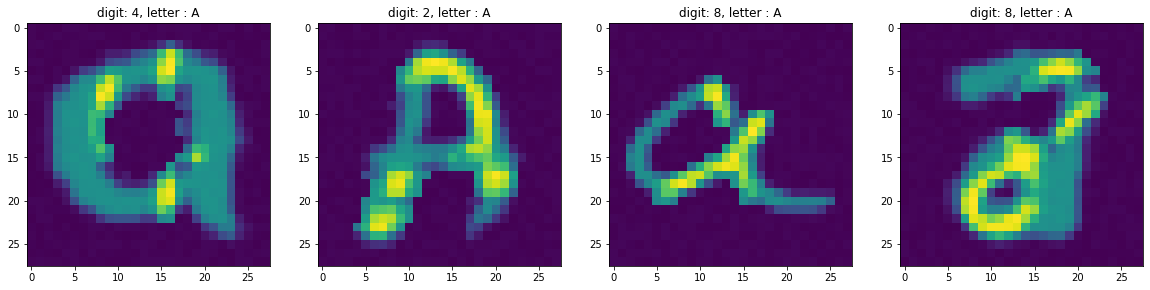

In [7]:
plot_letter('A')

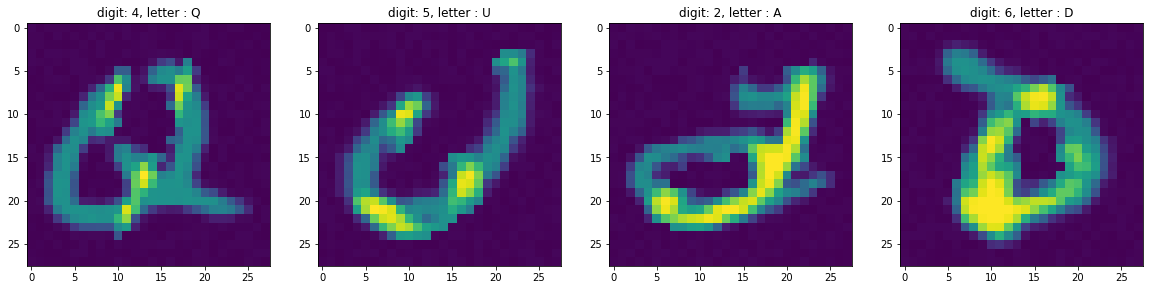

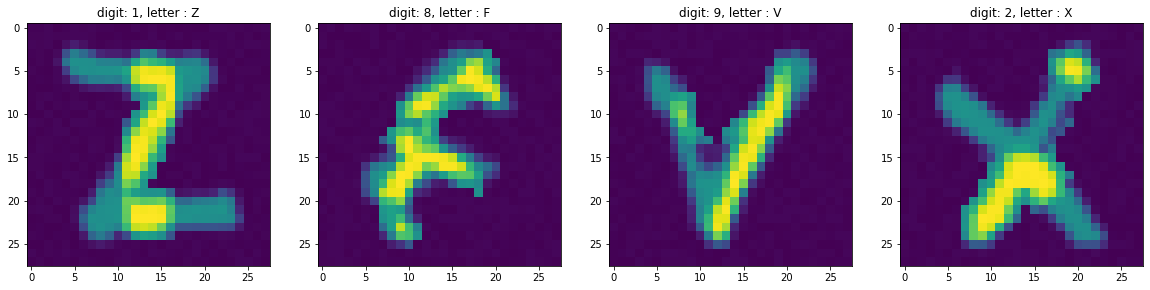

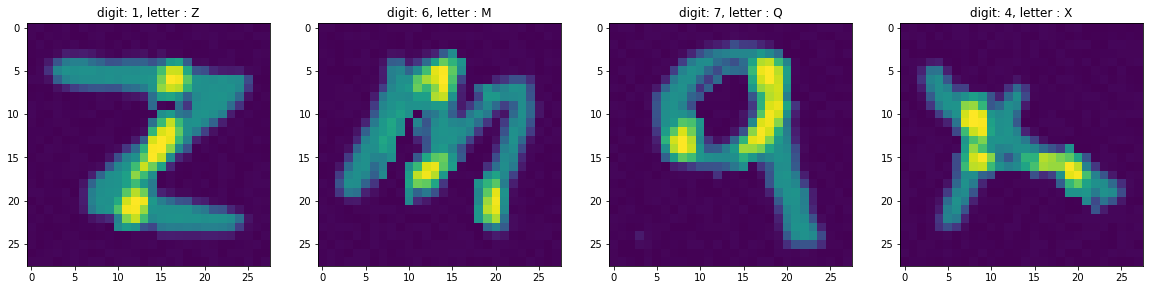

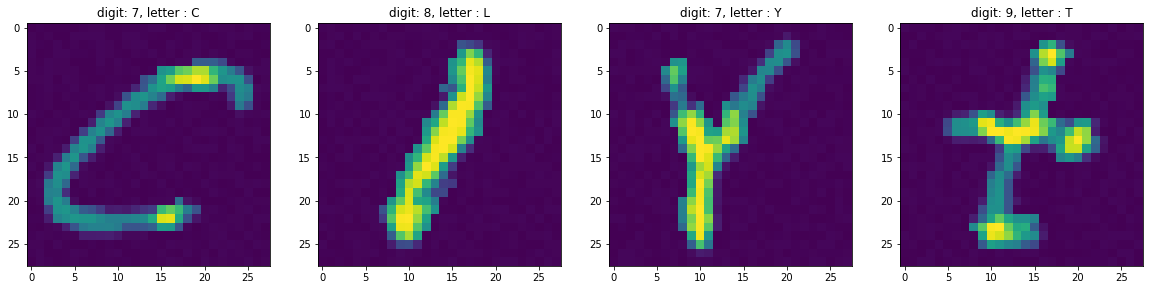

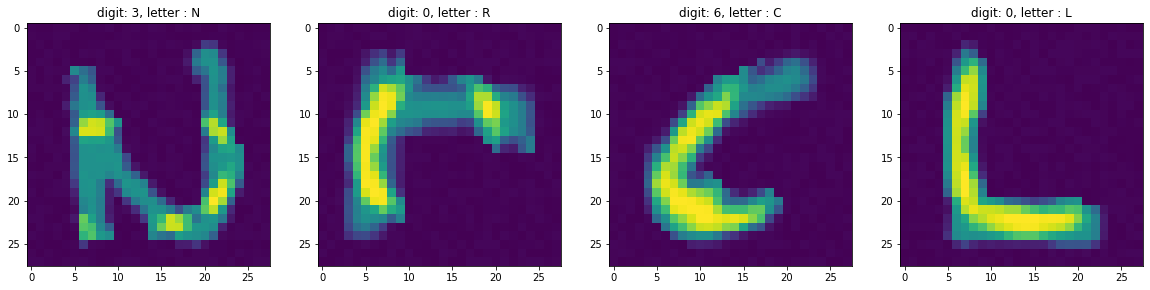

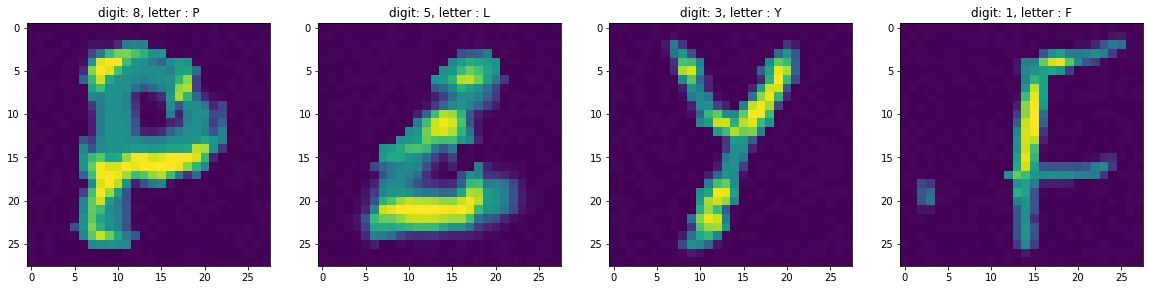

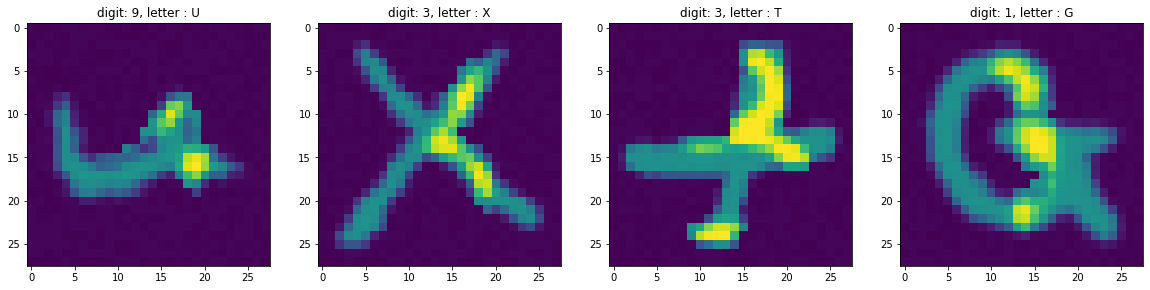

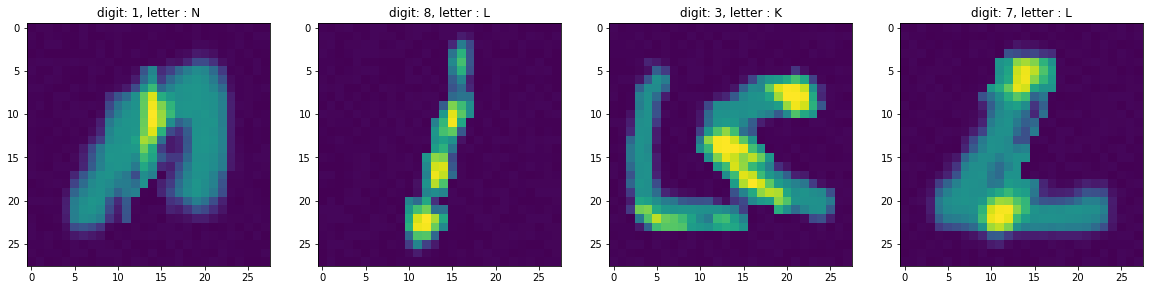

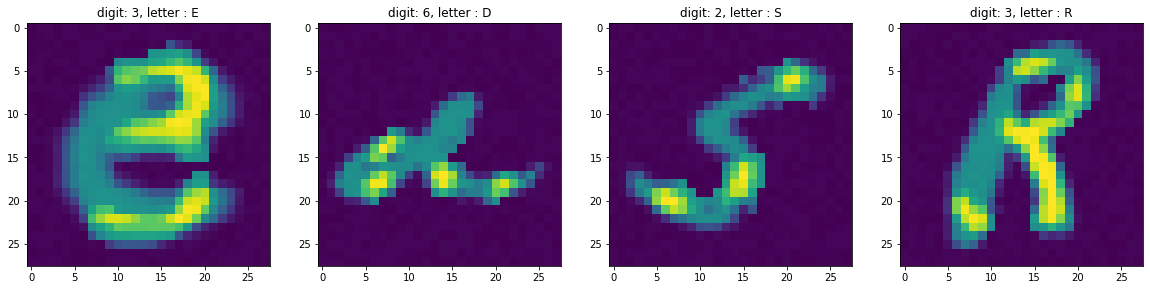

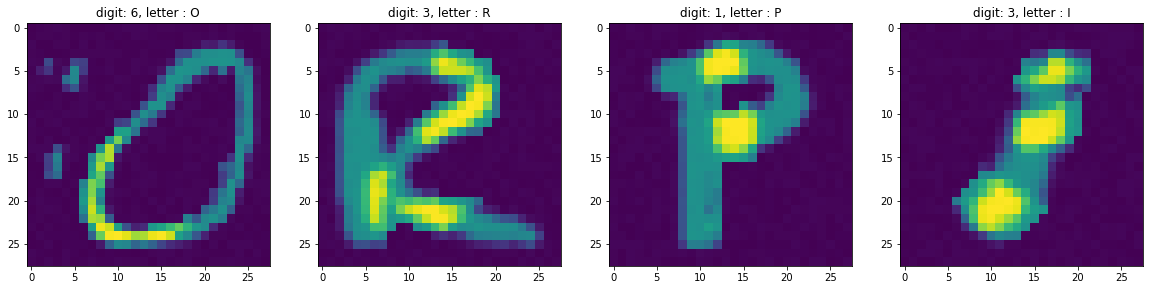

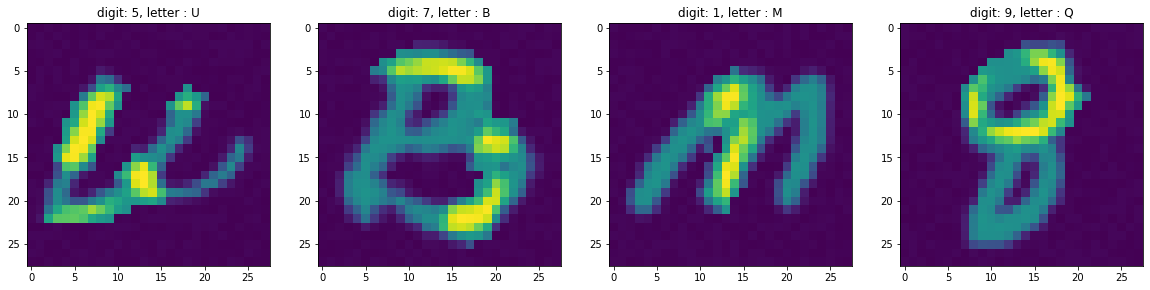

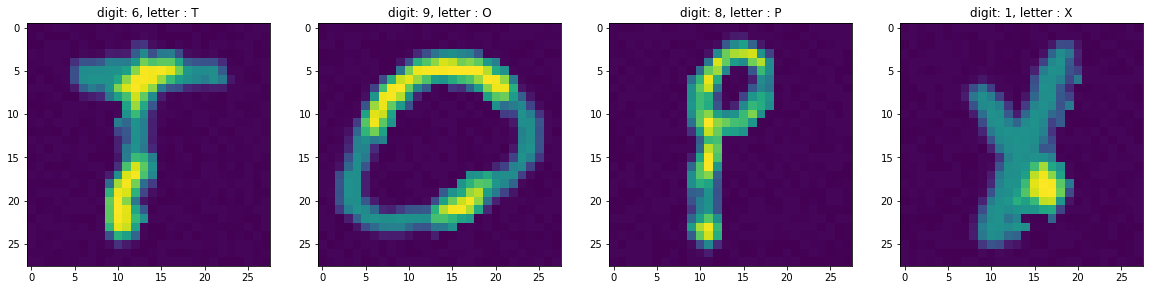

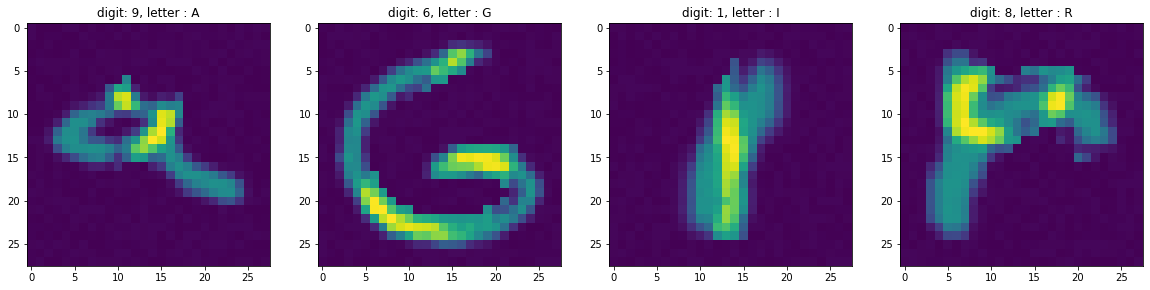

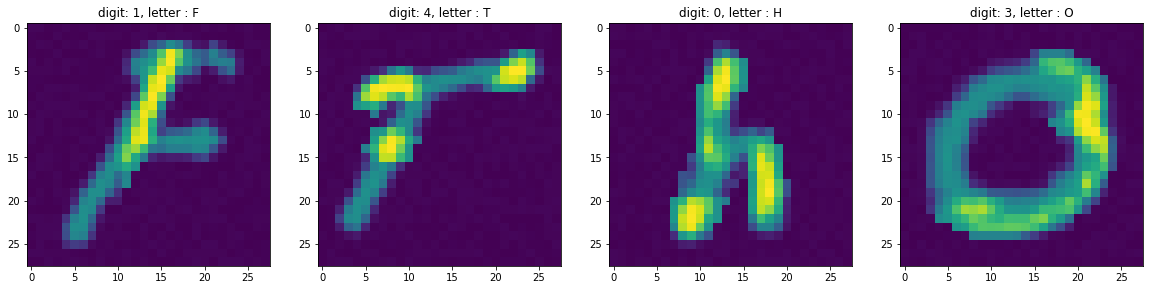

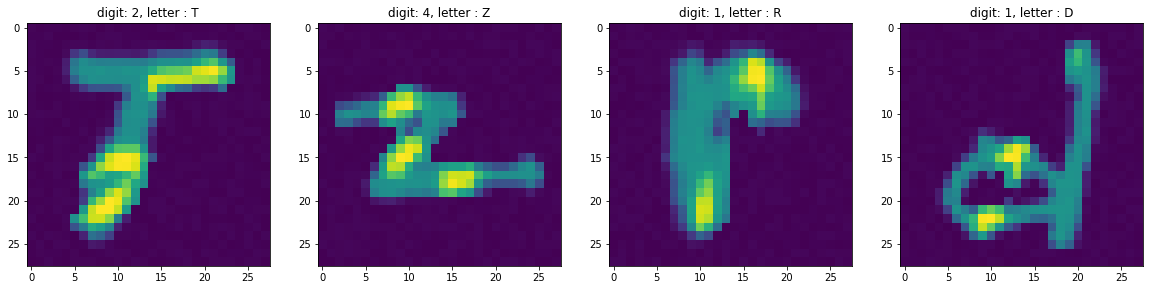

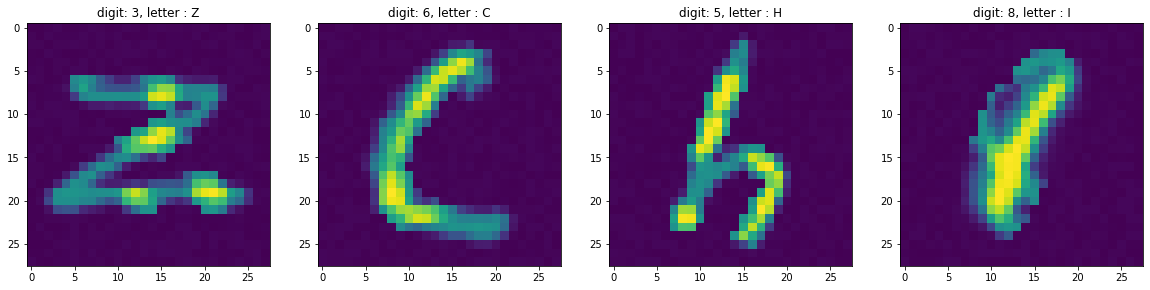

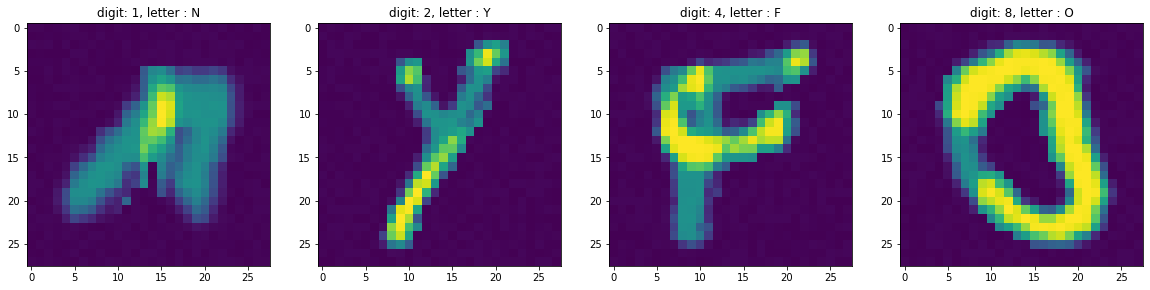

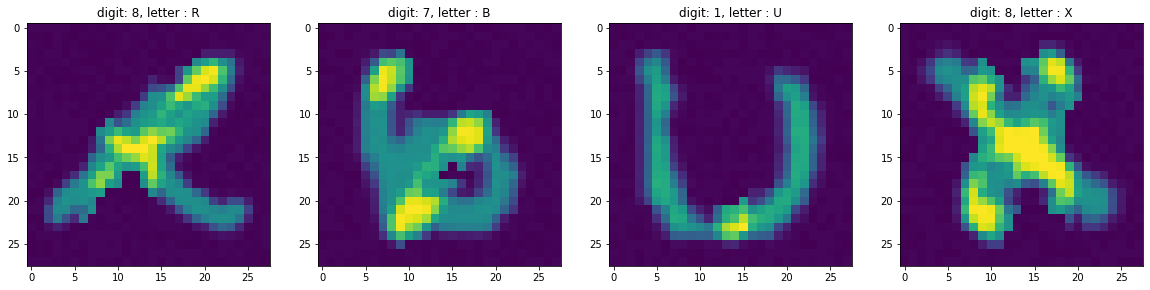

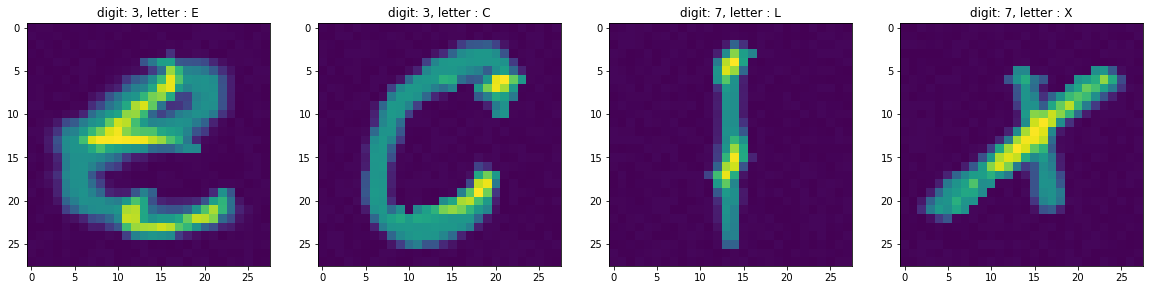

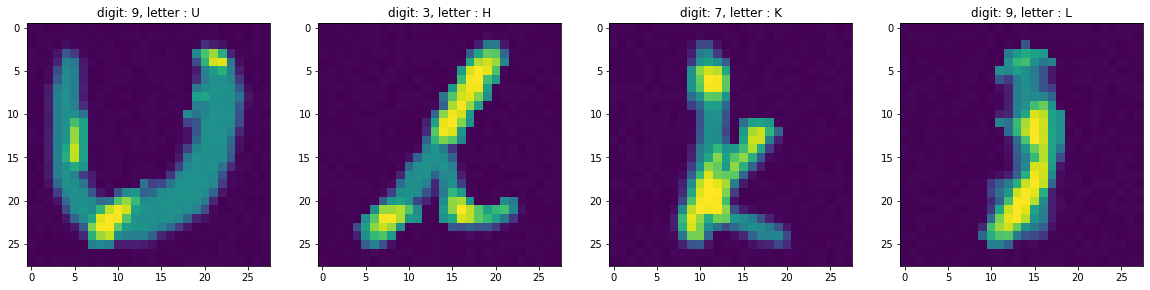

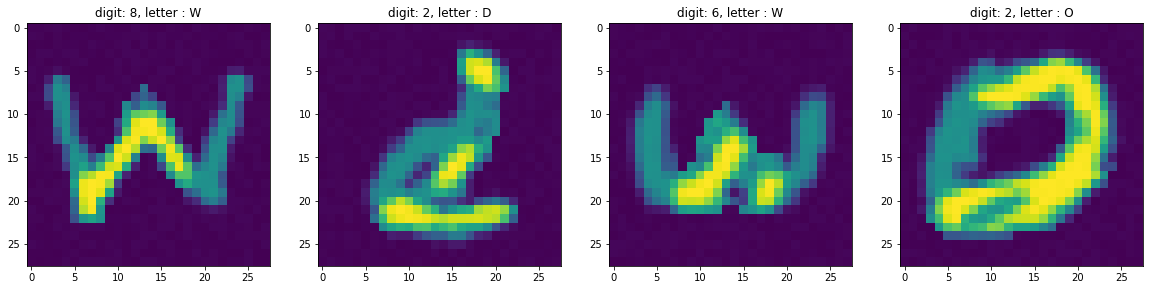

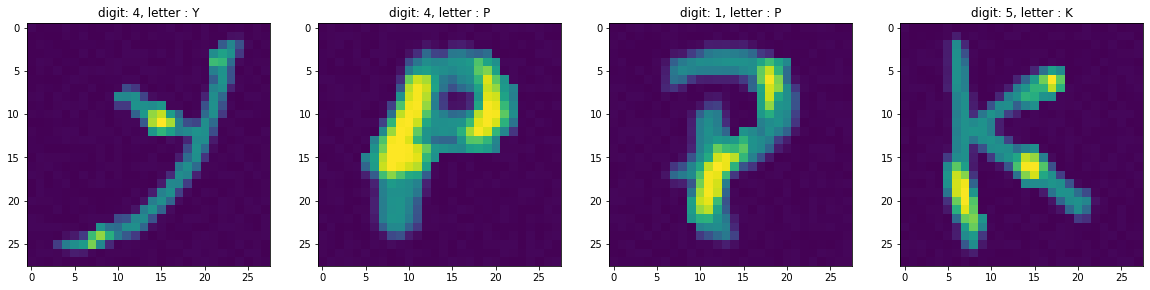

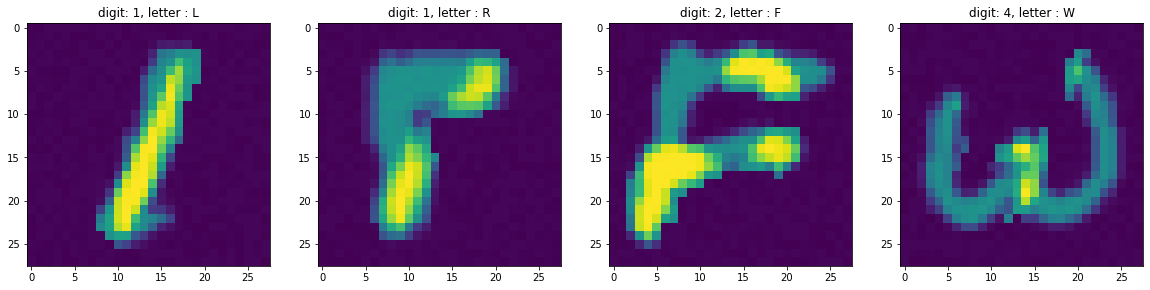

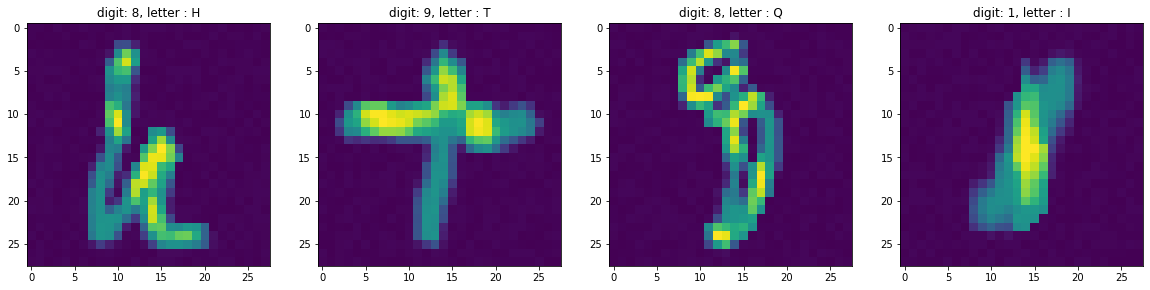

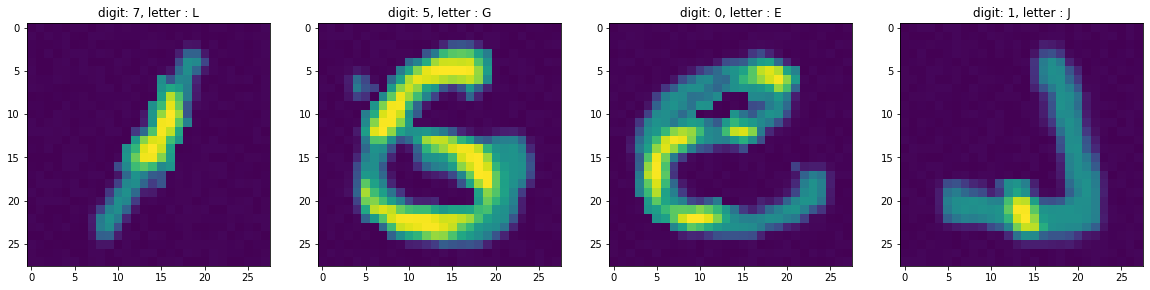

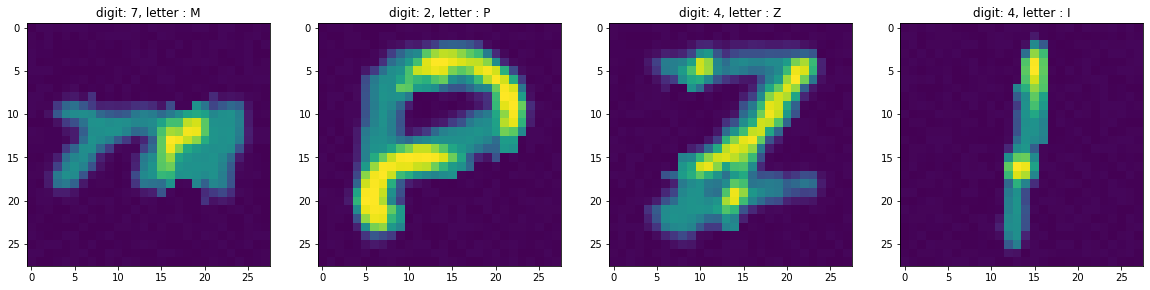

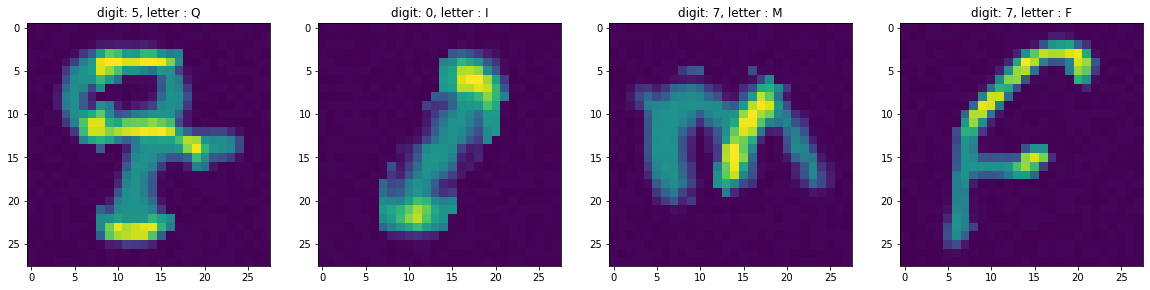

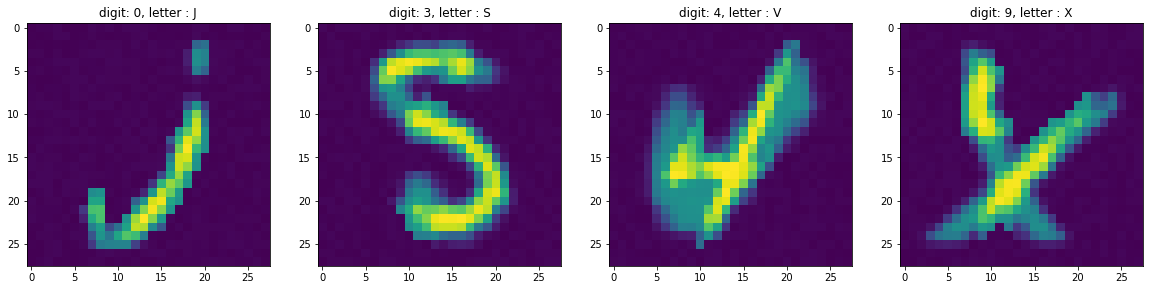

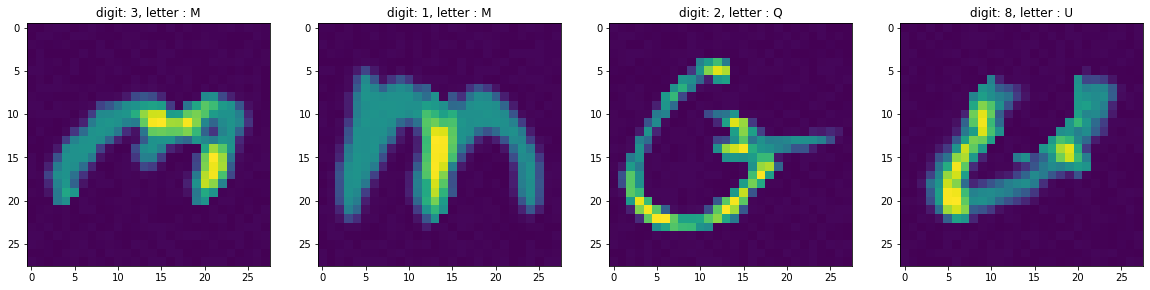

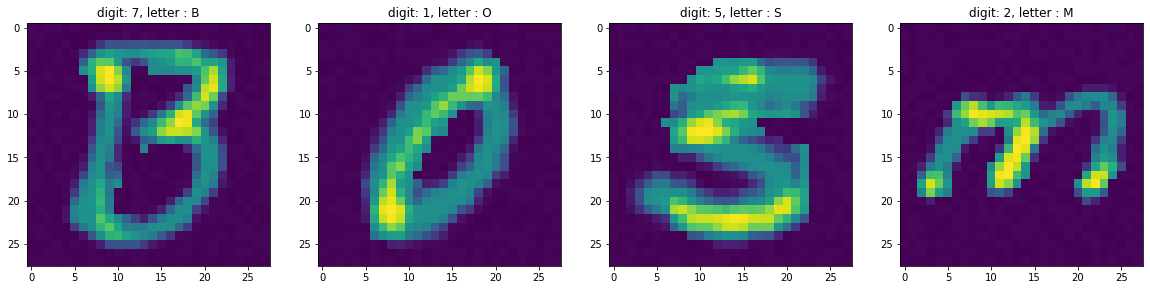

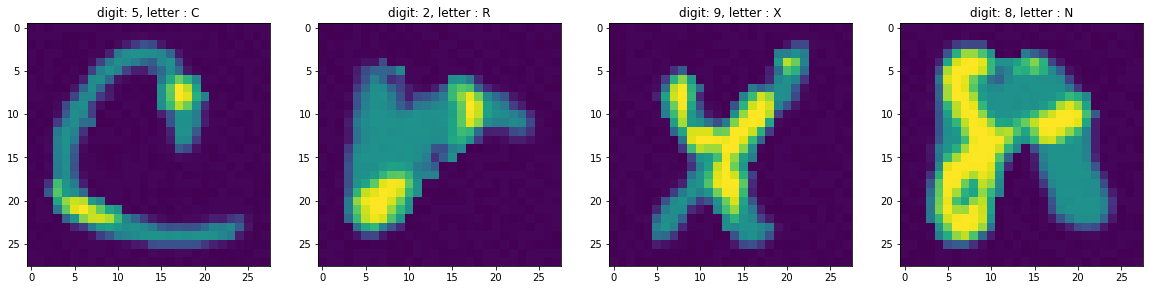

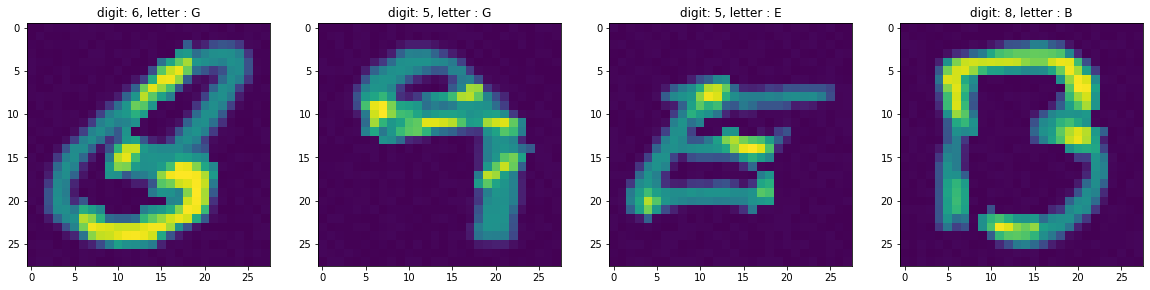

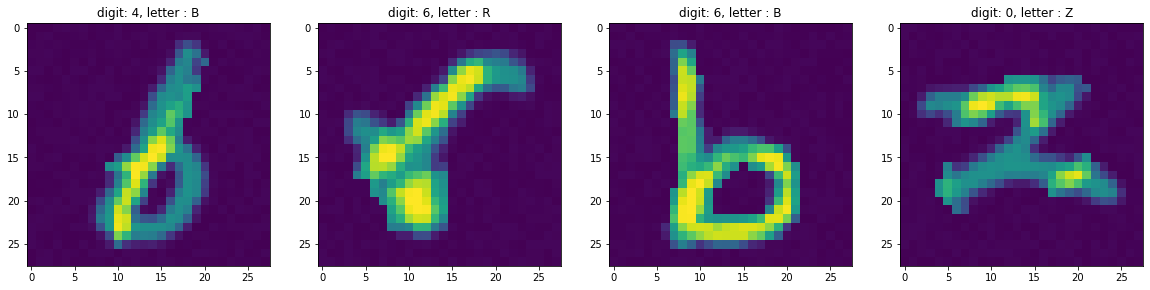

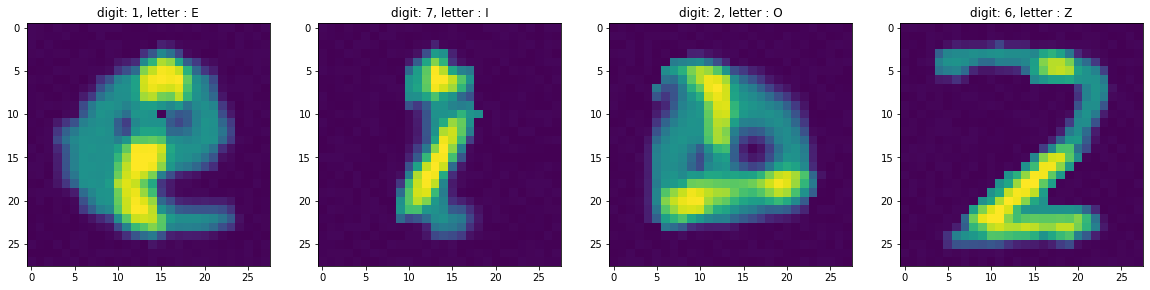

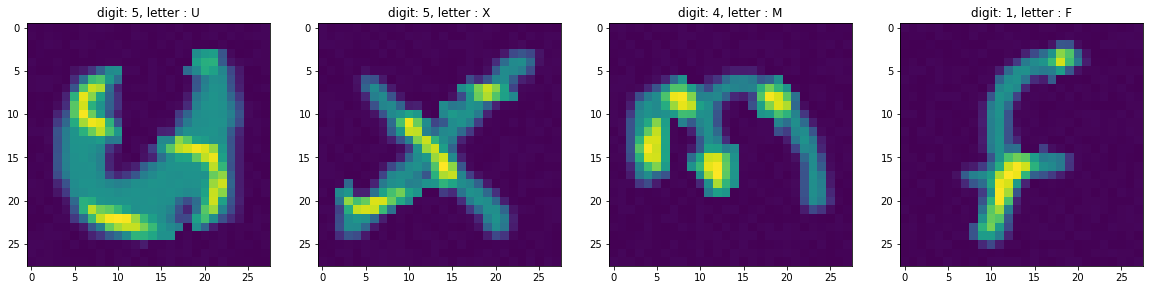

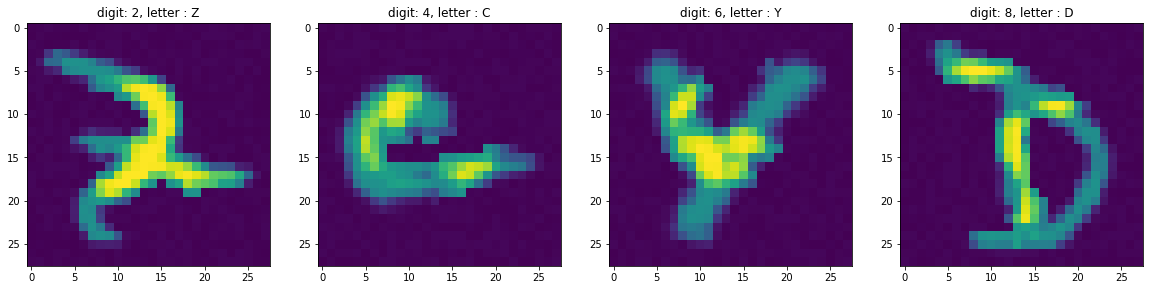

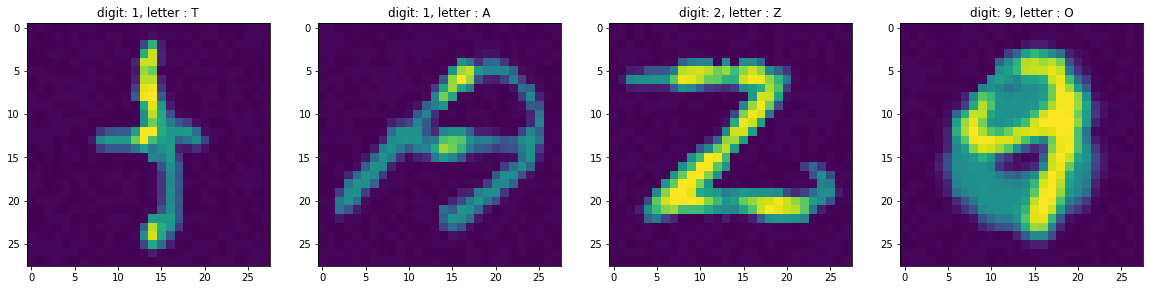

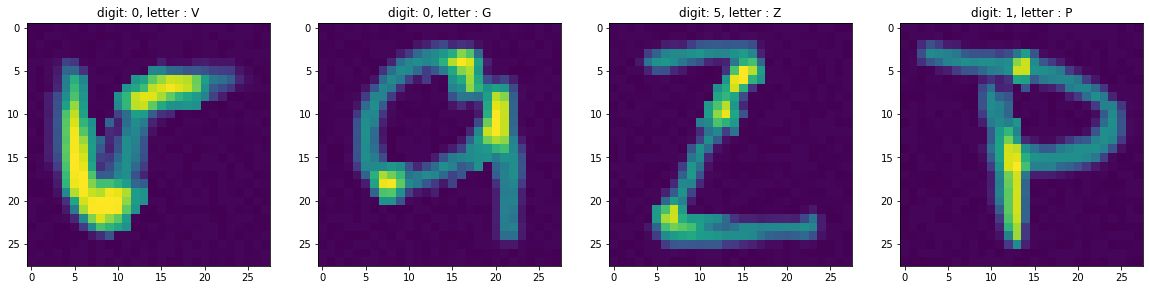

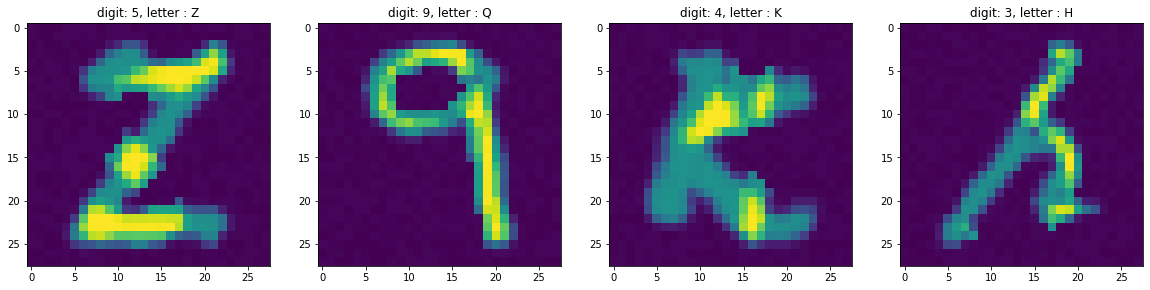

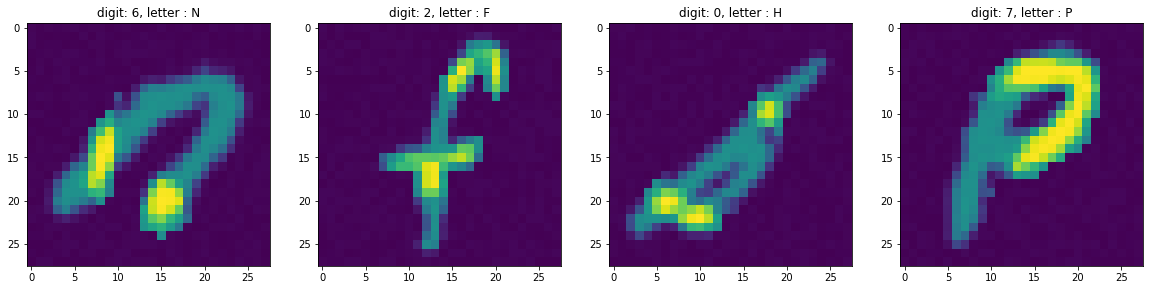

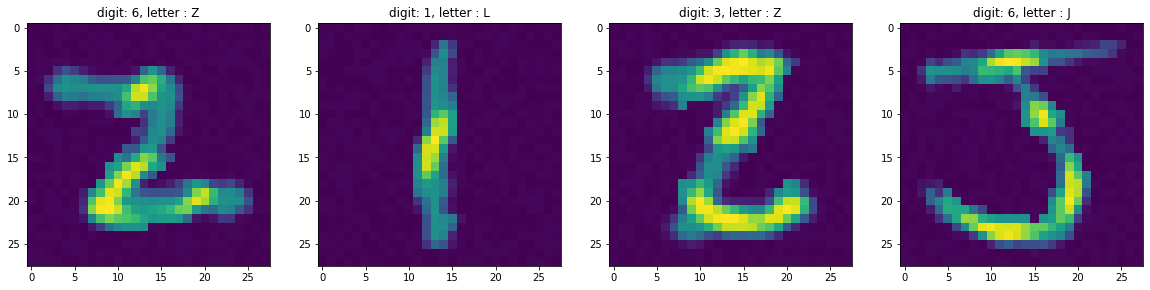

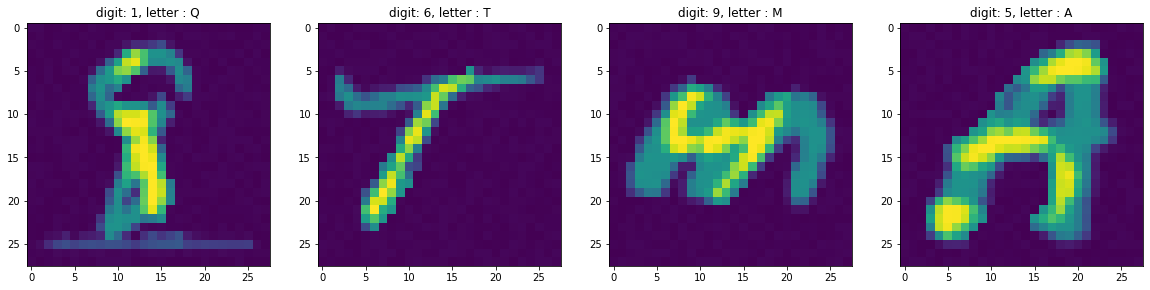

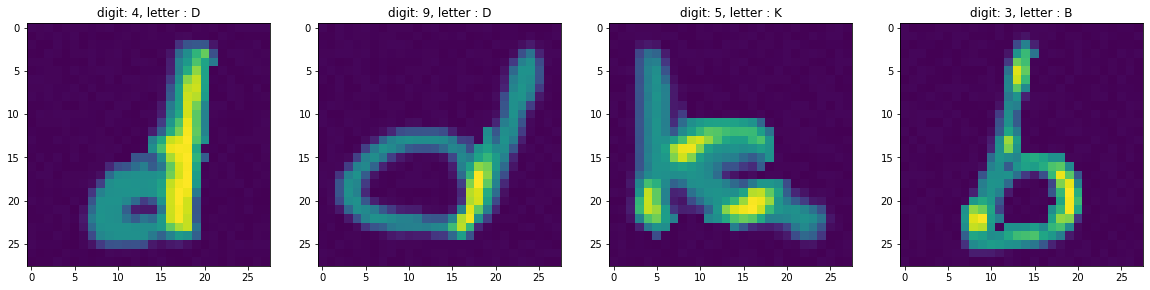

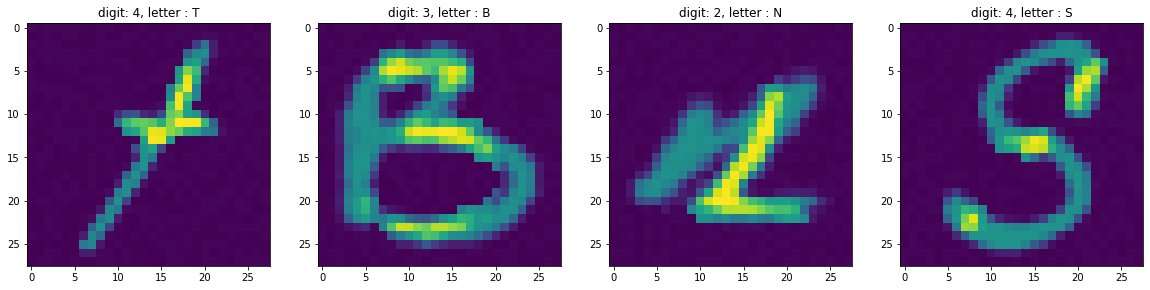

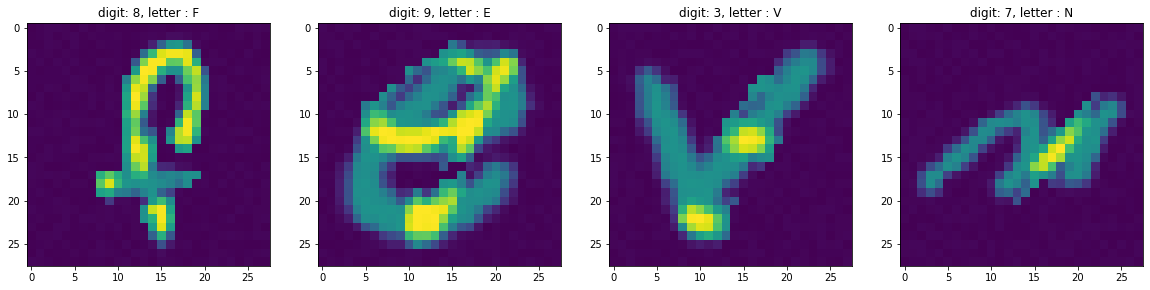

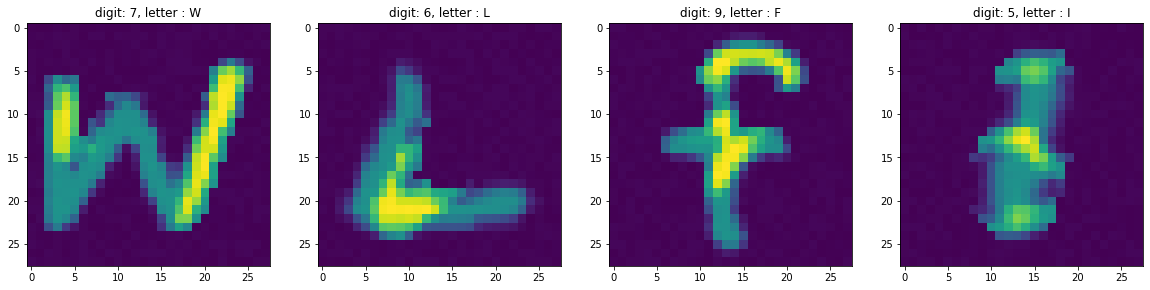

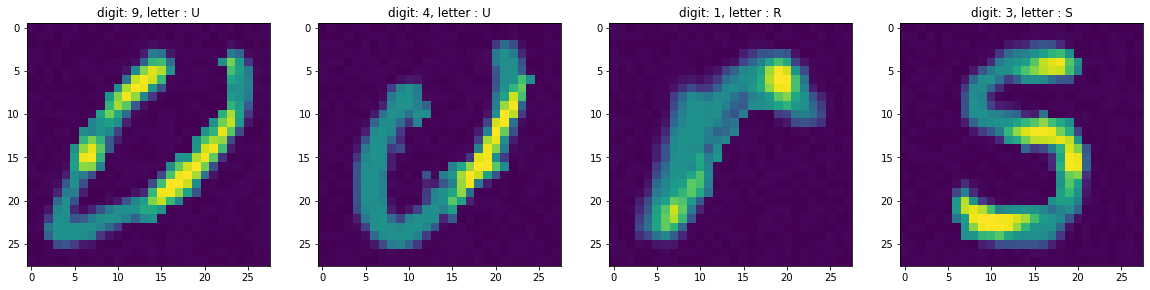

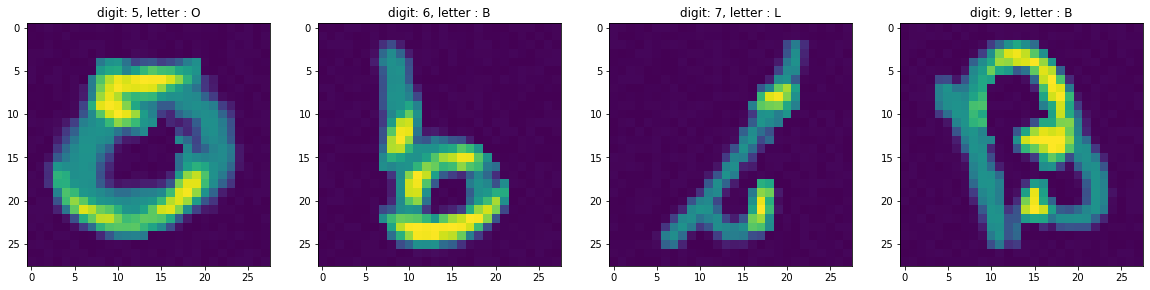

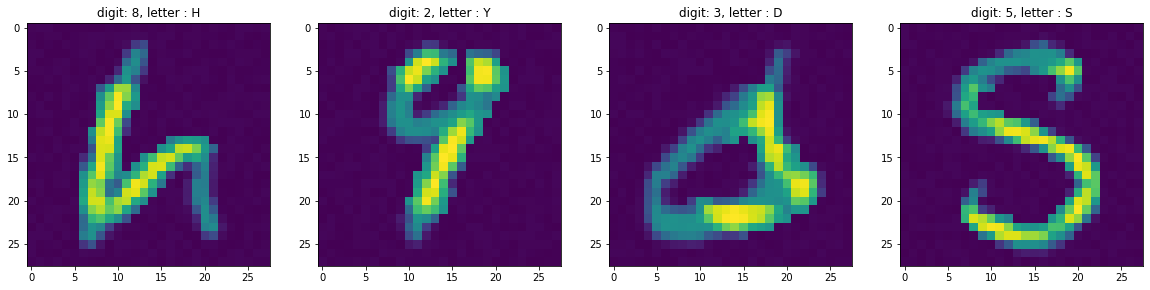

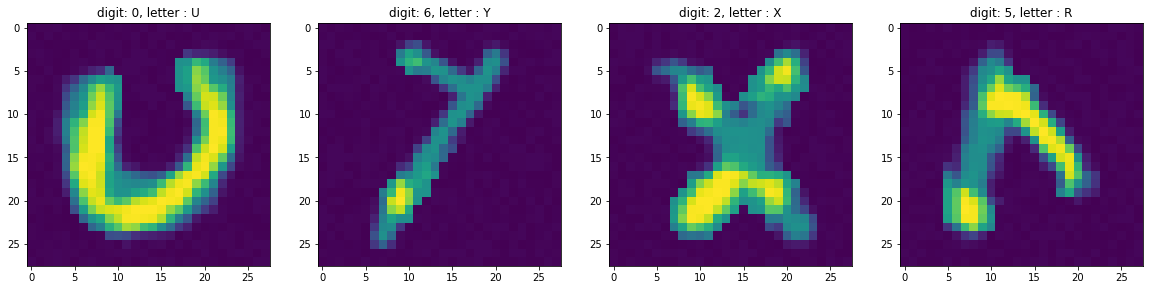

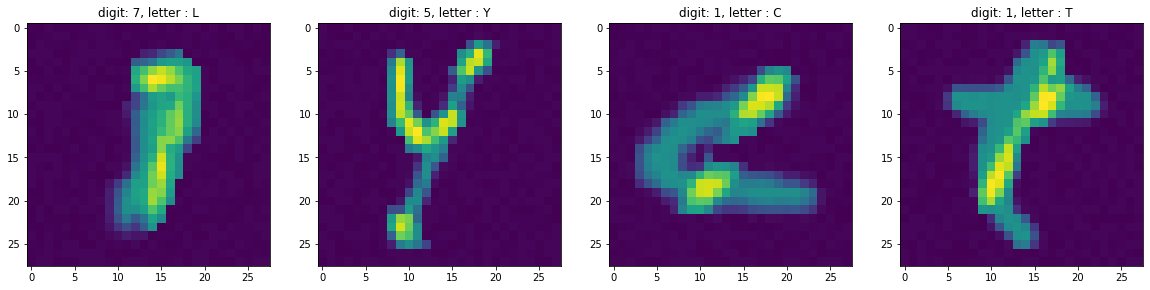

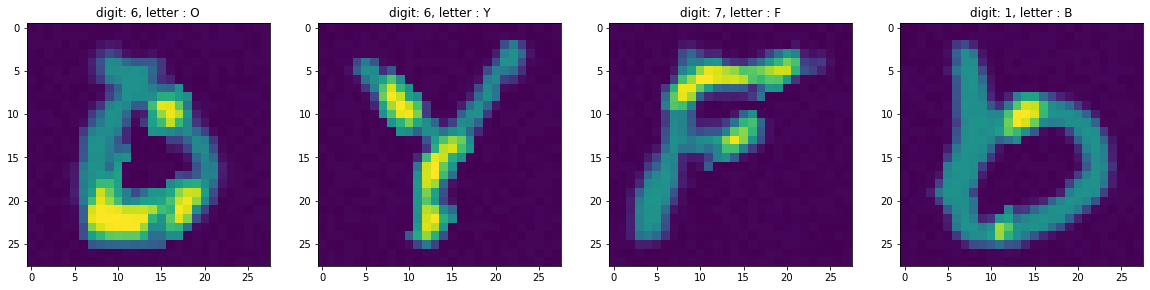

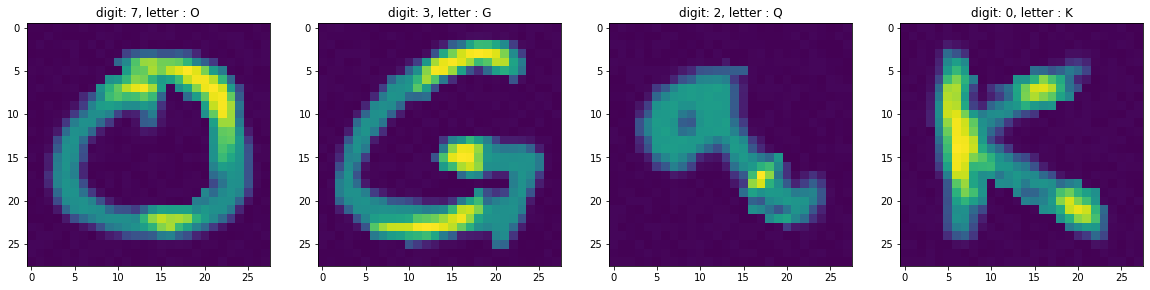

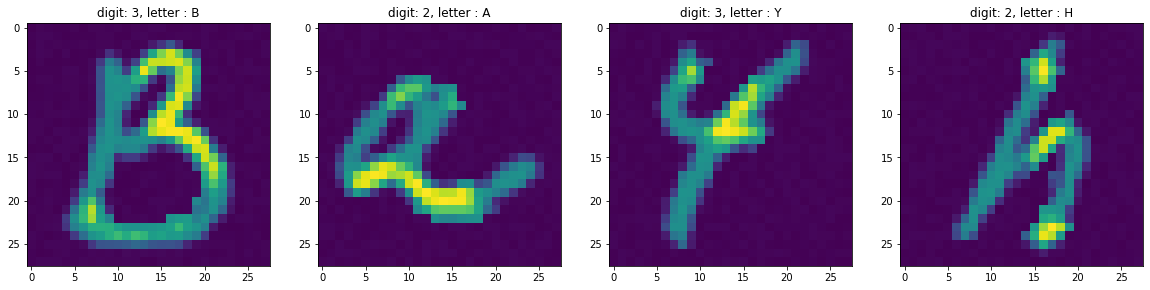

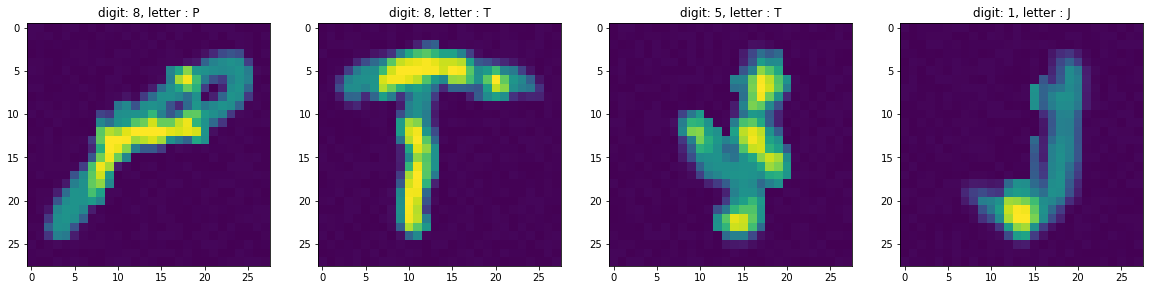

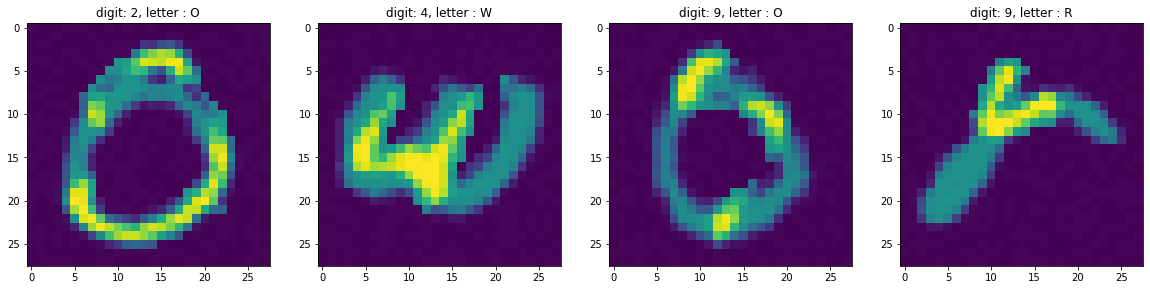

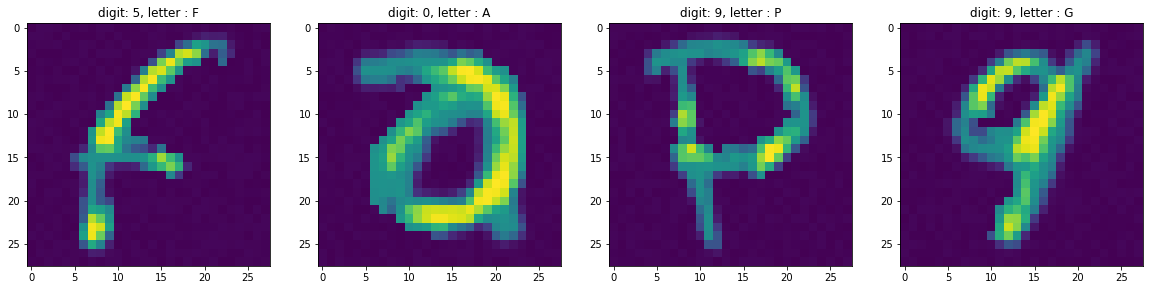

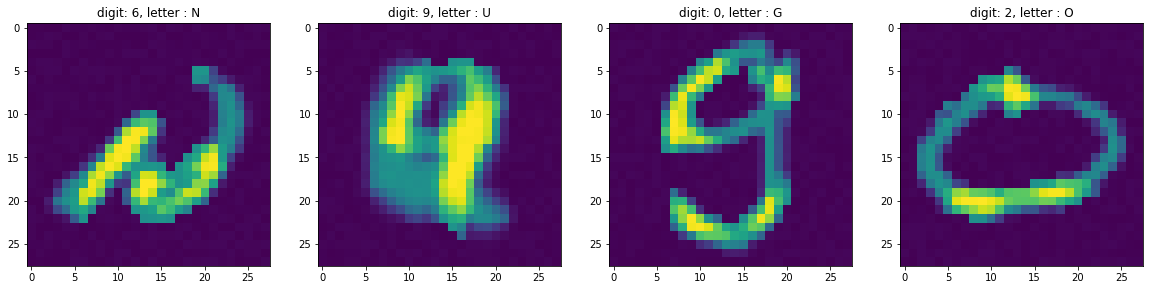

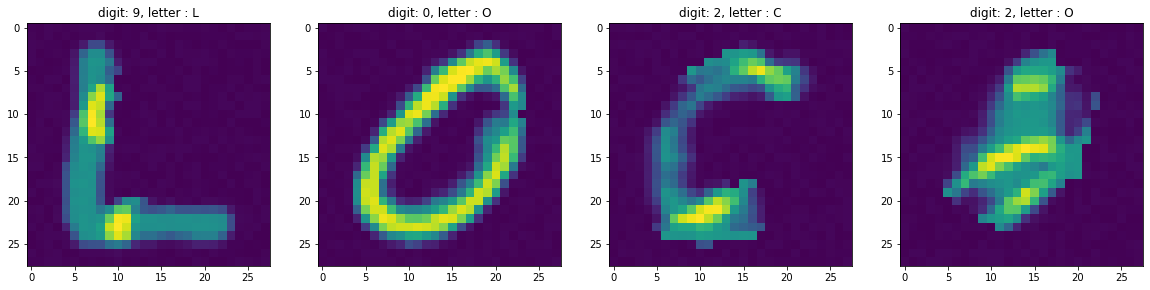

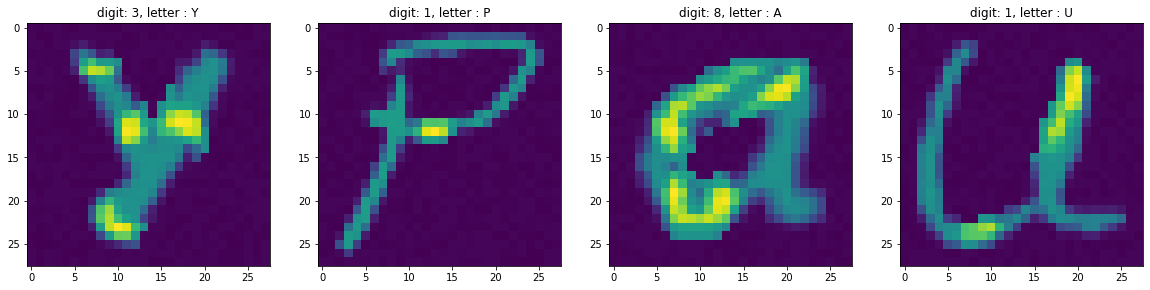

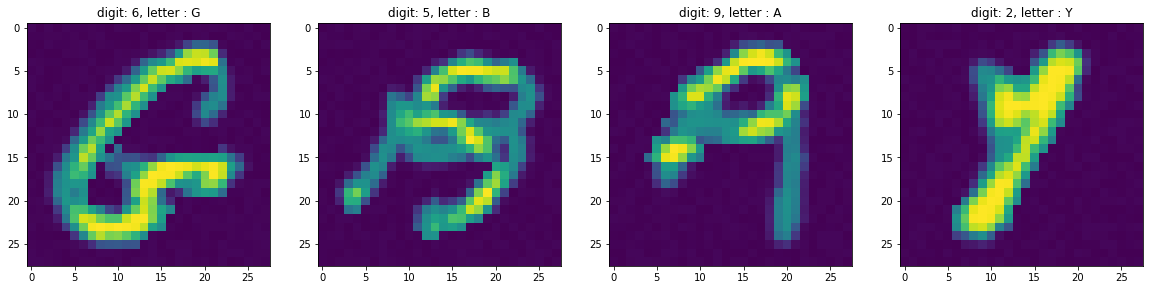

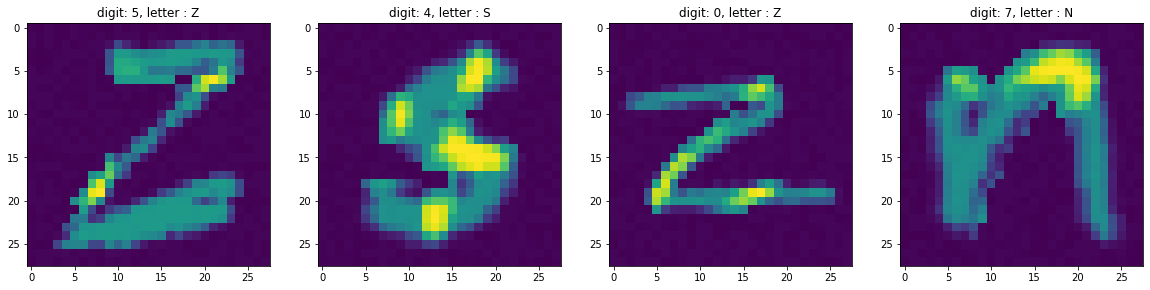

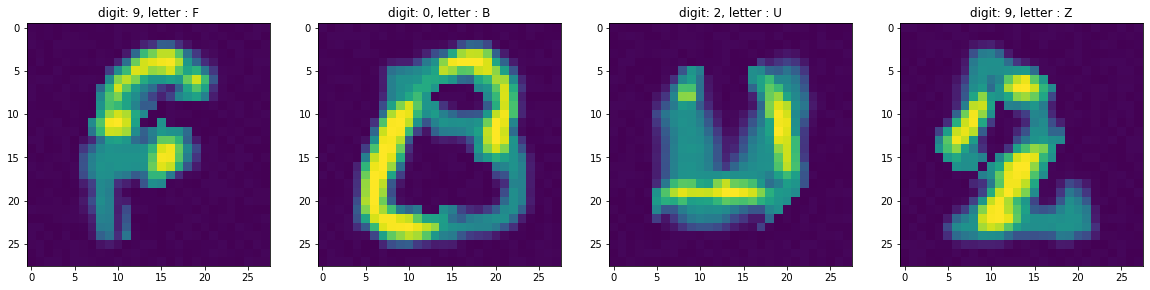

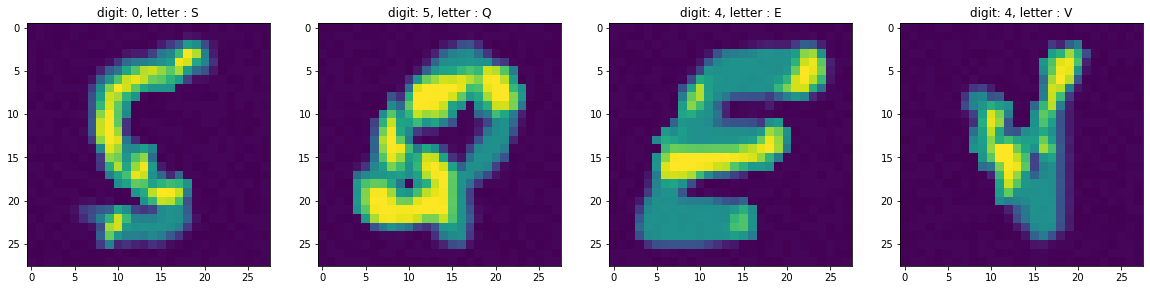

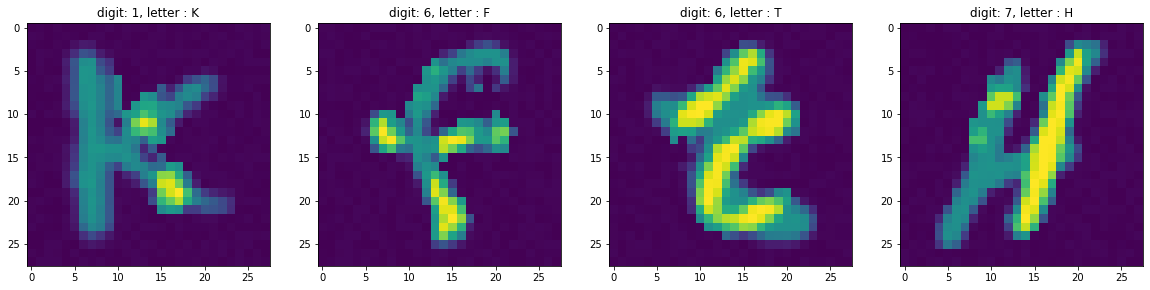

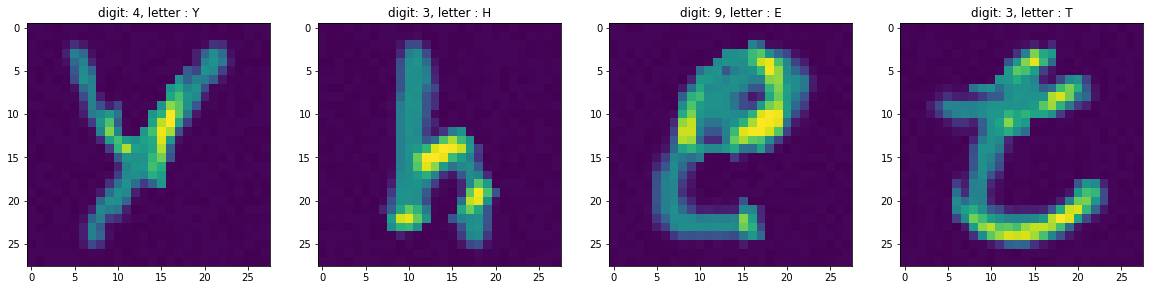

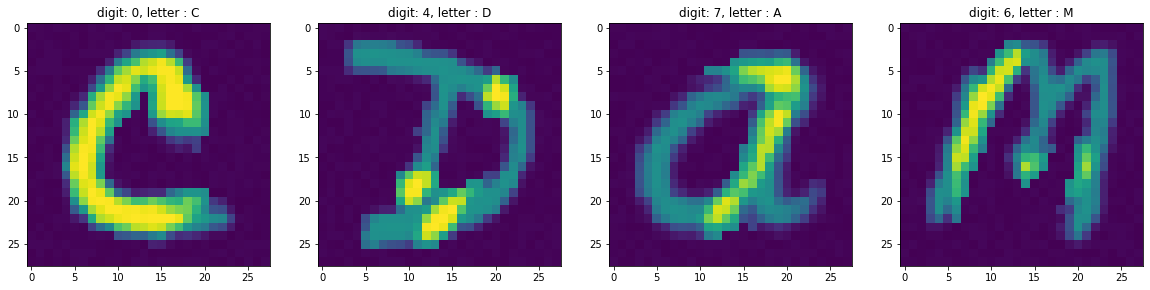

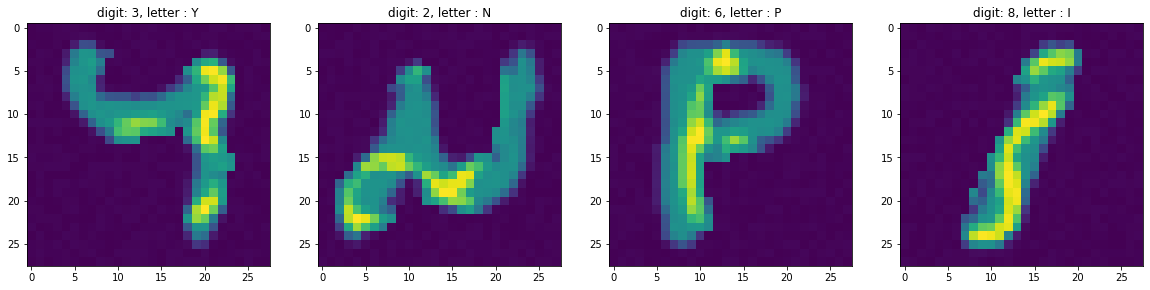

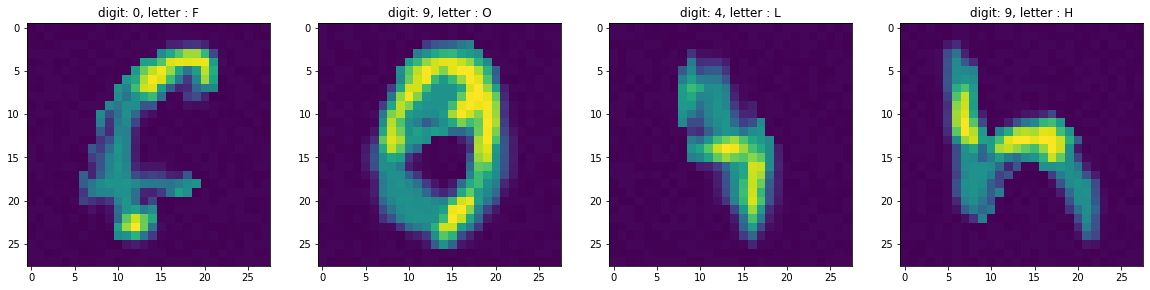

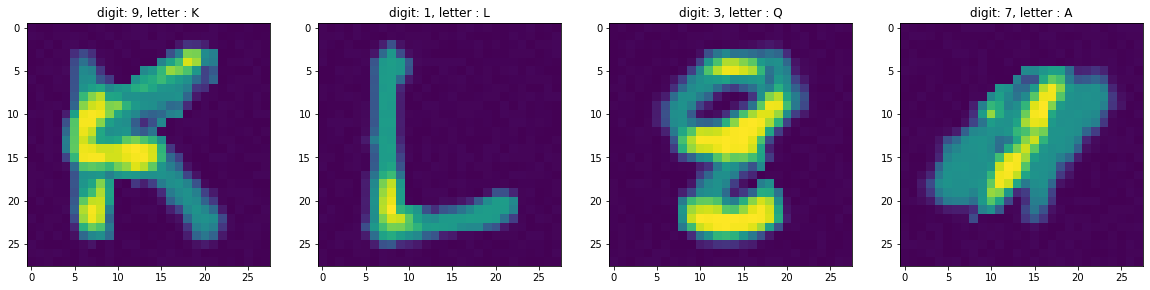

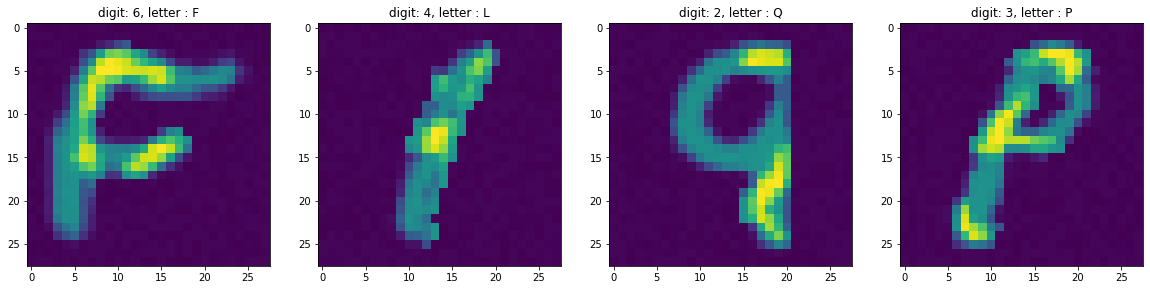

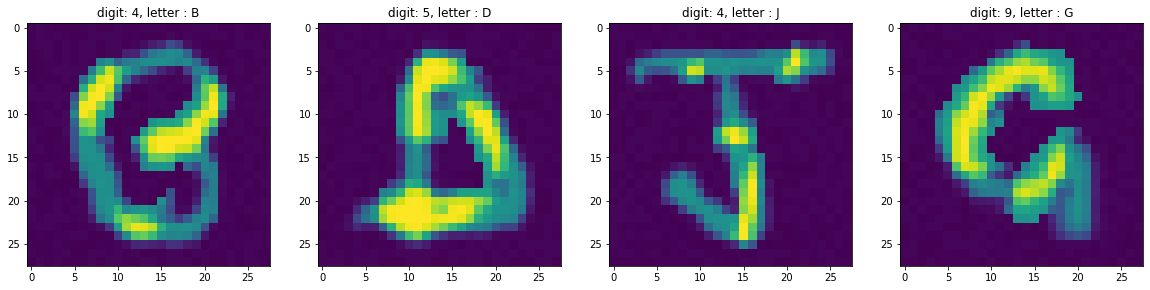

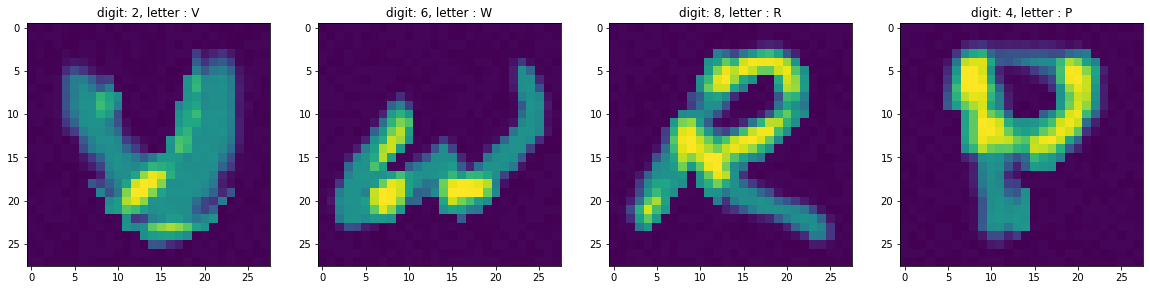

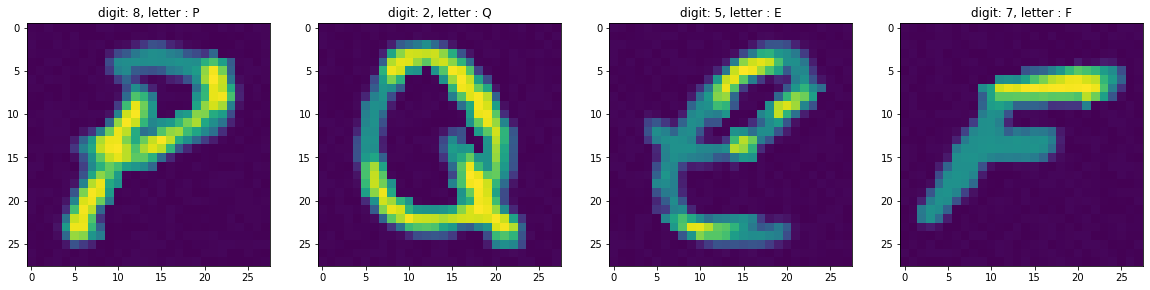

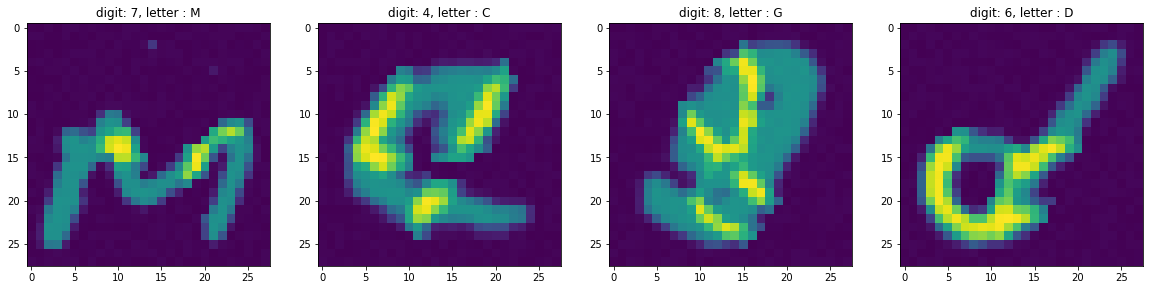

In [40]:
plot_random_number()

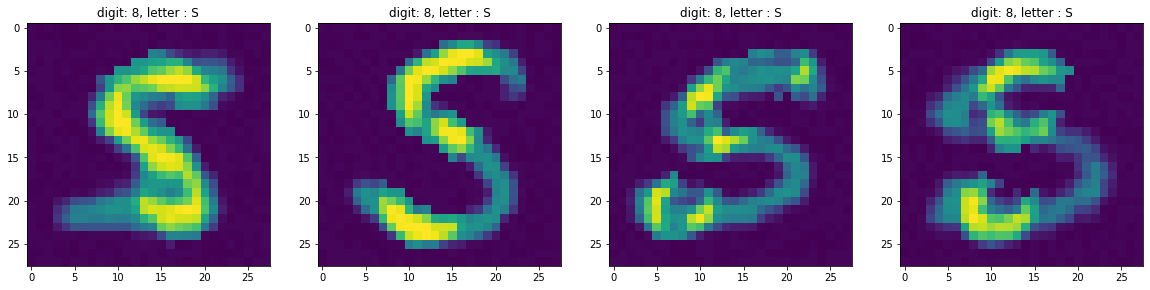

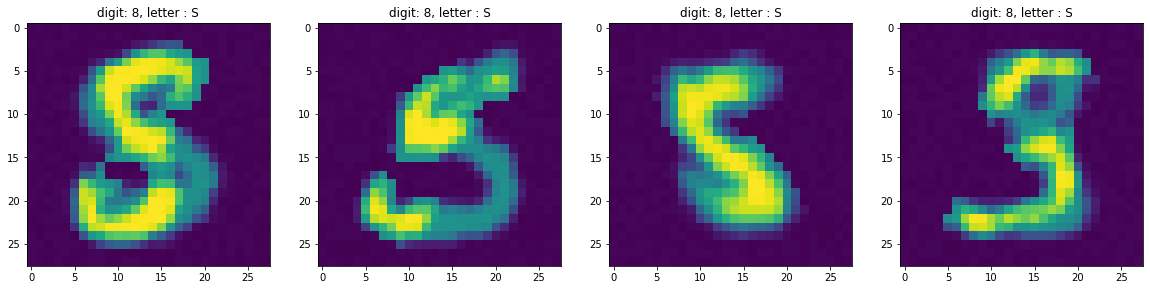

In [8]:
plot_number_letter(8, "S")

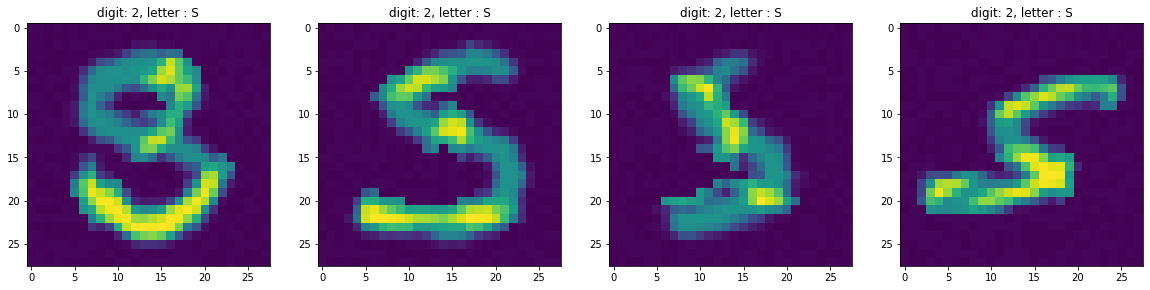

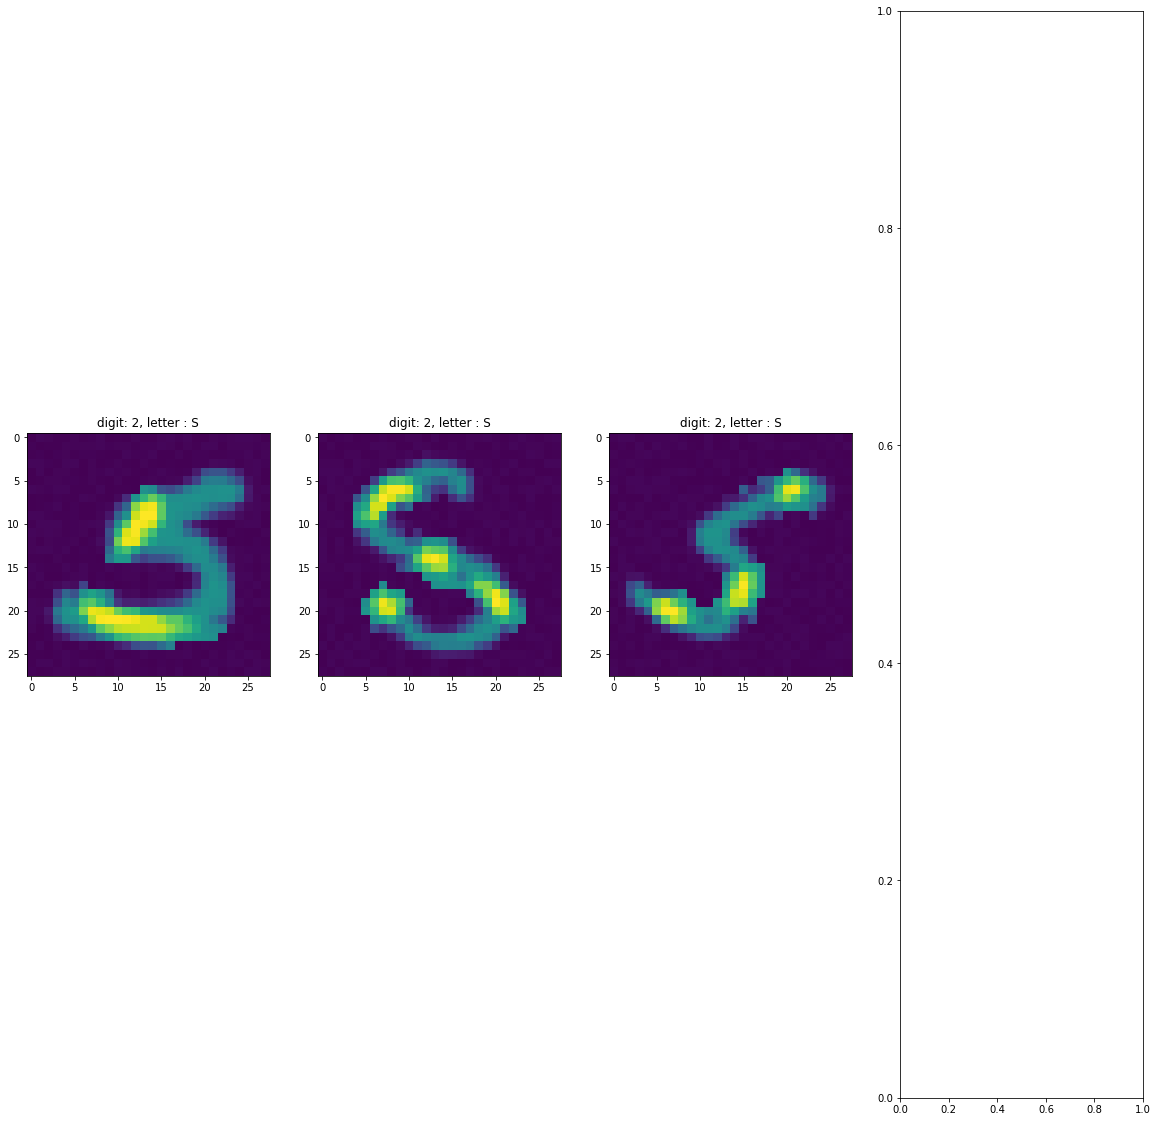

In [9]:
plot_number_letter(2, "S")

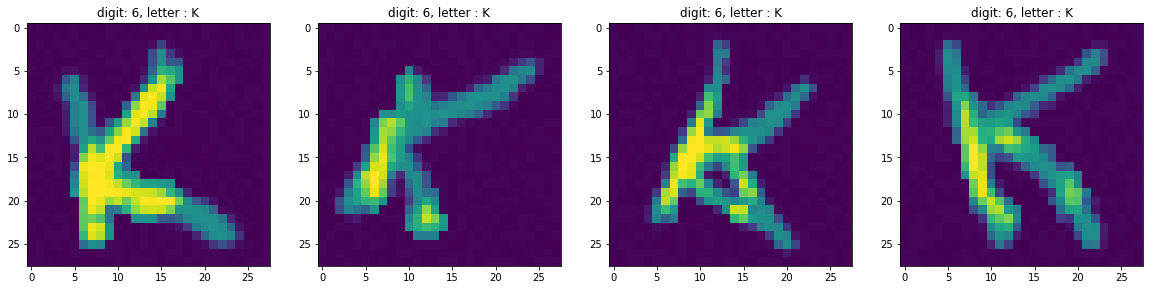

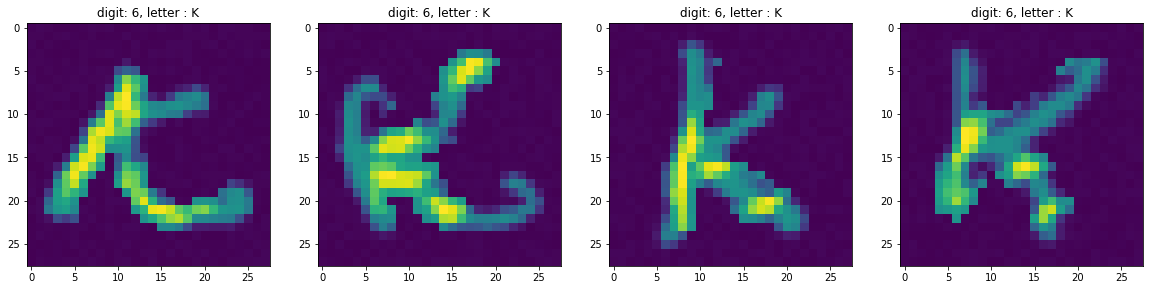

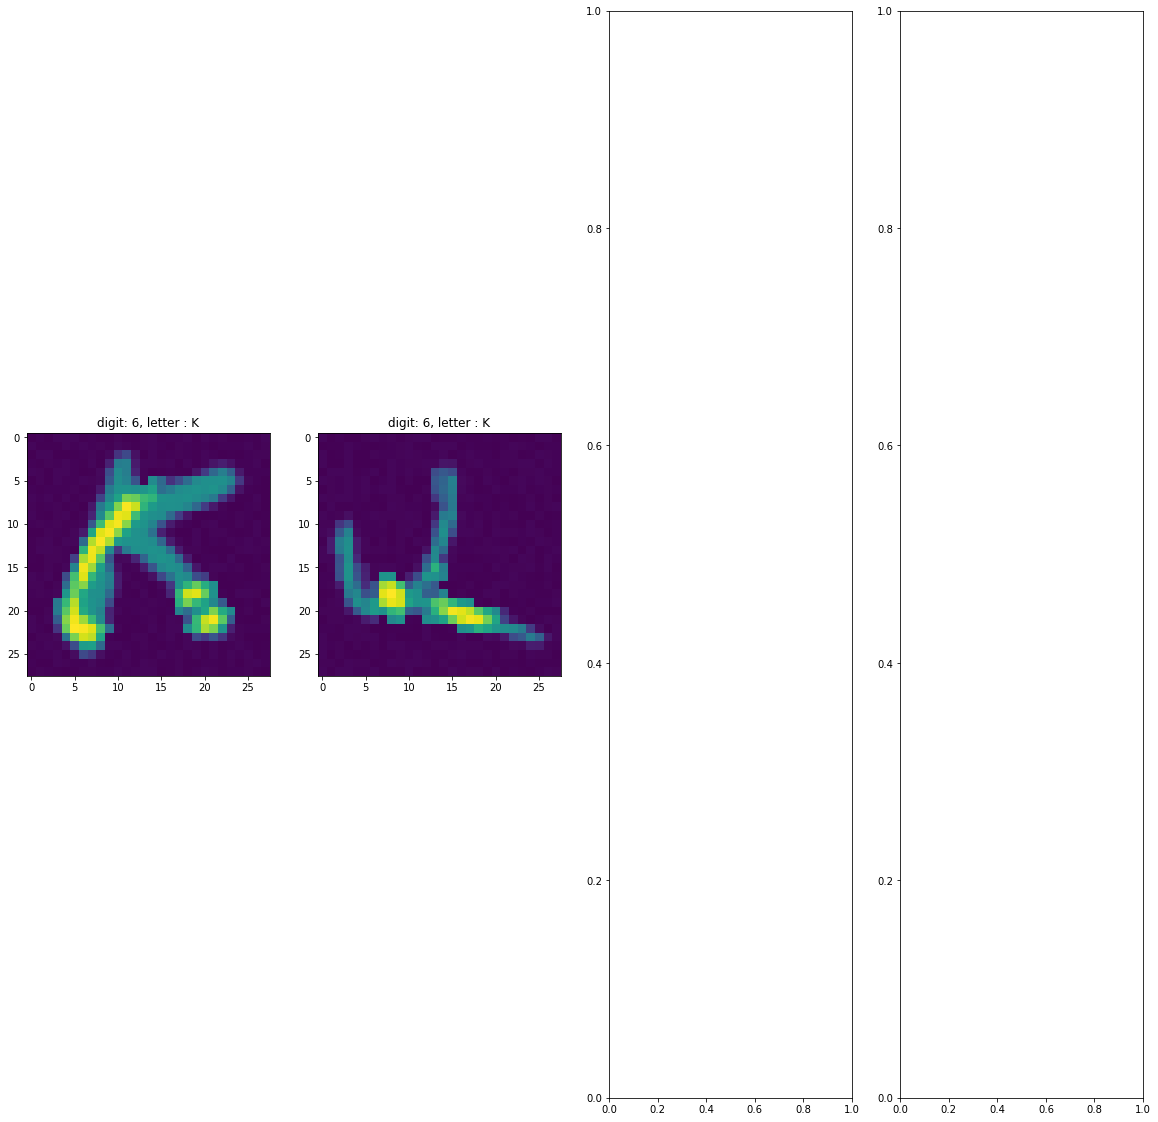

In [13]:
plot_number_letter(6, 'K')